# 1. Proyecto Análisis de Violencia en Mexico en el perido 2017-2022
---

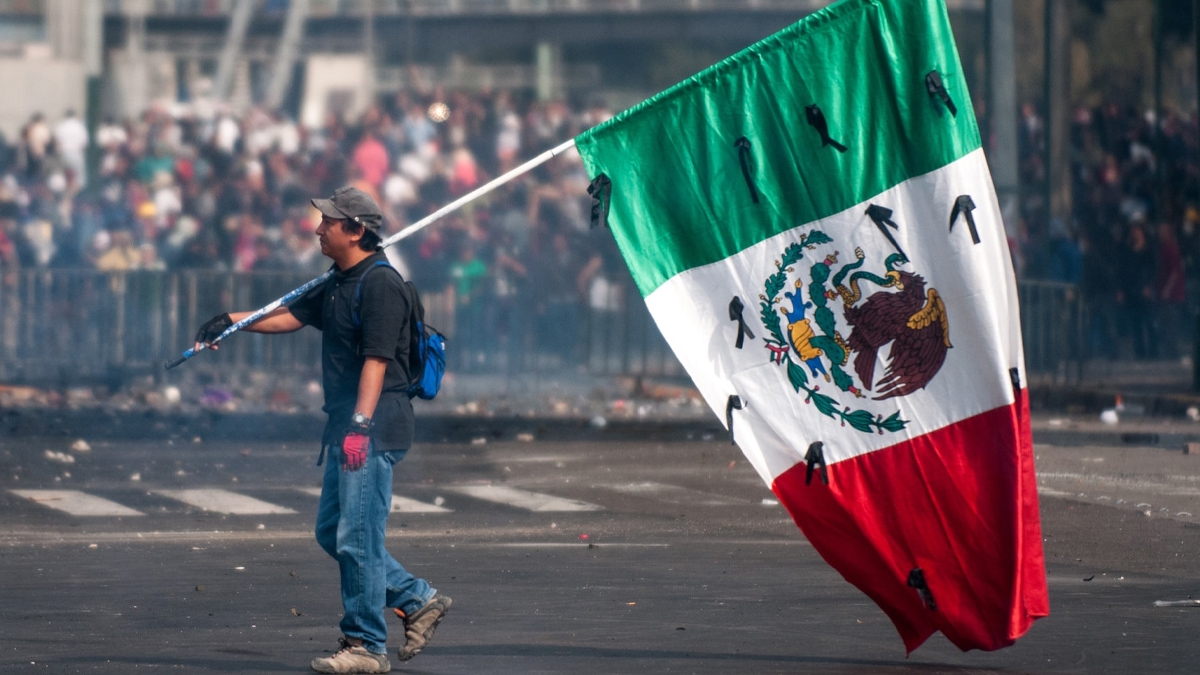

## **Abstract**


Este DataSet es un registro de incidencia delictiva en México en el periodo de 2015 - 2023. url: https://www.kaggle.com/datasets/beelzabi/crimen-mx


En México y tanto en otros lugares del mundo existe la inseguridad para todas las a gran escala y es importante conocer mediante las estadisticas, el tipo de delito que se estan cometiendo a gran escala, con el fin de que podamos tomar nuestras precauciones y alertar a nuestros familiares.

Nuestro proyecto de predicción de delitos en México tiene como objetivo principal reducir la criminalidad y mejorar la seguridad ciudadana en todo el país. Mediante el análisis de datos y el aprendizaje automático, hemos desarrollado un modelo altamente preciso que puede identificar patrones delictivos y predecir áreas de alto riesgo en tiempo real. Esto permite a las autoridades y a las fuerzas de seguridad tomar decisiones basadas en datos y asignar recursos de manera más eficiente para prevenir y combatir el delito.

Este estudio puede ser de interés para las autoridades y los cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México, así como para los investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México y otros países.

A quién le puede interesar:

Este estudio puede ser de interés para diversas personas y organizaciones, entre ellas:

- Autoridades y cuerpos de seguridad encargados de la prevención y reducción de los crímenes en México.
- Investigadores y analistas de datos interesados en el estudio de la criminalidad y la violencia en México.
- Organizaciones no gubernamentales y grupos de la sociedad civil dedicados a la defensa de los derechos humanos y la seguridad ciudadana.
- Ciudadanos y comunidades afectados por la violencia y la criminalidad en México, interesados en conocer más sobre las tendencias en su localidad o región.


## **Contexto Comercial**

En la Republica Mexicana ha experimentado un gran numero de reportes de todo tipo de delitos en los ultimos años. Para ello se ha recopilado información de todo los delitos comentidos desde el año 2015 hasta la actualidad 2023.

Somos una equipo de Trabajadores de Data Sicence independiente en el cual nos encomiendan identificar el Estado con mayor inseguidad en el Pais de Mexico y tambien a que genero esta afectando más asi como predecir los crimenes en los futuros años. Se tiene ciertos parametros como el tipo de delitos, el genero afectado, los meses de las cuales se han registrado.



## **Problema Comercial**

Con los datos proporcionados generar visualizaciones que correspondan al objetivo del problema la cual es identificar el estado con mayor inseguridad y de acuerdo a ello hacer una prediccion del incremento de los delitos a futuro, asi como responder a las preguntas del cliente


## **Contexto Analítico**

Recibirmos este data set por la comunidad de Kaggle https://www.kaggle.com/datasets/beelzabi/crimen-mx para analizar los detitos cometidos en Mexico.

## **Objetivo**

El objetivo principal de este proyecto es desarrollar un modelo predictivo para predecir la tasa de delitos por año en un área determinada (El estados con mayor inseguridad). Esto podría ser útil para identificar patrones a largo plazo en la actividad delictiva y para evaluar la efectividad de las políticas públicas y las medidas de seguridad a lo largo del tiempo. Algunas preguntas específicas que buscamos responder son:

- ¿Existe alguna correlación entre los años y el total de homicidios cometidos?
- ¿Cual es el estado de la Republica Mexicana con mayor delitos?
- ¿Qué variables están disponibles en el conjunto de datos y cuáles son relevantes para la predicción de la tasa de delitos por año?
- ¿Qué técnicas de modelado predictivo son apropiadas para predecir la tasa de delitos por año en el área de interés?
- ¿Cómo se distribuyen los diferentes subtipos de delitos en el estado con mayor incidencia delictiva? ¿Hay algún subtipo que destaque en particular?

## **Hipótesis**


- La tasa de delitos puede estar relacionada con el tamaño de la población en una zona determinada, ya que las zonas con una mayor densidad de población pueden tener una mayor actividad delictiva.
- La tasa de delitos puede estar relacionada con la edad de la población, ya que las zonas con una mayor proporción de jóvenes pueden tener una mayor actividad delictiva.
- Los delitos violentos, como el homicidio, pueden estar relacionados con el tráfico de drogas en una zona determinada, ya que el tráfico de drogas puede estar asociado con la violencia.
- La tasa de homicidios aumenta en el area con mayor inseguridad aumenta año tras año




# 2. Carga de Librerias

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")
import statsmodels.api as sm
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('ggplot')
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [2]:
# Leemos el CSV
df = pd.read_csv('Crimen_mx.csv', encoding='utf-8')
df.head()

Año  Clave_Ent         Entidad             Bien jurídico afectado  \
0  2015          1  Aguascalientes  La libertad y la seguridad sexual   
1  2015          1  Aguascalientes  La libertad y la seguridad sexual   
2  2015          1  Aguascalientes  La libertad y la seguridad sexual   
3  2015          1  Aguascalientes  La libertad y la seguridad sexual   
4  2015          1  Aguascalientes  La libertad y la seguridad sexual   

  Tipo de delito     Subtipo de delito             Modalidad  Enero  Febrero  \
0  Delito sexual          Abuso sexual          Abuso sexual      6        4   
1  Delito sexual          Acoso sexual          Acoso sexual      0        0   
2  Delito sexual  Hostigamiento sexual  Hostigamiento sexual      1        1   
3      Violación      Violación simple      Violación simple      5        5   
4      Violación  Violación equiparada  Violación equiparada      0        5   

   Marzo  ...  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0    0.0  ...    1.0    1.0     1.0         0.0      0.0        1.0   
1    0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
2    0.0  ...    0.0    1.0     0.0         0.0      1.0        0.0   
3    3.0  ...   15.0    8.0     8.0         6.0      9.0        5.0   
4    3.0  ...    4.0    4.0     4.0         3.0      5.0        3.0   

   Diciembre  Total delitos  Sexo/Averiguación previa  Rango de edad  
0        1.0             18       Averiguación previa      No aplica  
1        0.0              0       Averiguación previa      No aplica  
2        3.0             11       Averiguación previa      No aplica  
3        6.0             84       Averiguación previa      No aplica  
4        0.0             41       Averiguación previa      No aplica  

[5 rows x 22 columns]

# 3. Análisis Exploratorio de Datos (EDA)


Las variables del conjunto son las siguientes:

- Año - Año en que ocurrieron los delitos
- Clave_Ent - Clave de la entidad federativa
- Entidad - Estado en el que ocurre el delito
- Bien jurídico afectado - Juridico afectado sobre el dlito
- Tipo de delito - Tipo de delito cometido
- Subtipo de delito - Subtipo de delito cometido
- Modalidad - Forma en que ocurre el Delito
- Enero - Cantidad de delitos ocurridos en Enero
- Febrero - Cantidad de delitos ocurridos en Febrero
- Marzo - Cantidad de delitos ocurridos en Marzo
- Abril - Cantidad de delitos ocurridos en Abril
- Mayo - Cantidad de delitos ocurridos en Mayo
- Junio - Cantidad de delitos ocurridos en Junio
- Julio - Cantidad de delitos ocurridos en Julio
- Agosto - Cantidad de delitos ocurridos en Agosto
- Septiembre - Cantidad de delitos ocurridos en Septiembre
- Octubre - Cantidad de delitos ocurridos en Octubre
- Noviembre - Cantidad de delitos ocurridos en Noviembre
- Diciembre - Cantidad de delitos ocurridos en Diciembre
- Total delitos - Suma de total de Delitos de Enrero-Diciembre
- Sexo/Averiguación previa - Quienes fueron los afectados

## 3.1 Información general sobre el conjunto de datos

In [3]:
# Tamaño del conjunto de datos
print("Filas, columnas: ", df.shape)

# Nombres de las variables
print("\nNombres de las variables: \n", df.columns)

# Tipo de datos de cada variable
print("\nTipos de datos: \n", df.dtypes)

# Verificar la presencia de valores faltantes
print("\nValores faltantes: \n", df.isnull().sum())

# Estadísticas descriptivas de las variables numéricas
print("\nEstadísticas descriptivas: \n", df.describe(include=[np.number]))

# Frecuencia de valores únicos en las variables categóricas
for col in df.select_dtypes(include=['object']).columns:
    print("\nFrecuencia de valores únicos de", col)
    print(df[col].value_counts())

Filas, columnas:  (84096, 22)

Nombres de las variables: 
 Index(['Año', 'Clave_Ent', 'Entidad', 'Bien jurídico afectado',
       'Tipo de delito', 'Subtipo de delito', 'Modalidad', 'Enero', 'Febrero',
       'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre',
       'Octubre', 'Noviembre', 'Diciembre', 'Total delitos',
       'Sexo/Averiguación previa', 'Rango de edad'],
      dtype='object')

Tipos de datos: 
 Año                           int64
Clave_Ent                     int64
Entidad                      object
Bien jurídico afectado       object
Tipo de delito               object
Subtipo de delito            object
Modalidad                    object
Enero                         int64
Febrero                       int64
Marzo                       float64
Abril                       float64
Mayo                        float64
Junio                       float64
Julio                       float64
Agosto                      float64
Septiembre                  

In [4]:
df.isnull()

Año  Clave_Ent  Entidad  Bien jurídico afectado  Tipo de delito  \
0      False      False    False                   False           False   
1      False      False    False                   False           False   
2      False      False    False                   False           False   
3      False      False    False                   False           False   
4      False      False    False                   False           False   
...      ...        ...      ...                     ...             ...   
84091  False      False    False                   False           False   
84092  False      False    False                   False           False   
84093  False      False    False                   False           False   
84094  False      False    False                   False           False   
84095  False      False    False                   False           False   

       Subtipo de delito  Modalidad  Enero  Febrero  Marzo  ...  Junio  Julio  \
0                  False      False  False    False  False  ...  False  False   
1                  False      False  False    False  False  ...  False  False   
2                  False      False  False    False  False  ...  False  False   
3                  False      False  False    False  False  ...  False  False   
4                  False      False  False    False  False  ...  False  False   
...                  ...        ...    ...      ...    ...  ...    ...    ...   
84091              False      False  False    False   True  ...   True   True   
84092              False      False  False    False   True  ...   True   True   
84093              False      False  False    False   True  ...   True   True   
84094              False      False  False    False   True  ...   True   True   
84095              False      False  False    False   True  ...   True   True   

       Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total delitos  \
0       False       False    False      False      False          False   
1       False       False    False      False      False          False   
2       False       False    False      False      False          False   
3       False       False    False      False      False          False   
4       False       False    False      False      False          False   
...       ...         ...      ...        ...        ...            ...   
84091    True        True     True       True       True          False   
84092    True        True     True       True       True          False   
84093    True        True     True       True       True          False   
84094    True        True     True       True       True          False   
84095    True        True     True       True       True          False   

       Sexo/Averiguación previa  Rango de edad  
0                         False          False  
1                         False          False  
2                         False          False  
3                         False          False  
4                         False          False  
...                         ...            ...  
84091                     False          False  
84092                     False          False  
84093                     False          False  
84094                     False          False  
84095                     False          False  

[84096 rows x 22 columns]

**Conclusiones**
Tenemos un dataset con datos nulos, las cuales se identificaron y son los reguistros del año 2023 que estan incompletos por lo que se toma una desicion de seleccionar solo los regitros desde 2015 hasta Diciembre 2022

## 3.2 Seleccion de Rango de fechas para el dataset y seleccionamos solo las columnas de interes

In [5]:
df_select =df.loc[df["Año"].between(2015, 2022)]
df_select

Año  Clave_Ent         Entidad             Bien jurídico afectado  \
0      2015          1  Aguascalientes  La libertad y la seguridad sexual   
1      2015          1  Aguascalientes  La libertad y la seguridad sexual   
2      2015          1  Aguascalientes  La libertad y la seguridad sexual   
3      2015          1  Aguascalientes  La libertad y la seguridad sexual   
4      2015          1  Aguascalientes  La libertad y la seguridad sexual   
...     ...        ...             ...                                ...   
76731  2022         32       Zacatecas                  Libertad personal   
76732  2022         32       Zacatecas                      El patrimonio   
76733  2022         32       Zacatecas                        La sociedad   
76734  2022         32       Zacatecas                        La sociedad   
76735  2022         32       Zacatecas                        La sociedad   

                                          Tipo de delito  \
0                                          Delito sexual   
1                                          Delito sexual   
2                                          Delito sexual   
3                                              Violación   
4                                              Violación   
...                                                  ...   
76731  Otros delitos que atentan contra la libertad p...   
76732                                          Extorsión   
76733                              Corrupción de menores   
76734                                  Trata de personas   
76735                   Otros delitos contra la sociedad   

                                       Subtipo de delito  \
0                                           Abuso sexual   
1                                           Acoso sexual   
2                                   Hostigamiento sexual   
3                                       Violación simple   
4                                   Violación equiparada   
...                                                  ...   
76731  Otros delitos que atentan contra la libertad p...   
76732                                          Extorsión   
76733                              Corrupción de menores   
76734                                  Trata de personas   
76735                   Otros delitos contra la sociedad   

                                               Modalidad  Enero  Febrero  \
0                                           Abuso sexual      6        4   
1                                           Acoso sexual      0        0   
2                                   Hostigamiento sexual      1        1   
3                                       Violación simple      5        5   
4                                   Violación equiparada      0        5   
...                                                  ...    ...      ...   
76731  Otros delitos que atentan contra la libertad p...      0        0   
76732                                          Extorsión      1        1   
76733                              Corrupción de menores      0        0   
76734                                  Trata de personas      0        1   
76735                   Otros delitos contra la sociedad      0        0   

       Marzo  ...  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
0        0.0  ...    1.0    1.0     1.0         0.0      0.0        1.0   
1        0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
2        0.0  ...    0.0    1.0     0.0         0.0      1.0        0.0   
3        3.0  ...   15.0    8.0     8.0         6.0      9.0        5.0   
4        3.0  ...    4.0    4.0     4.0         3.0      5.0        3.0   
...      ...  ...    ...    ...     ...         ...      ...        ...   
76731    0.0  ...    0.0    0.0     0.0         0.0      0.0        0.0   
76732    1.0  ...    1.0    2.0     0.0         0.0      2.0        2.0   
76733    0.0  ...    0.0    0.0     0.0         0.0  

## 3.2 Análisis de valores atípicos

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/2976399007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total delitos'] = pd.to_numeric(df['Total delitos'], errors='coerce')
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/2976399007.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select['Total delitos'] = df_select['Total delitos'].astype(float)
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/2976399007.py:4: SettingWithCopyWarning:

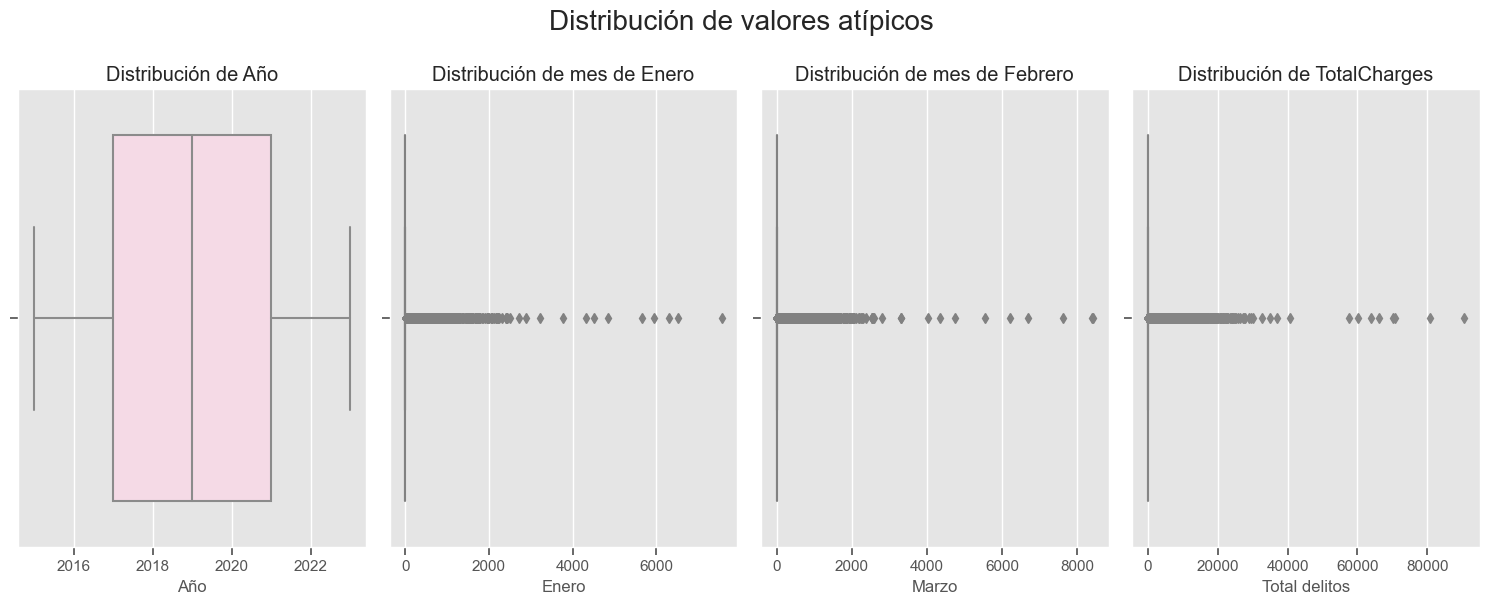

In [6]:
# Definición de columnas numéricas
df_select['Total delitos'] = pd.to_numeric(df['Total delitos'], errors='coerce')
df_select['Total delitos'] = df_select['Total delitos'].astype(float)
df_select['Total delitos'] = df_select['Total delitos'].fillna(df['Total delitos'].mean())

# Graficar boxplots
fig, axs = plt.subplots(ncols=4, figsize=(15,6))
fig.suptitle('Distribución de valores atípicos ', fontsize=20, y=1.0)
sns.boxplot(x=df['Año'], ax=axs[0], color='#F9D5E5')
sns.boxplot(x=df['Enero'], ax=axs[1], color='#FDD5B1')
sns.boxplot(x=df['Marzo'], ax=axs[2], color='#FDD5B1')
sns.boxplot(x=df['Total delitos'], ax=axs[3], color='#E2F0CB')
axs[0].set_title('Distribución de Año')
axs[1].set_title('Distribución de mes de Enero')
axs[2].set_title('Distribución de mes de Febrero')
axs[3].set_title('Distribución de TotalCharges')
plt.tight_layout()
plt.show()

## Análisis Univariado

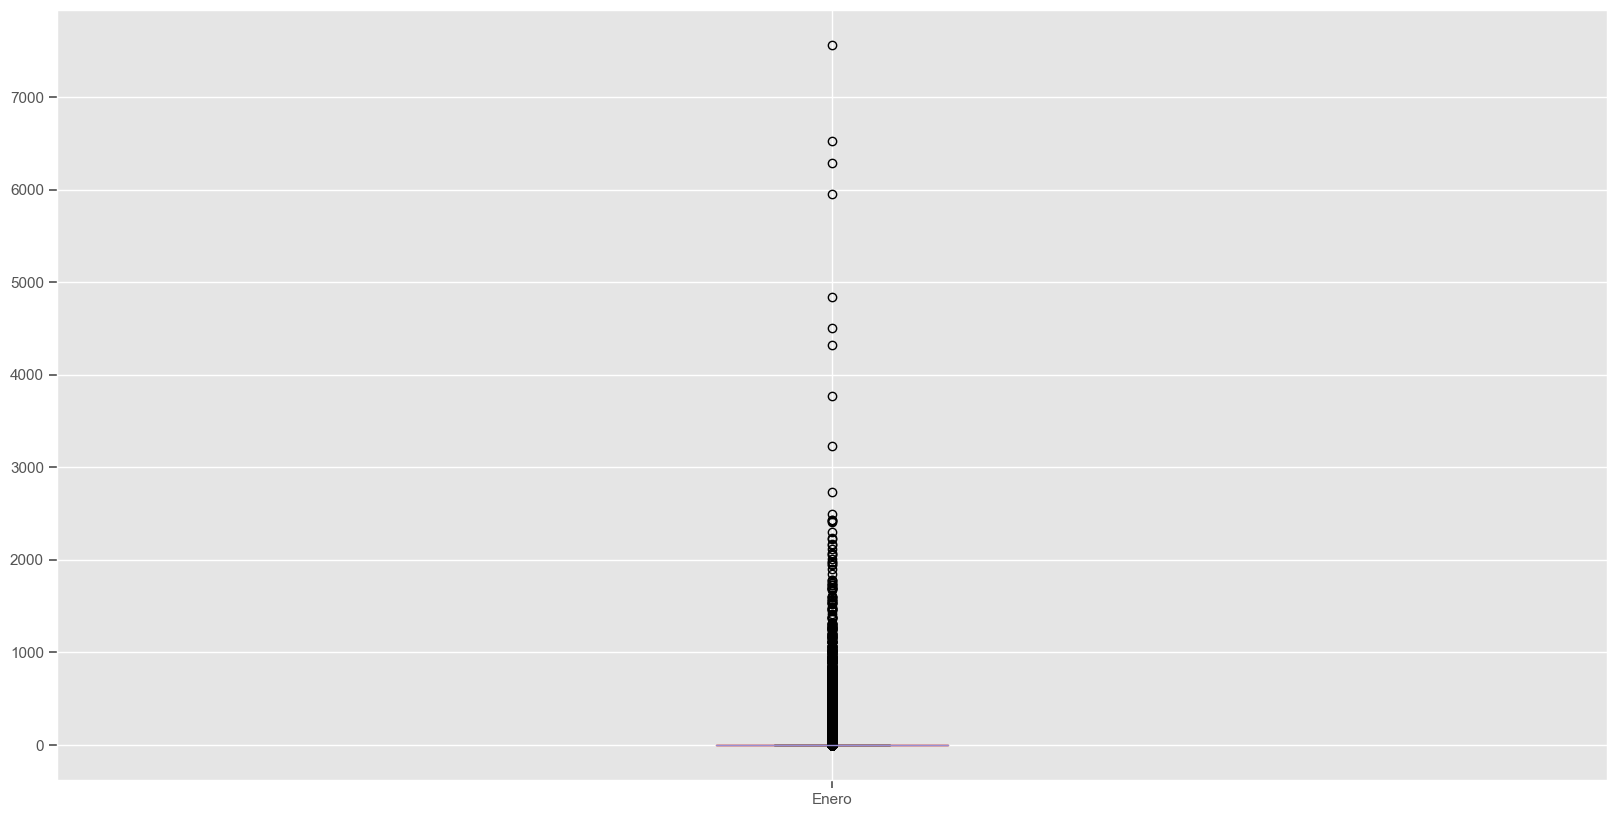

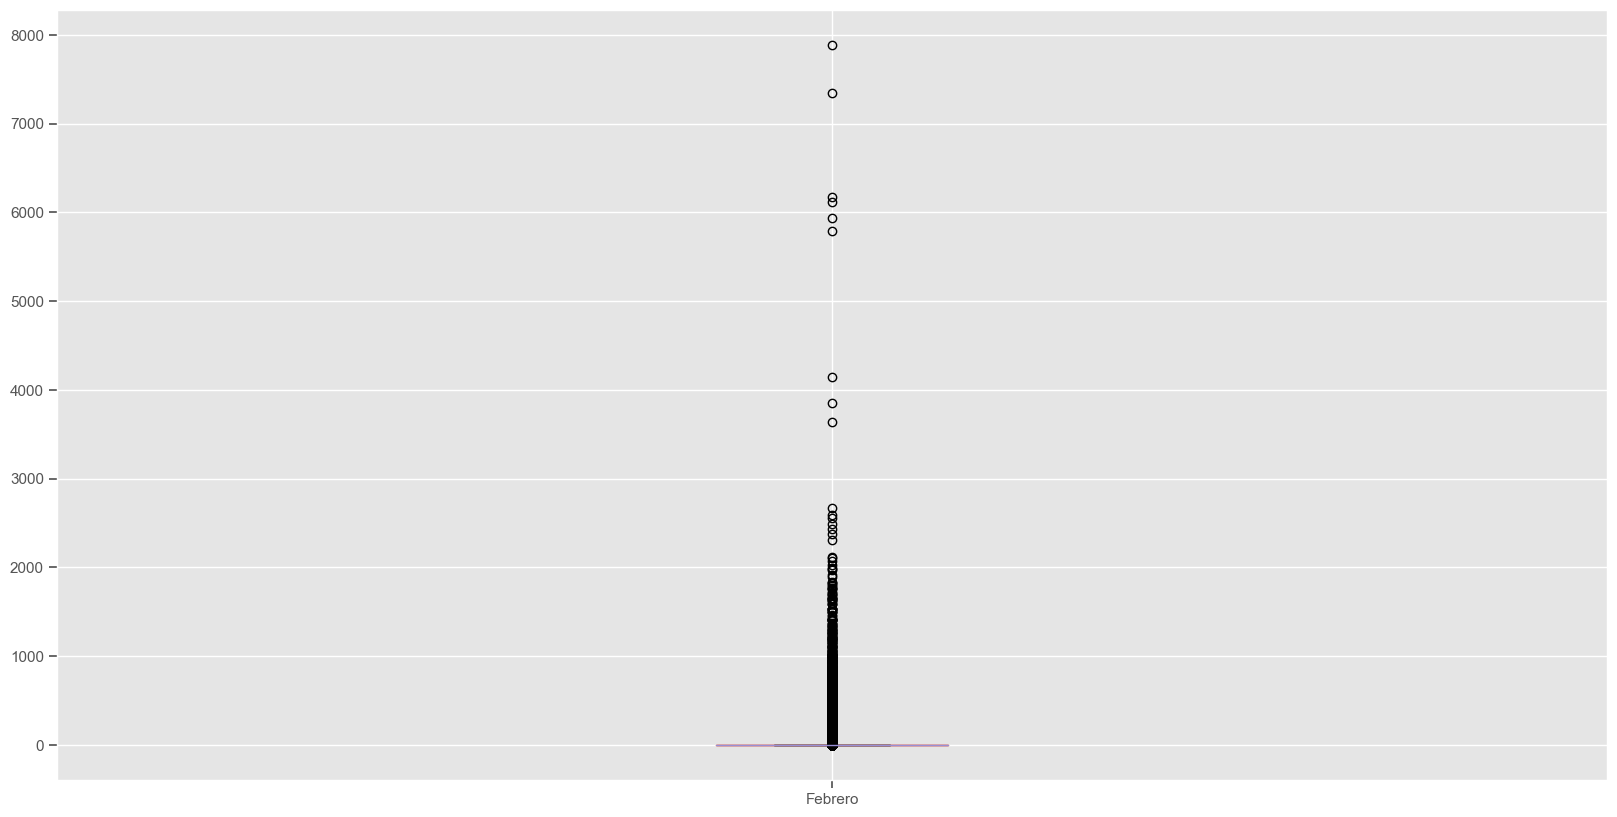

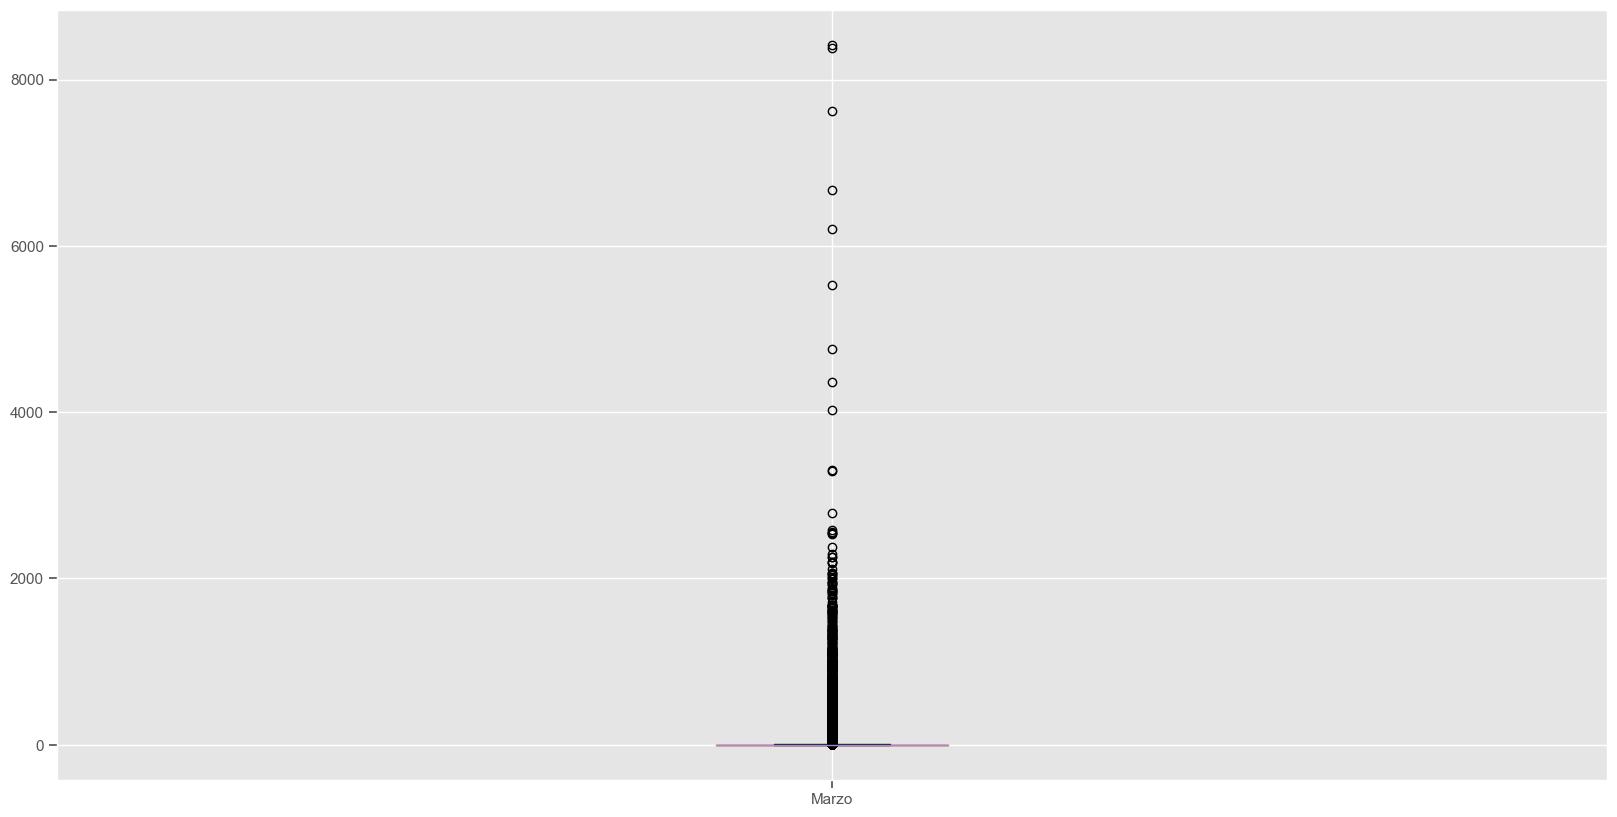

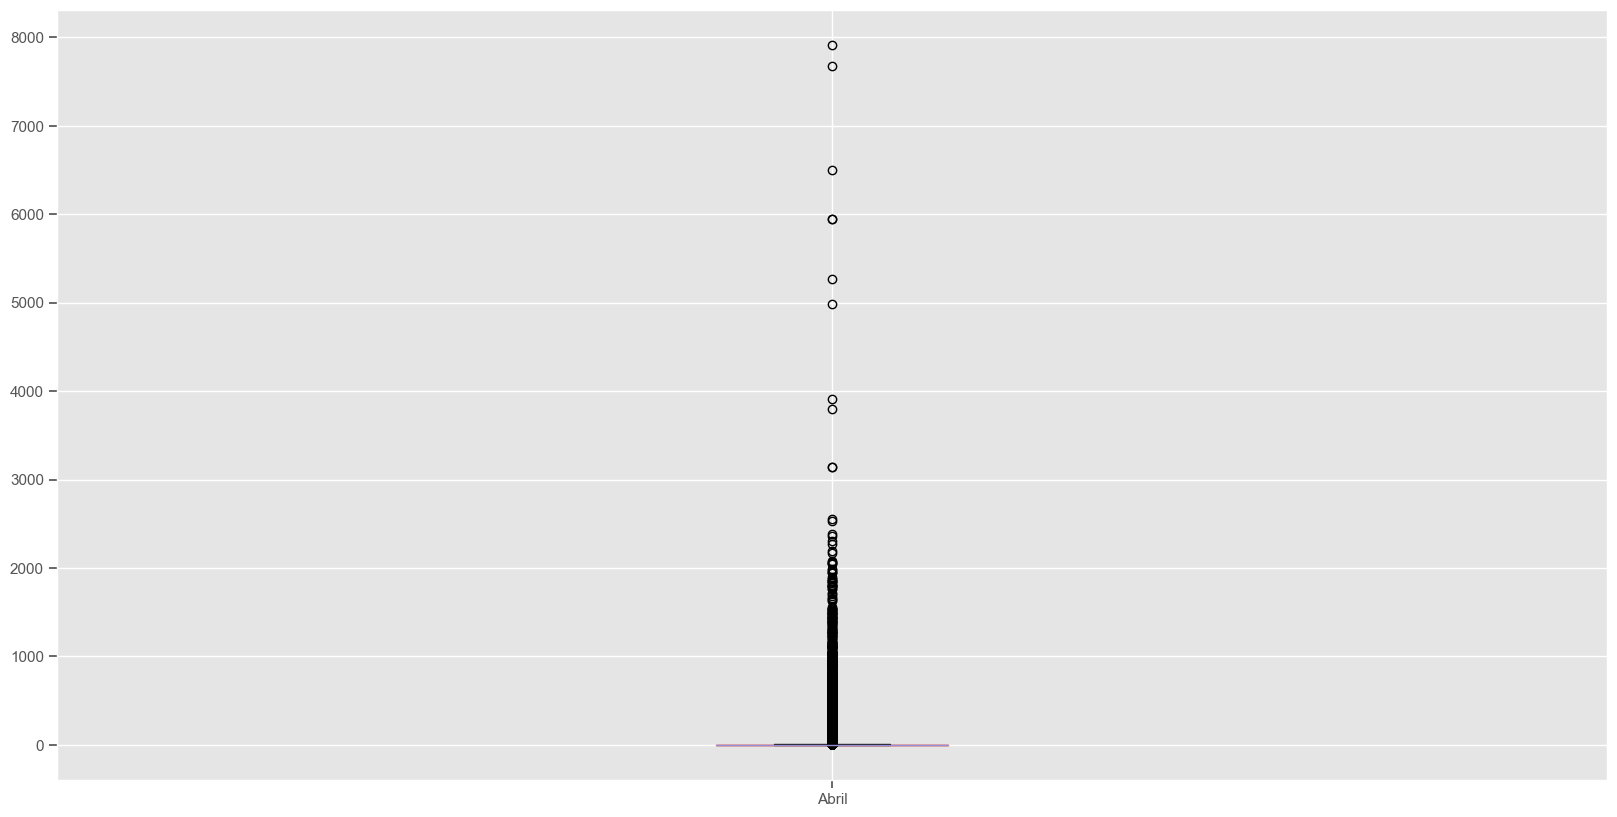

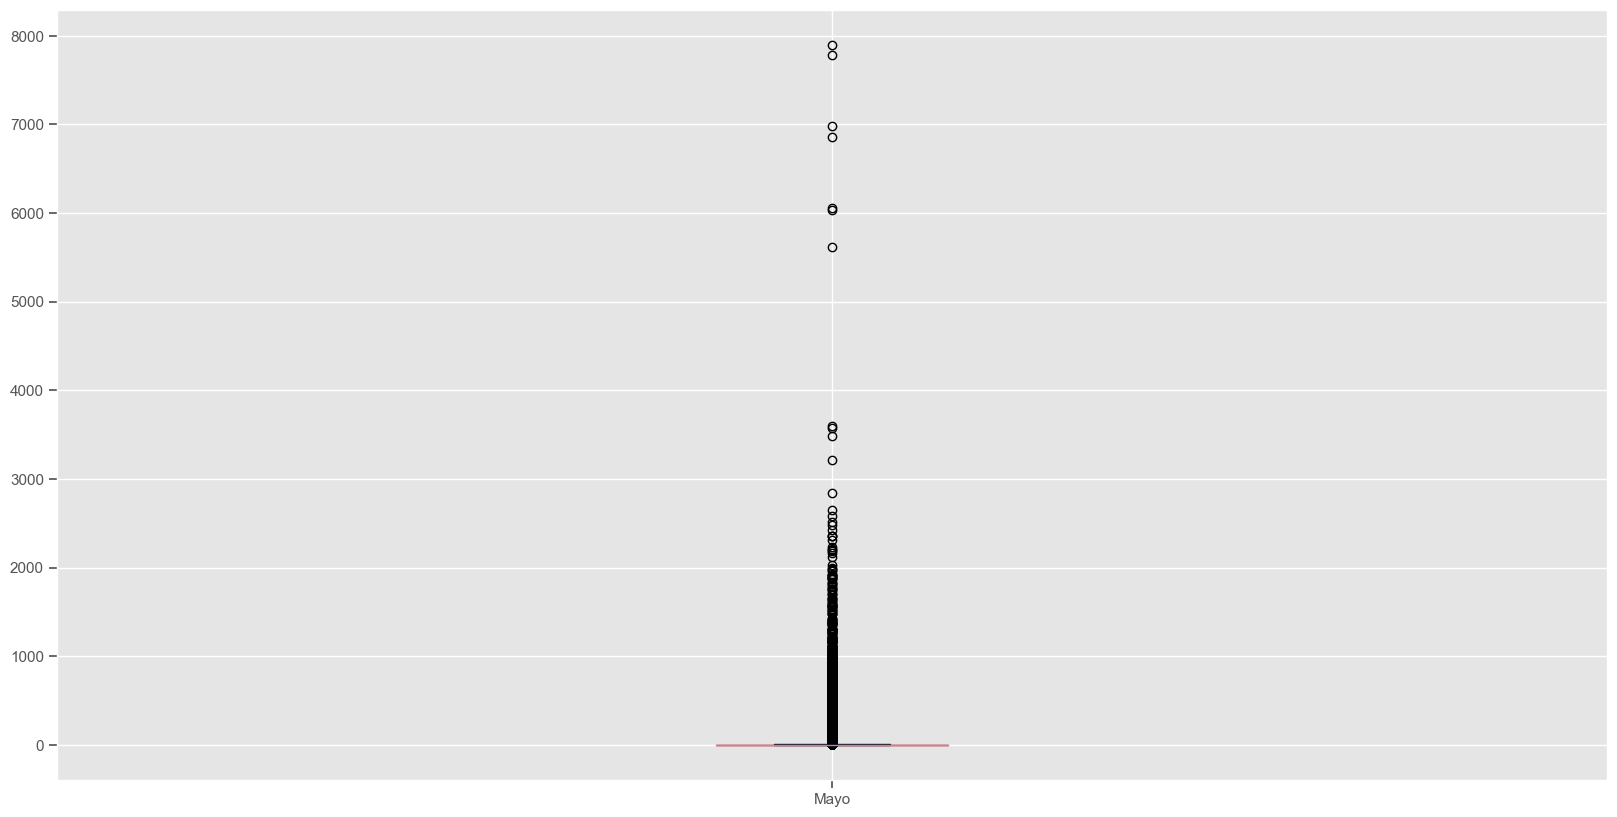

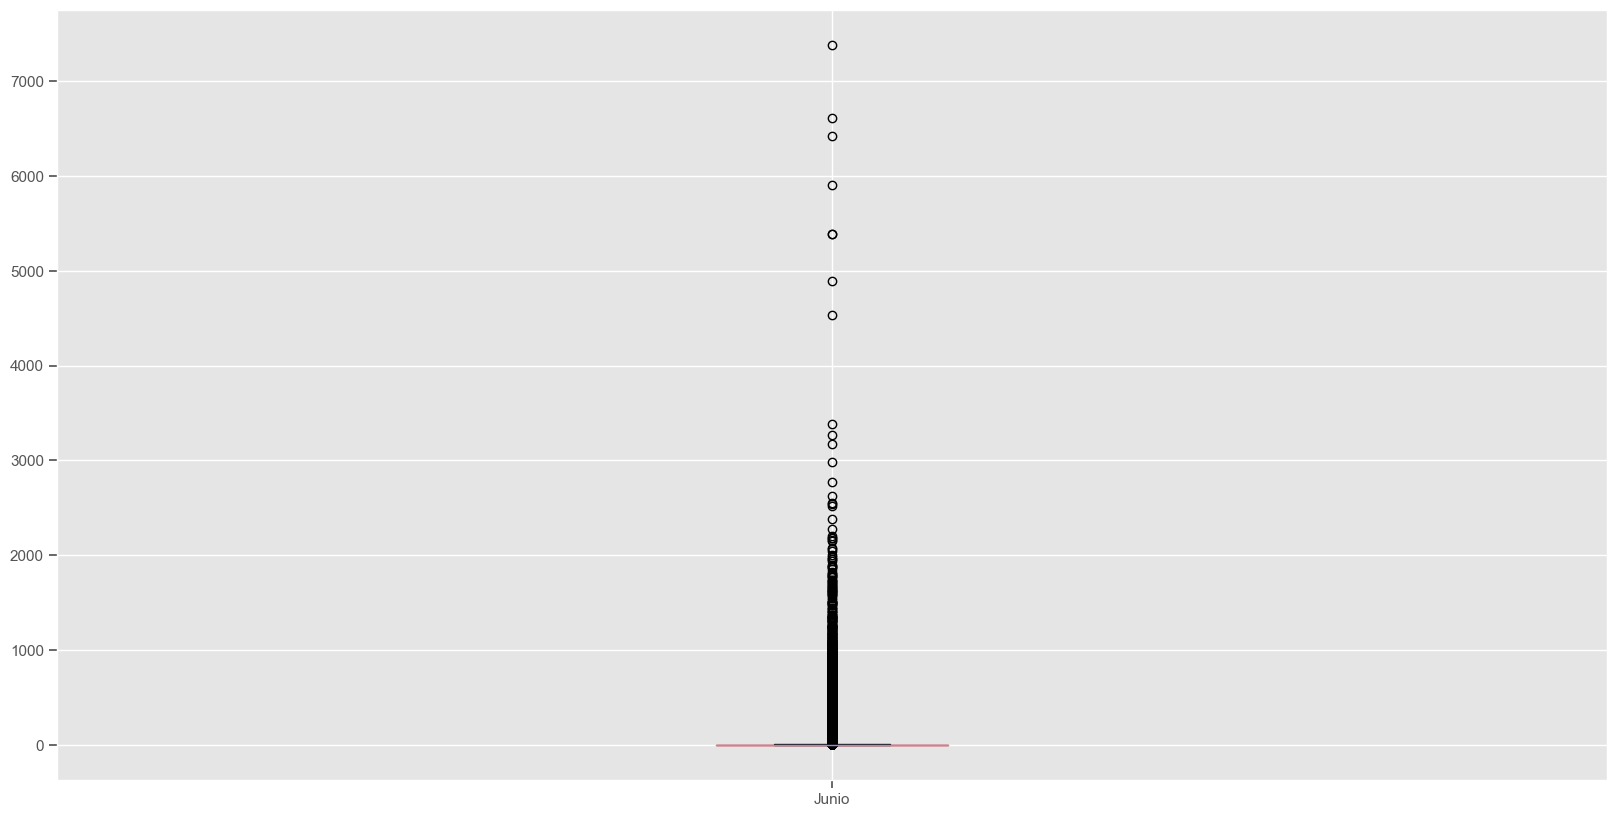

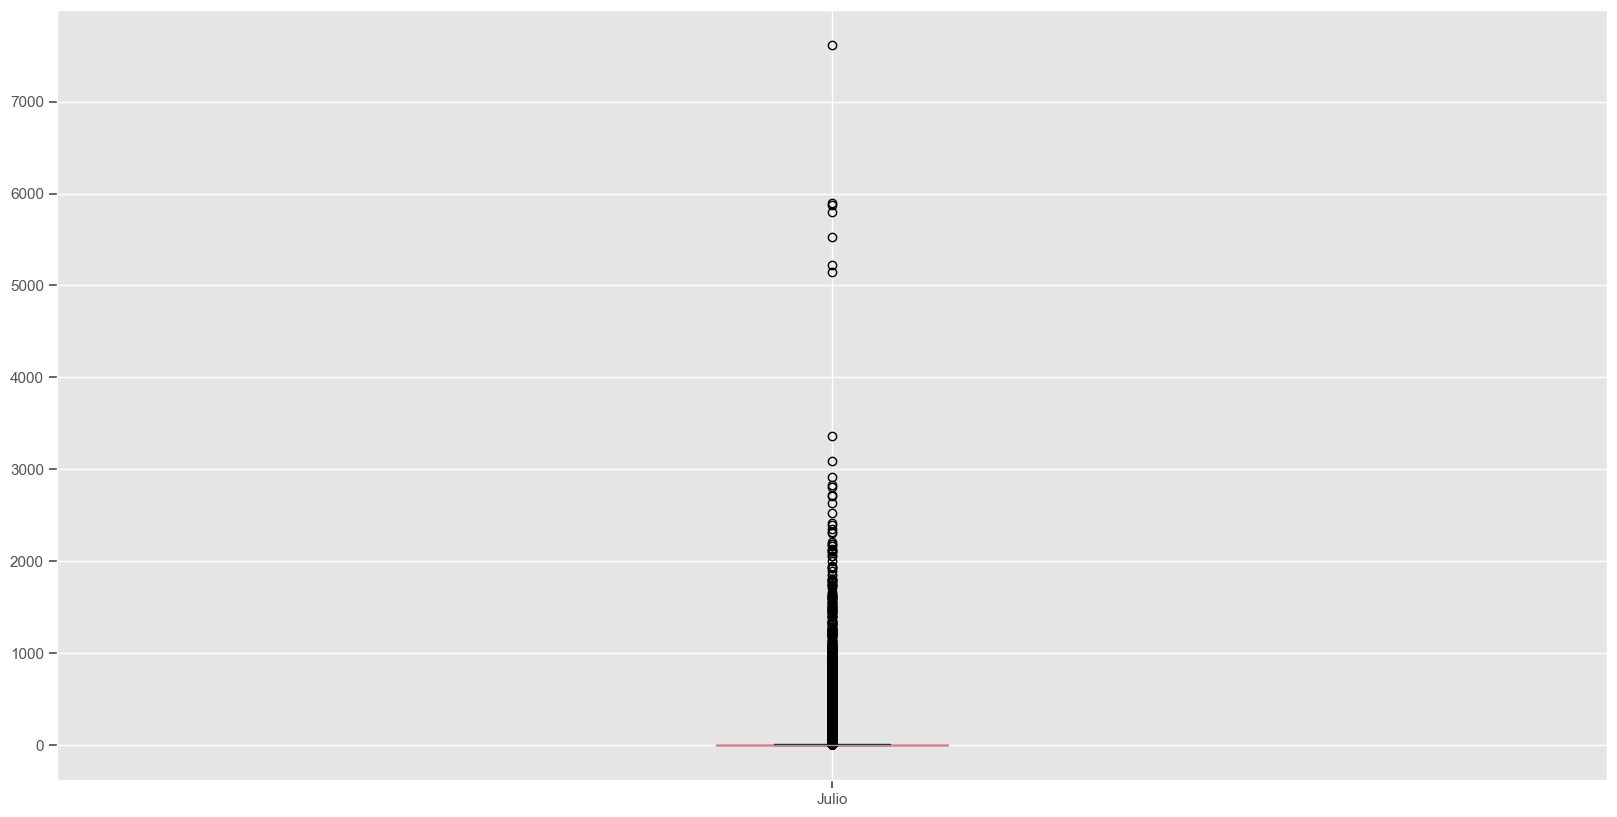

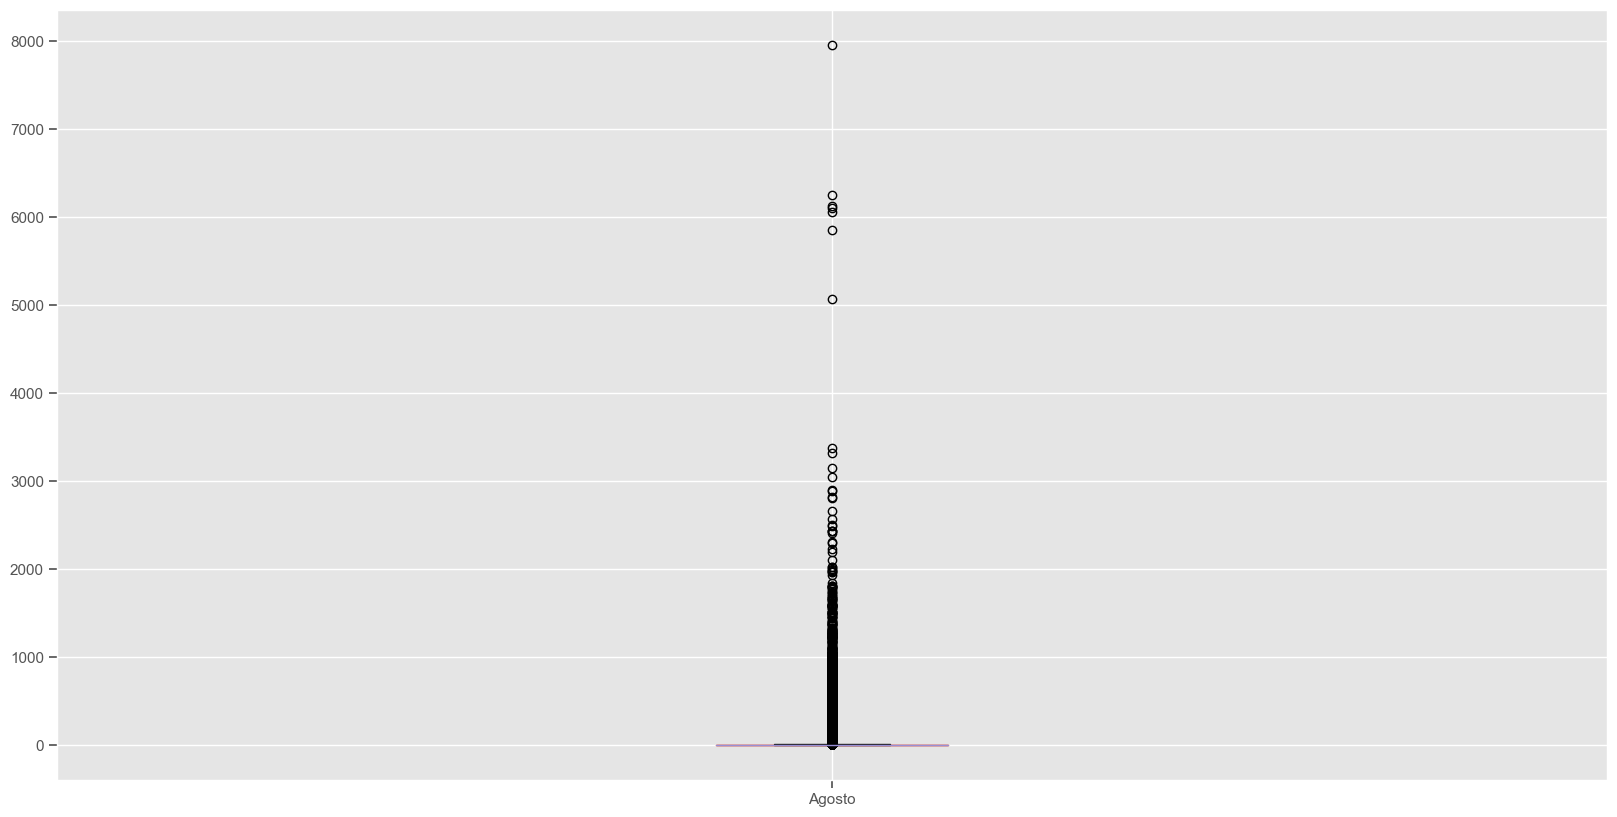

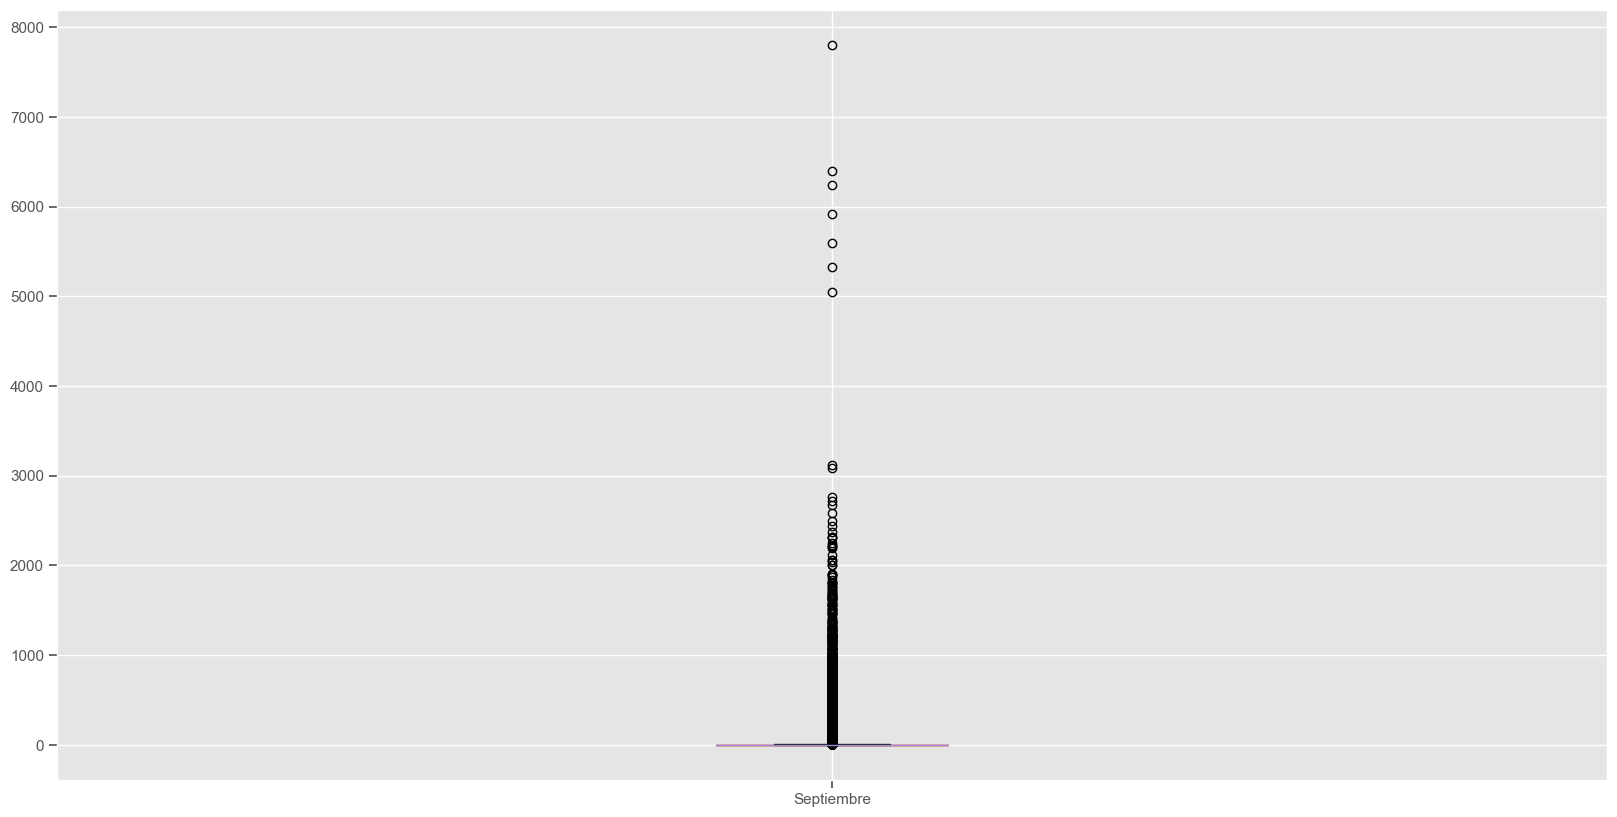

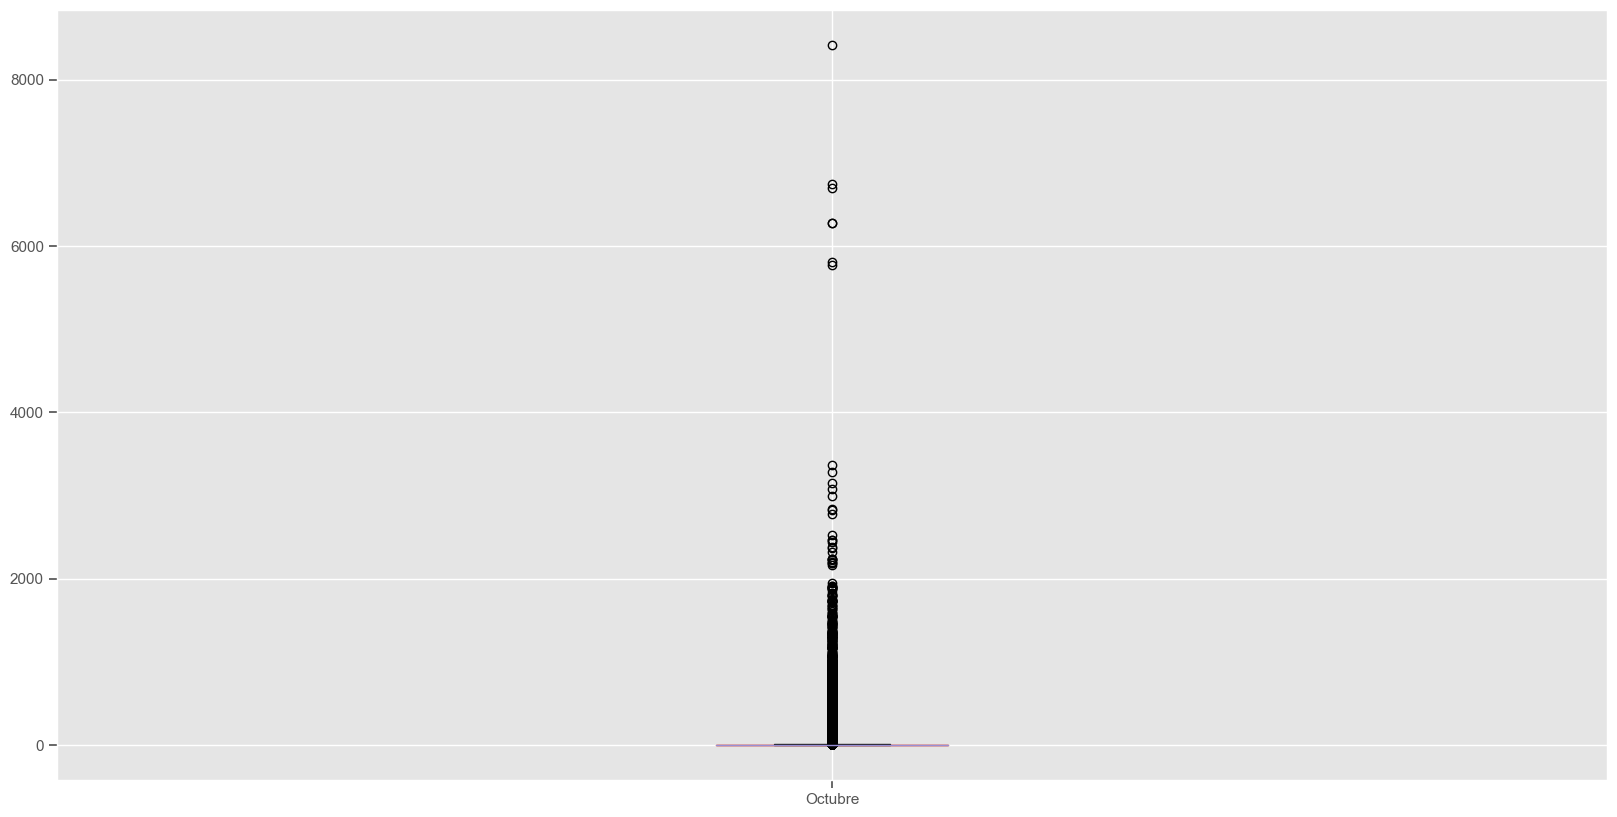

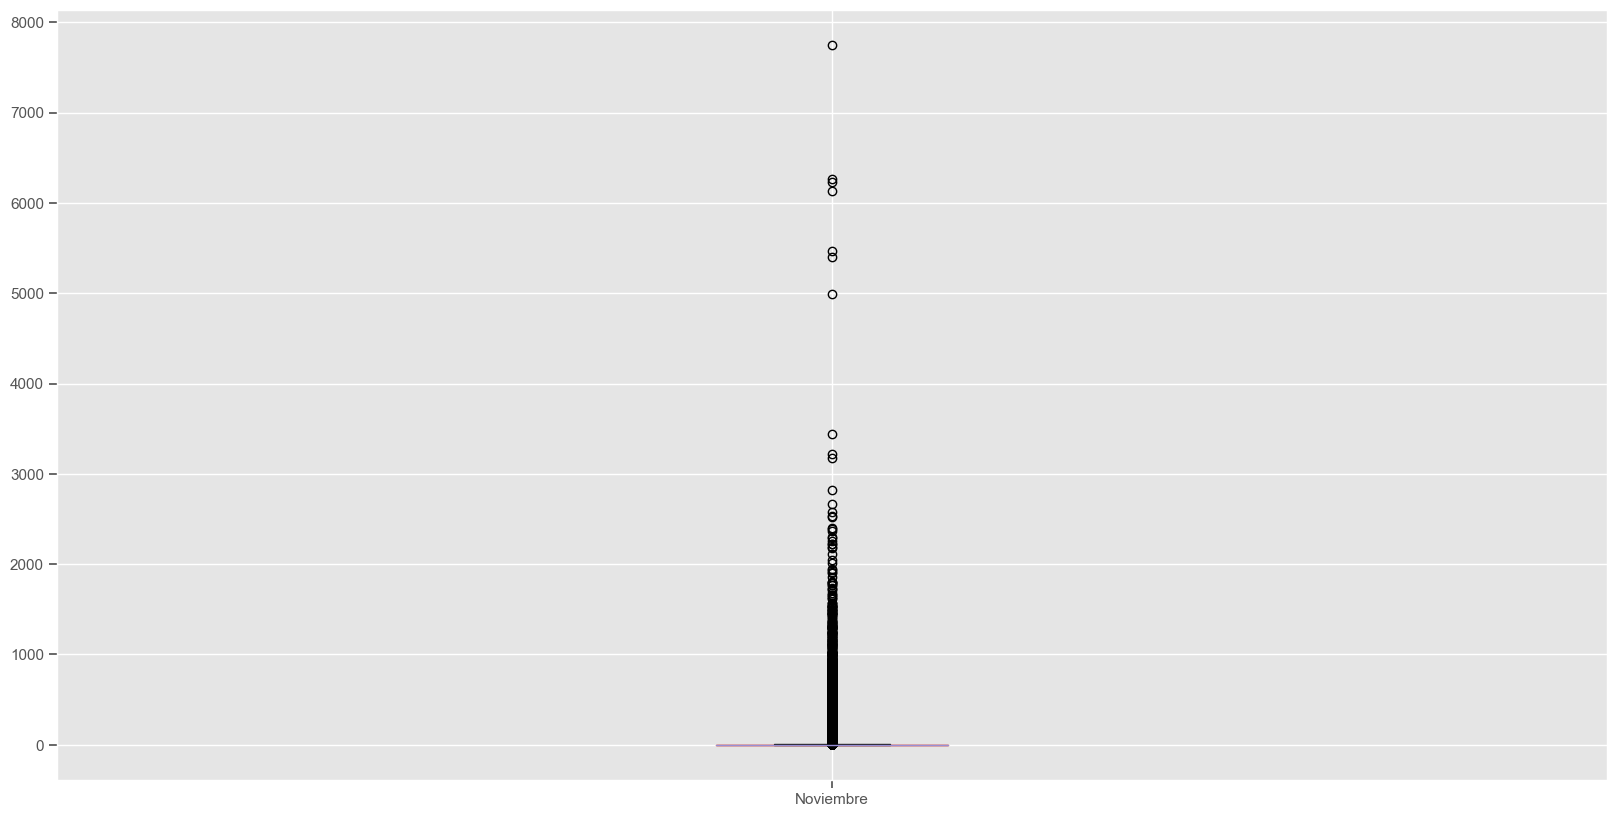

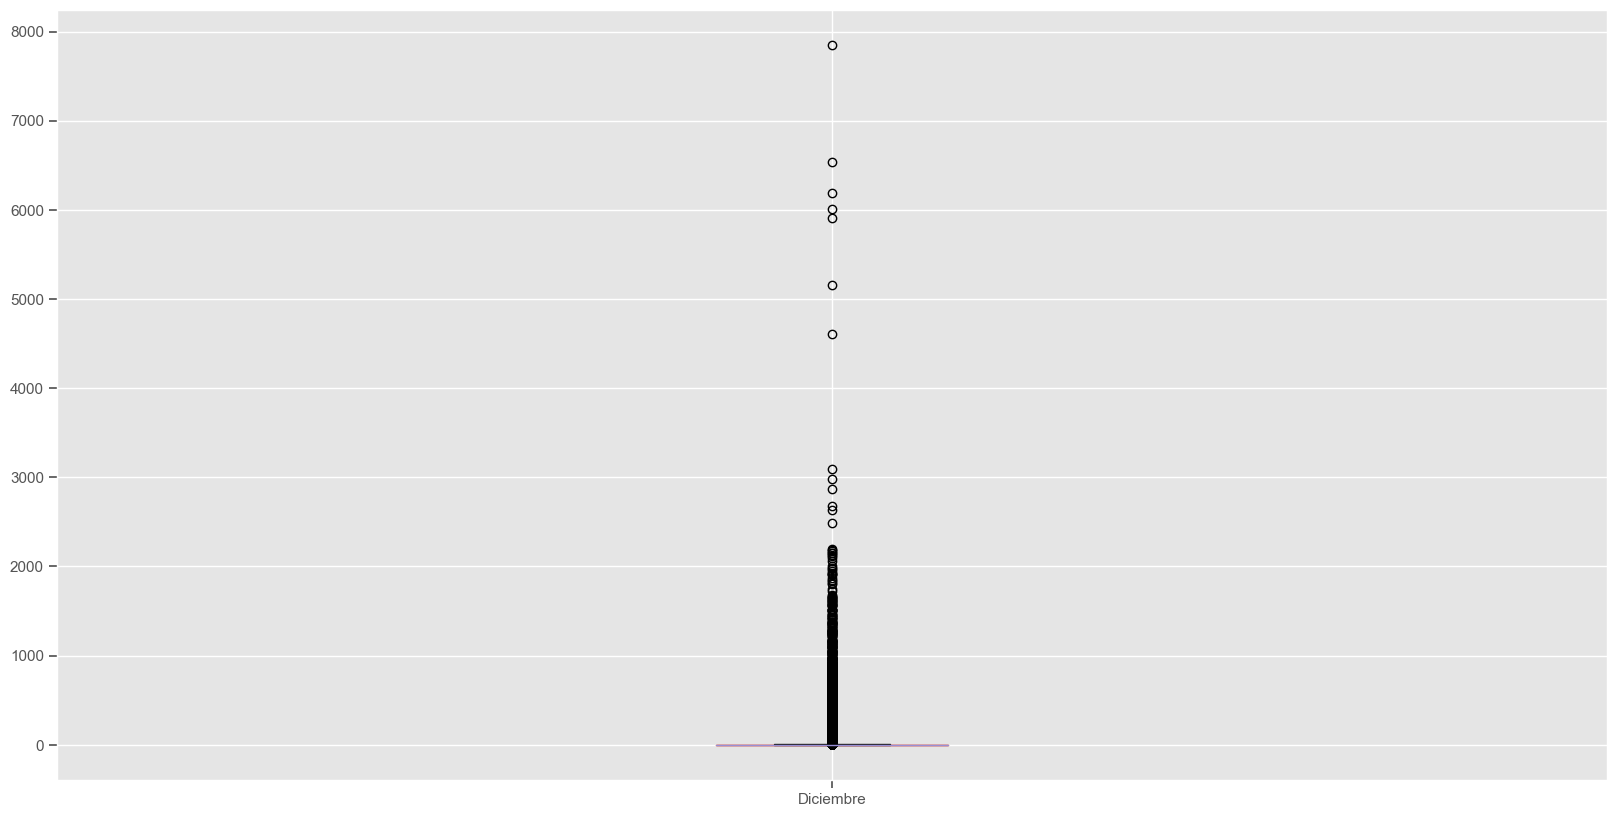

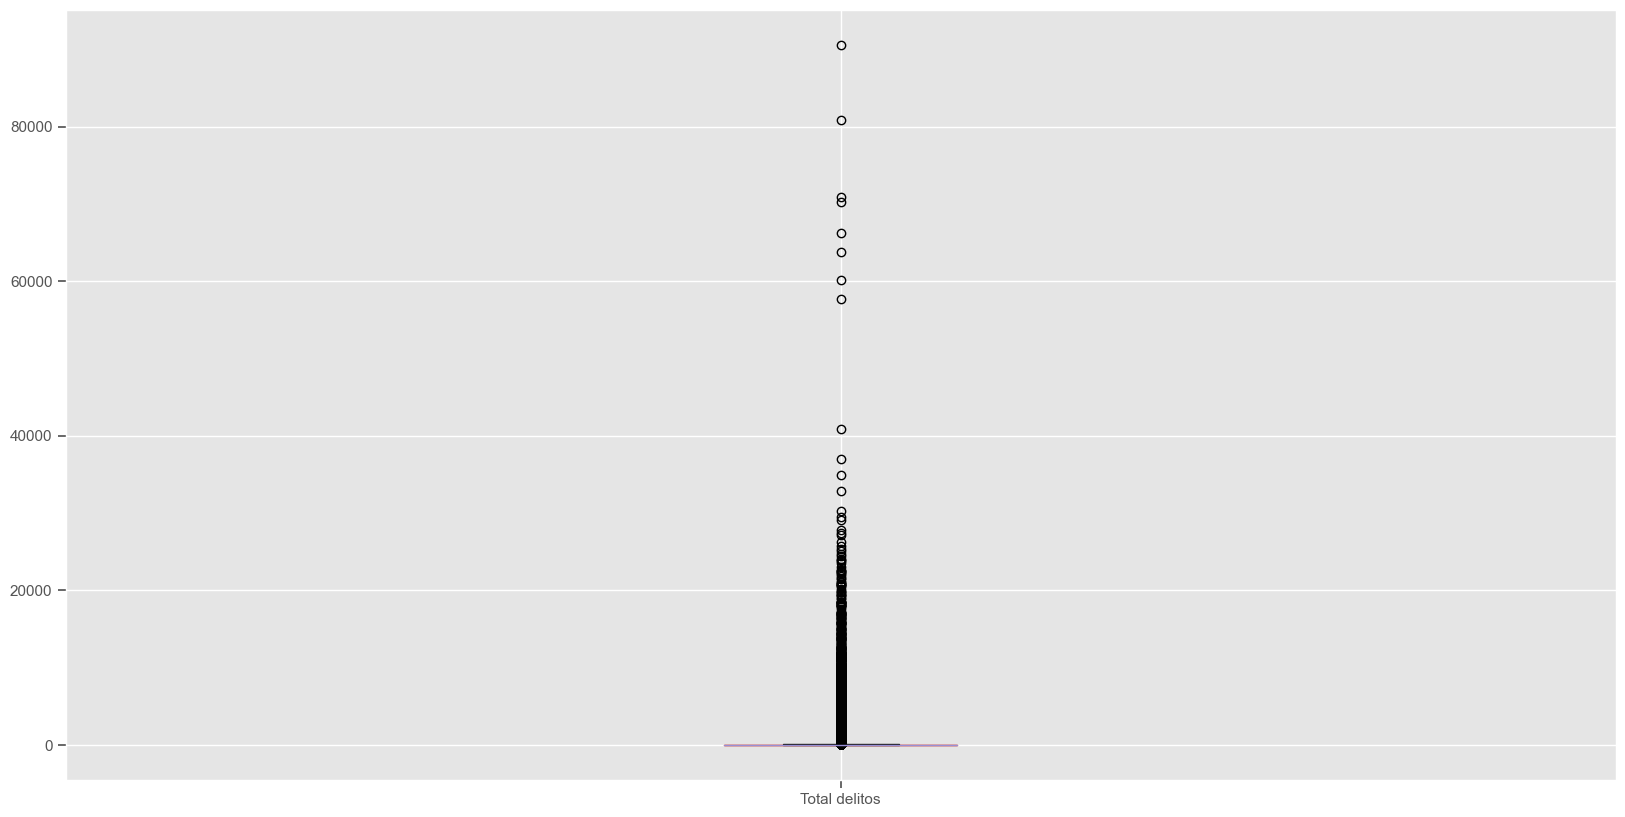

In [7]:
univariado = df_select.drop(['Entidad','Bien jurídico afectado','Tipo de delito','Subtipo de delito','Modalidad','Sexo/Averiguación previa','Rango de edad','Año','Clave_Ent'], axis=1)
for i in univariado:
    univariado.boxplot(column = i)
    plt.show()

**Conclusión**

De acuerdo a los resultados de Datos atipicos y Datos univariados podemos encontrar efectivamente datos atipicos, pero en relación a los datos no podemos eliminarlos ya que aunque haya registros de 0 crimenes en algunos meses no quiere decir que esta mal, por lo cual se dejara de esta forma

## 3.3 Distribución de variables categóricas

In [8]:
def graficos_eda_categoricos(cat):

    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 1)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 1, figsize = (10, filas * 10))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

Eliminamos las columnas que no son de nuestro interes y solo mostramos los que si

In [9]:
df_eda=df_select.loc[:, ['Bien jurídico afectado','Subtipo de delito','Modalidad','Sexo/Averiguación previa','Rango de edad']]

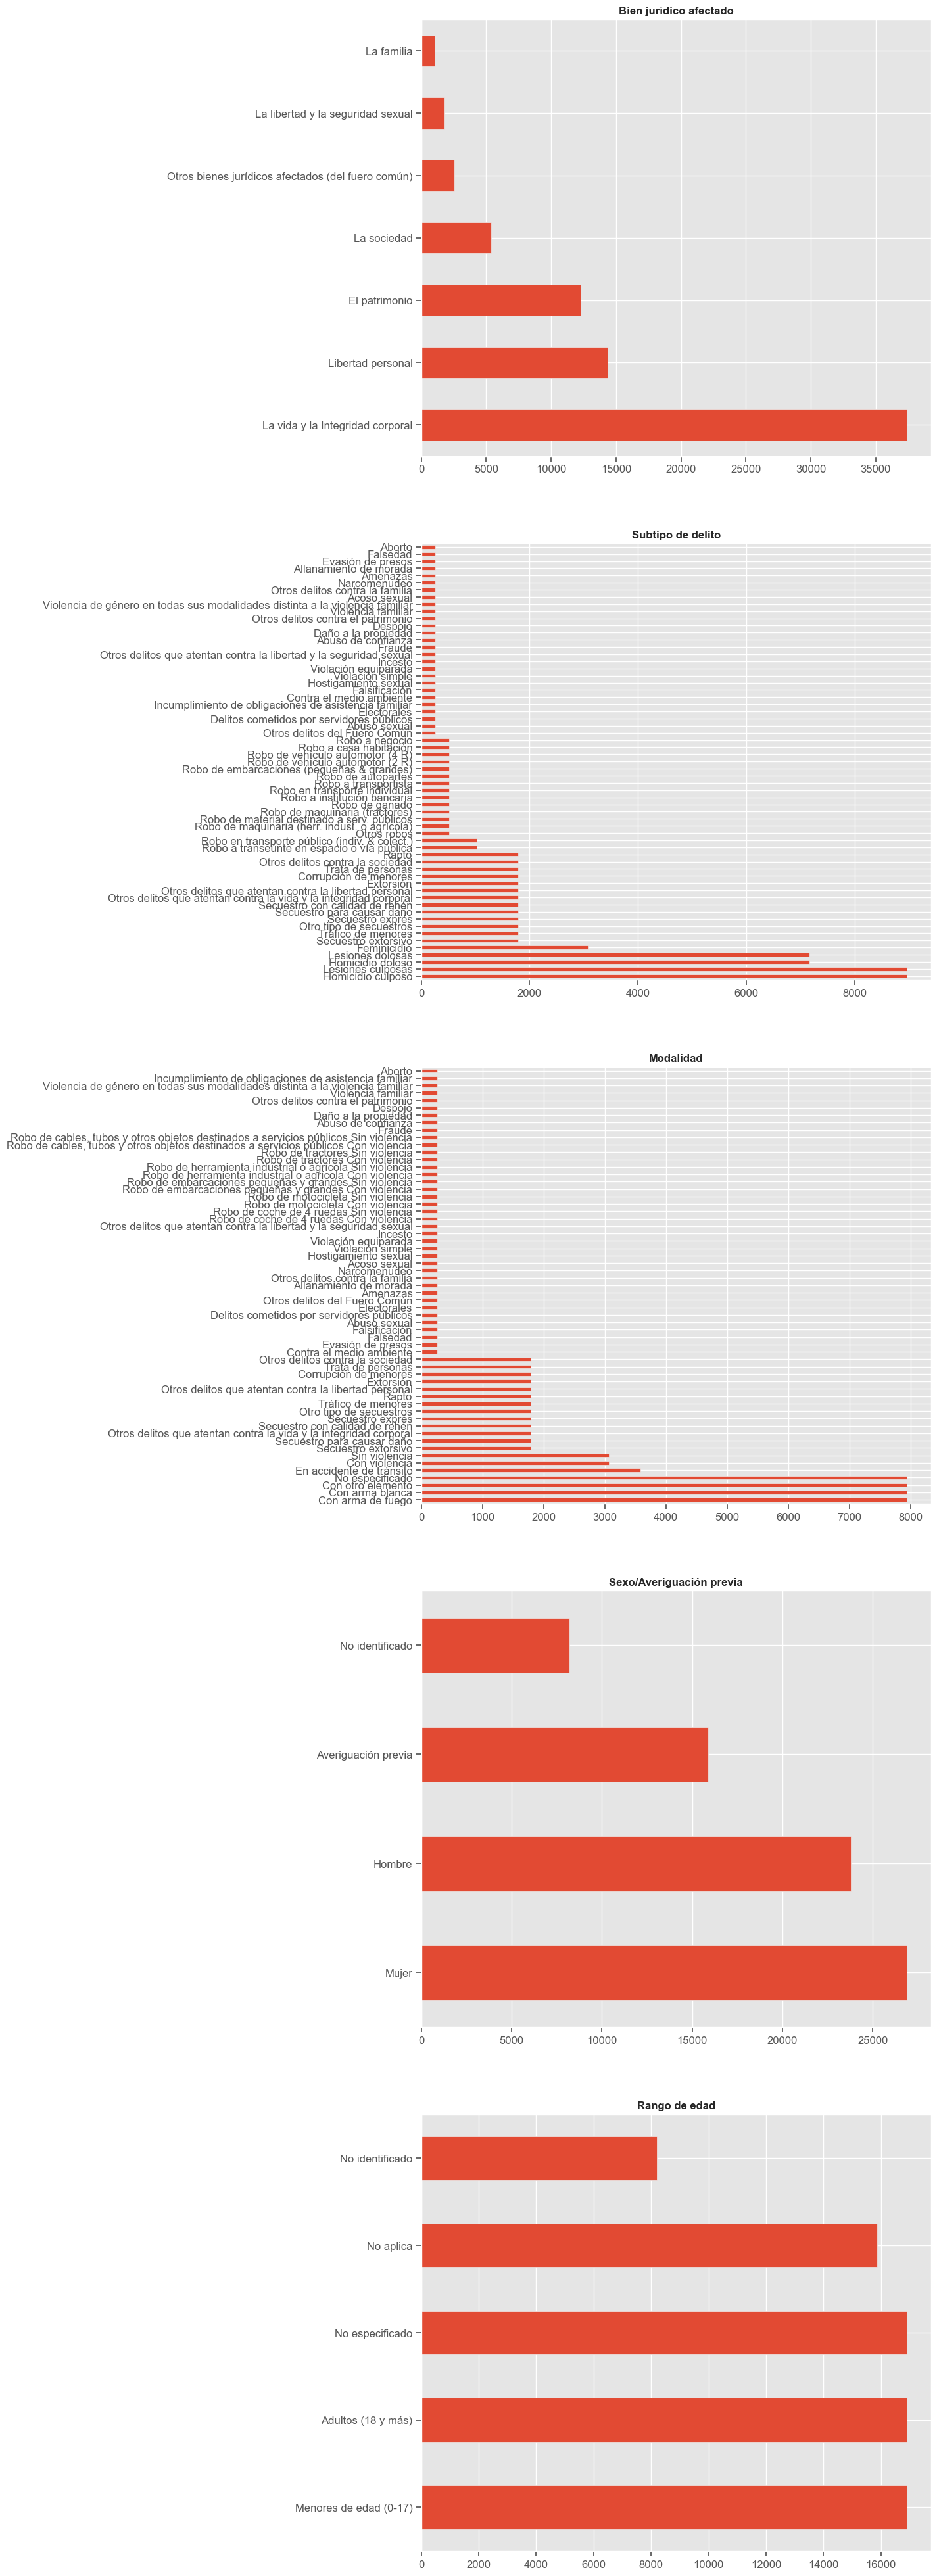

In [10]:
graficos_eda_categoricos(df_eda.select_dtypes('O'))

## Conclusiones

*   El análisis de las variables categóricas muestra algunas tendencias interesantes en cuanto a la distribución de los datos.

*   La variable "sexo/averiguacion previa" muestra una distribución bastante uniforme, con la mayoría de los deitos comentidos sufren el genero "Mujer", siguiendo del genero "Masculino", lo que sugiere que los crimes estan siendo afectado mas a Mujeres.

*   La variable "Modalidad" muestra que en la mayoria de los delitos son cometidos con armas de fuego, asi como arma blanca y accidentes de trafico, lo que se sugiere que en la sociedad se debe de tener en cuenta la situacion del manejo de armas y tomar precaciones en el trafico.

*   La variable "Bien juridico afectado" muestra que la mayoría de los delitos cometidos afecta en "La vida y la Integracion corporal", seguido de Libertad persinal y Patrimonio. Por lo que se sugiere dar mas atencion en los derechos humanos de las personas que estan siendo afectadas.

*   La variable "Rango de edad" muestra que la mayoría de los delitos estan afectos en Menores de edad, asi como en Adultos y tambien a quienes no han sido afectados por lo que es importante que el gobierno se centre en la sociedad de ese rango de edad para salvaguardar su seguridad.

En general, este análisis exploratorio proporciona información valiosa sobre las características de los afectados de los crimenes en la Republica Mexicana, lo que puede ayudar a la empresa a enfocarse al Estado con mayor crimenes y tomar acciones.

## 3.4  Análisis de variables numéricas

In [11]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7,8]]
    #Lo devolvemos
    return(estadisticos)

In [12]:
estadisticos_cont(df_select.select_dtypes('number'))

count         mean  median          std     min      25%  \
Año            74752.0  2018.500000  2018.5     2.291303  2015.0  2016.75   
Clave_Ent      74752.0    16.500000    16.5     9.233154     1.0     8.75   
Enero          74752.0    16.360525     0.0   106.202190     0.0     0.00   
Febrero        74752.0    16.441834     0.0   108.201395     0.0     0.00   
Marzo          74752.0    18.321249     0.0   120.517912     0.0     0.00   
Abril          74752.0    17.109027     0.0   112.847277     0.0     0.00   
Mayo           74752.0    18.052989     0.0   118.971911     0.0     0.00   
Junio          74752.0    17.902692     0.0   114.668999     0.0     0.00   
Julio          74752.0    17.657093     0.0   113.156781     0.0     0.00   
Agosto         74752.0    18.170845     0.0   116.964523     0.0     0.00   
Septiembre     74752.0    17.738134     0.0   112.967172     0.0     0.00   
Octubre        74752.0    18.604760     0.0   119.807958     0.0     0.00   
Noviembre      74752.0    17.379722     0.0   111.303051     0.0     0.00   
Diciembre      74752.0    16.776354     0.0   109.274860     0.0     0.00   
Total delitos  74752.0   210.515224     1.0  1343.455293     0.0     0.00   

                  50%      75%      max  median  
Año            2018.5  2020.25   2022.0  2018.5  
Clave_Ent        16.5    24.25     32.0    16.5  
Enero             0.0     1.00   7565.0     0.0  
Febrero           0.0     1.00   7888.0     0.0  
Marzo             0.0     2.00   8418.0     0.0  
Abril             0.0     2.00   7916.0     0.0  
Mayo              0.0     2.00   7899.0     0.0  
Junio             0.0     2.00   7386.0     0.0  
Julio             0.0     2.00   7619.0     0.0  
Agosto            0.0     2.00   7955.0     0.0  
Septiembre        0.0     2.00   7805.0     0.0  
Octubre           0.0     2.00   8421.0     0.0  
Noviembre         0.0     2.00   7750.0     0.0  
Diciembre         0.0     2.00   7851.0     0.0  
Total delitos     1.0    22.00  90573.0     1.0

### Conclusiones

De los nulos pendientes de imputación que sean numéricas solo hay en los campos Enero, Febrero, Marzo, Abril, Mayo, junio, Julio, Agosto, Septiembre, Octubre ,Noviembre, Diciembre, pero como esta trabjando con un rango de fechas que es del 2025-2022 ya no hay que imputar nada

## 3.5 Análisis específicos para responder a las preguntas de investigación

### Cuáles son los estados con la tasa más alta de delitos según los reportes disponibles?

In [13]:
# Sumamos el total de delitos agrupanto por estado
df_delitos = df_select.groupby('Entidad').sum()
df_delitos = df_delitos.sort_values('Total delitos', ascending=False)

In [14]:
df_delitos = df_delitos.reset_index()
df_delitos

Entidad      Año  Clave_Ent   Enero  Febrero  \
0                            México  4715216      35040  218745   224568   
1                  Ciudad de México  4715216      21024  130945   133114   
2                           Jalisco  4715216      32704   91548    85679   
3                        Guanajuato  4715216      25696   81494    79533   
4                   Baja California  4715216       4672   69404    65761   
5                        Nuevo León  4715216      44384   50286    52710   
6   Veracruz de Ignacio de la Llave  4715216      70080   42551    46354   
7                         Chihuahua  4715216      18688   43264    44491   
8                            Puebla  4715216      49056   40303    41513   
9              Coahuila de Zaragoza  4715216      11680   32158    34166   
10                          Tabasco  4715216      63072   33759    34404   
11                        Querétaro  4715216      51392   32255    31330   
12                          Morelos  4715216      39712   27910    28957   
13                          Hidalgo  4715216      30368   28349    28204   
14              Michoacán de Ocampo  4715216      37376   27608    26791   
15                       Tamaulipas  4715216      65408   26025    26416   
16                  San Luis Potosí  4715216      56064   23876    24506   
17                     Quintana Roo  4715216      53728   23669    22333   
18                           Oaxaca  4715216      46720   23051    23820   
19                   Aguascalientes  4715216       2336   20587    20059   
20                         Guerrero  4715216      28032   20743    20062   
21                           Sonora  4715216      60736   18159    19420   
22                          Durango  4715216      23360   18979    19288   
23                          Sinaloa  4715216      58400   16480    16364   
24                           Colima  4715216      14016   15125    14003   
25                        Zacatecas  4715216      74752   13578    13816   
26              Baja California Sur  4715216       7008   14096    13840   
27                          Chiapas  4715216      16352   14307    14081   
28                          Yucatán  4715216      72416   13149    12711   
29                         Tlaxcala  4715216      67744    4110     3981   
30                         Campeche  4715216       9344    3277     3236   
31                          Nayarit  4715216      42048    3192     3549   

       Marzo     Abril      Mayo     Junio     Julio    Agosto  Septiembre  \
0   250491.0  237833.0  249660.0  239541.0  235828.0  244373.0    241062.0   
1   148582.0  134754.0  142219.0  140596.0  143685.0  147703.0    143008.0   
2    94056.0   88078.0   91032.0   95880.0   96409.0   97565.0     91702.0   
3    88163.0   82081.0   86976.0   84117.0   84012.0   86976.0     85150.0   
4    74201.0   70366.0   72774.0   73354.0   75198.0   77270.0     74033.0   
5    58077.0   54119.0   59423.0   62683.0   59851.0   66019.0     63149.0   
6    52135.0   48865.0   48704.0   48794.0   45773.0   47207.0     48982.0   
7    48445.0   45916.0   49574.0   49950.0   49342.0   49403.0     47803.0   
8    48034.0   45819.0   47935.0   45719.0   44847.0   43118.0     42398.0   
9    38803.0   35550.0   38029.0   41323.0   37328.0   38961.0     38808.0   
10   38089.0   35386.0   37545.0   37432.0   38592.0   37294.0     36356.0   
11   35717.0   33772.0   35851.0   35303.0   36596.0   37455.0     35945.0   
12   32511.0   29727.0   30574.0   29773.0   29489.0   30256.0     28985.0   
13   29161.0   28168.0   30737.0   28990.0   25234.0   30360.0     31031.0   
14   29597.0   27393.0   29439.0   28490.0   28536.0   29072.0     28817.0   
15   29038.0   27610.0   29949.0   30109.0   28221.0   31209.0     29770.0   
16   27554.0   26358.0   28223.0   28558.0   29164.0   29193.0     28787.0   
17   26208.0   23031.0   24877.0   24917.0   26098.0   25772.0     25306.0   
18   25621.0   24310.0   25910.0   22

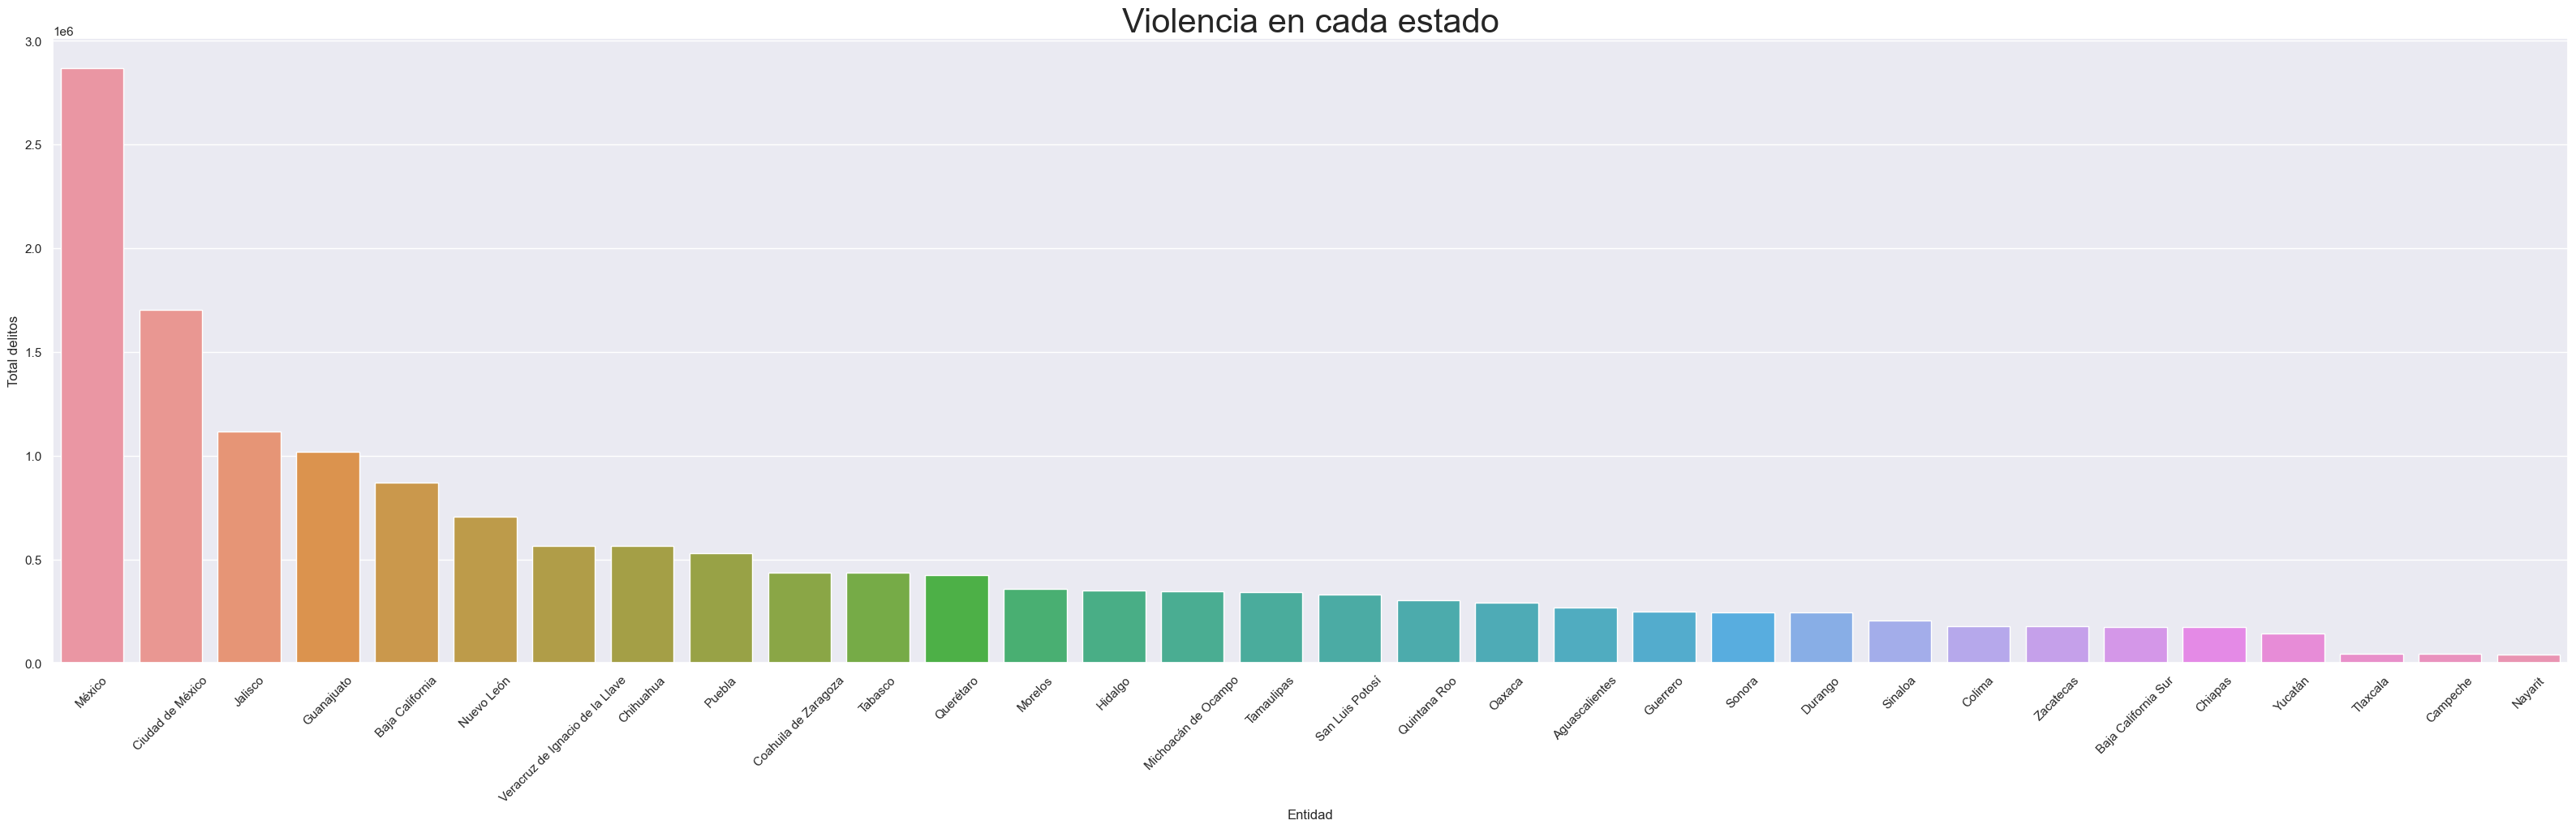

In [15]:
# Graficamos lo que obtumos en la consulta anterior
sns.set(rc = {'figure.figsize':(40,10)})
#plot = sns.lineplot( x=name, y=value)
plot = sns.barplot(data=df_delitos, x='Entidad', y='Total delitos')
plot.axes.set_title("Violencia en cada estado",fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [16]:
top3_crimes = df_delitos.head(3)
top3_crimes

Entidad      Año  Clave_Ent   Enero  Febrero     Marzo     Abril  \
0            México  4715216      35040  218745   224568  250491.0  237833.0   
1  Ciudad de México  4715216      21024  130945   133114  148582.0  134754.0   
2           Jalisco  4715216      32704   91548    85679   94056.0   88078.0   

       Mayo     Junio     Julio    Agosto  Septiembre   Octubre  Noviembre  \
0  249660.0  239541.0  235828.0  244373.0    241062.0  254896.0   238154.0   
1  142219.0  140596.0  143685.0  147703.0    143008.0  153729.0   145172.0   
2   91032.0   95880.0   96409.0   97565.0     91702.0  100198.0    92898.0   

   Diciembre  Total delitos  
0   232400.0      2867551.0  
1   138512.0      1702019.0  
2    91557.0      1116602.0

De acuerdo a la grafica, podemos observar que es estado con mayor delitos en la Republica Mexicana es es Estado de México

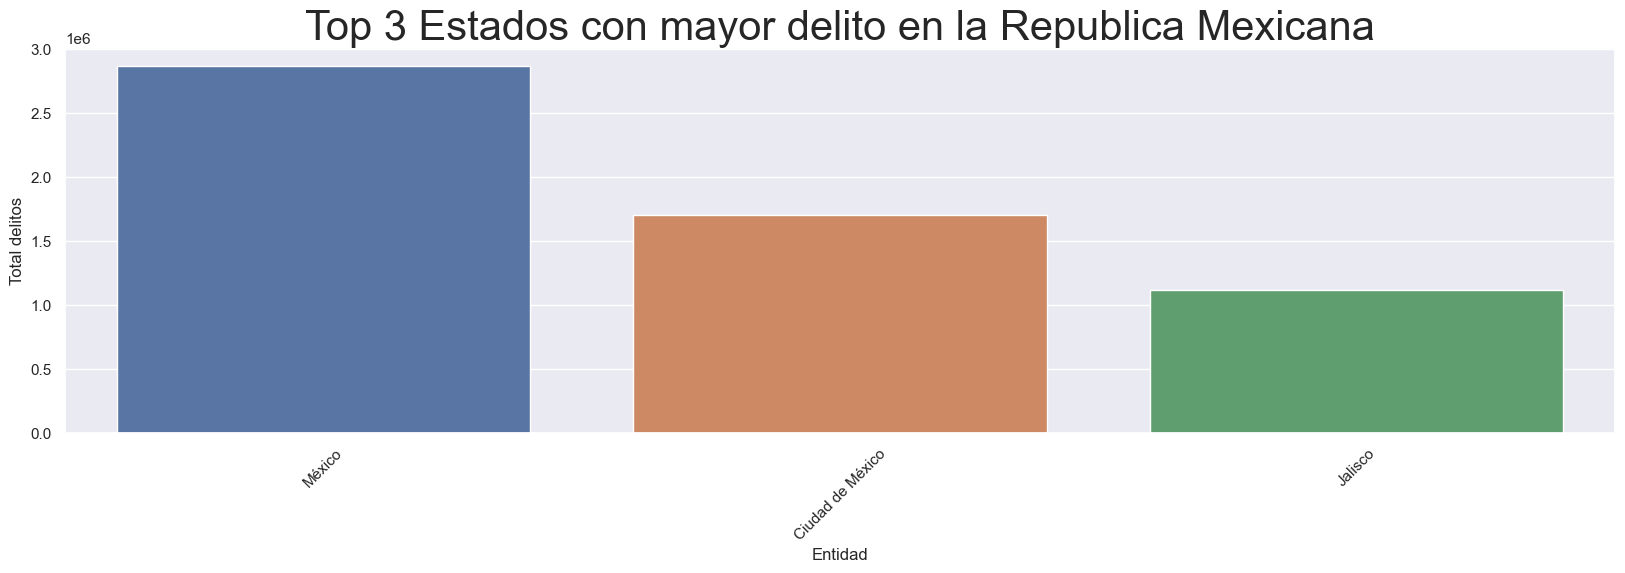

In [17]:
# Graficamos lo que obtumos en la consulta anterior
sns.set(rc = {'figure.figsize':(20,5)})
#plot = sns.lineplot( x=name, y=value)
plot = sns.barplot(data=top3_crimes, x='Entidad', y='Total delitos')
plot.axes.set_title("Top 3 Estados con mayor delito en la Republica Mexicana",fontsize=30)
plt.xticks(rotation=45)
plt.show()

In [18]:
# Filtramos el dataframe por la las 3 entidades con mayor delito
states = ['Ciudad de México', 'Jalisco','México']

selected_states = df.loc[df['Entidad'].isin(states)]
selected_states = selected_states.sort_values('Total delitos', ascending=False)

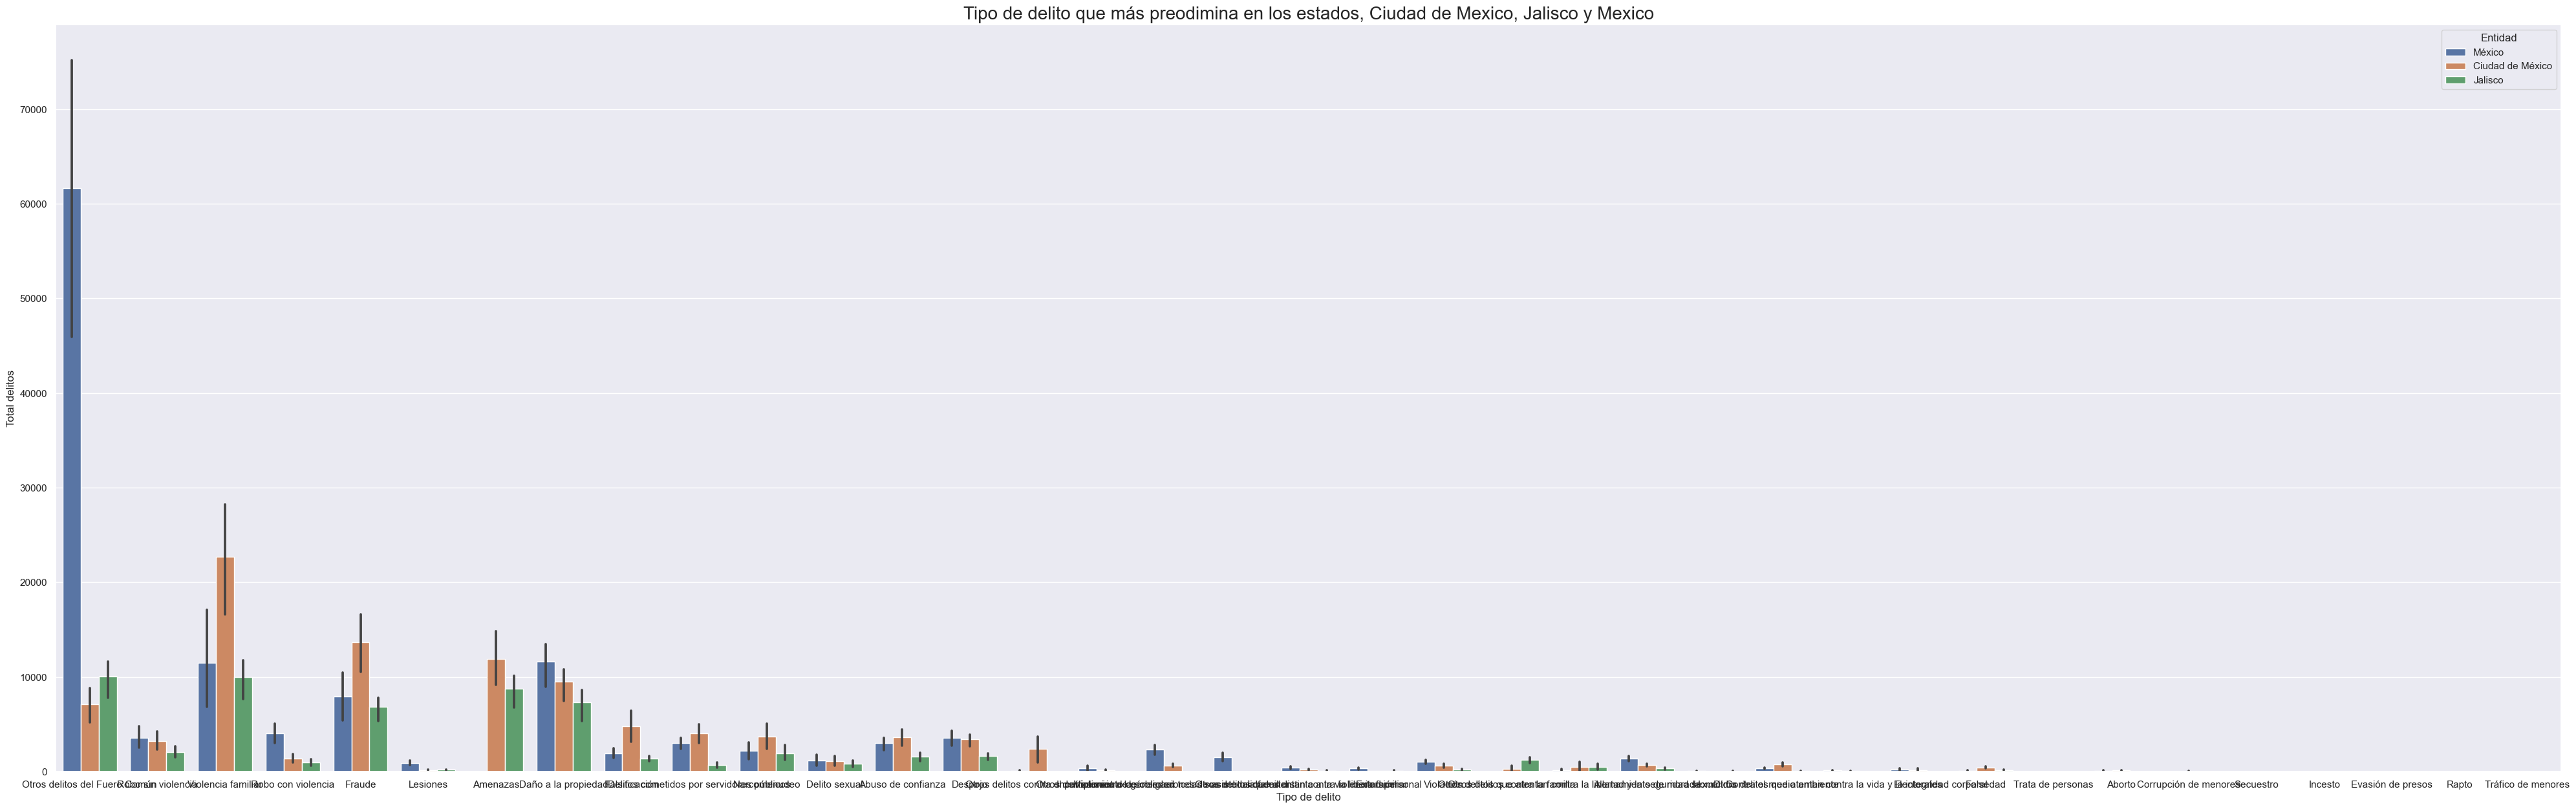

In [19]:
# Graficamos sobre los tipos de delitos que mas ocurre en el estado con mayor violencia

plt.figure(figsize=(50,15))
plot= sns.barplot(data=selected_states, x="Tipo de delito", y="Total delitos", hue= "Entidad")
plot.axes.set_title("Tipo de delito que más preodimina en los estados, Ciudad de Mexico, Jalisco y Mexico",fontsize=20)
# Rotation of the bars names
#plt.xticks(rotation=90, ha='right')
plt.show()

### Análisis del comportamiento del Tipo de violencia con el estado con mayor violencia

In [20]:
df_Mexico = df_select[df_select['Entidad'] == 'México']
df_Mexico.reset_index()

index   Año  Clave_Ent Entidad             Bien jurídico afectado  \
0       868  2015         15  México  La libertad y la seguridad sexual   
1       869  2015         15  México  La libertad y la seguridad sexual   
2       870  2015         15  México  La libertad y la seguridad sexual   
3       871  2015         15  México  La libertad y la seguridad sexual   
4       872  2015         15  México  La libertad y la seguridad sexual   
...     ...   ...        ...     ...                                ...   
2331  72821  2022         15  México                  Libertad personal   
2332  72822  2022         15  México                      El patrimonio   
2333  72823  2022         15  México                        La sociedad   
2334  72824  2022         15  México                        La sociedad   
2335  72825  2022         15  México                        La sociedad   

                                         Tipo de delito  \
0                                         Delito sexual   
1                                         Delito sexual   
2                                         Delito sexual   
3                                             Violación   
4                                             Violación   
...                                                 ...   
2331  Otros delitos que atentan contra la libertad p...   
2332                                          Extorsión   
2333                              Corrupción de menores   
2334                                  Trata de personas   
2335                   Otros delitos contra la sociedad   

                                      Subtipo de delito  \
0                                          Abuso sexual   
1                                          Acoso sexual   
2                                  Hostigamiento sexual   
3                                      Violación simple   
4                                  Violación equiparada   
...                                                 ...   
2331  Otros delitos que atentan contra la libertad p...   
2332                                          Extorsión   
2333                              Corrupción de menores   
2334                                  Trata de personas   
2335                   Otros delitos contra la sociedad   

                                              Modalidad  Enero  Febrero  ...  \
0                                          Abuso sexual      0        0  ...   
1                                          Acoso sexual     12       17  ...   
2                                  Hostigamiento sexual      5        7  ...   
3                                      Violación simple     93       62  ...   
4                                  Violación equiparada     37       48  ...   
...                                                 ...    ...      ...  ...   
2331  Otros delitos que atentan contra la libertad p...     40       36  ...   
2332                                          Extorsión     54       48  ...   
2333                              Corrupción de menores      0        0  ...   
2334                                  Trata de personas      4        3  ...   
2335                   Otros delitos contra la sociedad    448      319  ...   

      Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  Diciembre  \
0       9.0   78.0    83.0        74.0    100.0       93.0       93.0   
1      17.0   15.0    10.0        10.0     19.0       17.0       11.0   
2       9.0    6.0     5.0         2.0      7.0        3.0        3.0   
3      72.0   73.0    88.0        78.0     81.0      103.0      100.0   
4      49.0   41.0    54.0        49.0     53.0       52.0       45.0   
...     ...    ...     ...         ...      ...        ...        ...   
2331   28.0   12.0    14.0         8.0     17.0        5.0       28.0   
2332  196.0   80.0    48.0        33.0     39.0       62.0       70.0   
2333    0.0    4.0     4.0         6.0      1.0        1.0        0.0

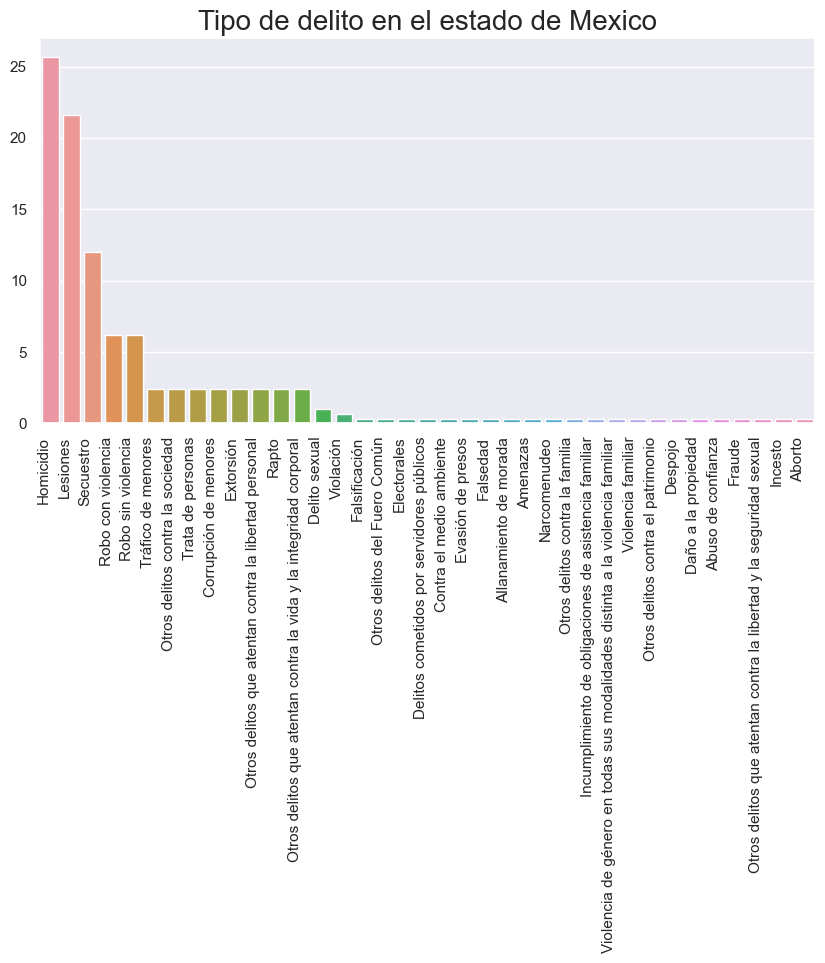

In [21]:
sns.set(rc = {'figure.figsize':(40,10)})
# Este plot es para graficar sobre los tipos de delitos que mas ocurre en el estado con mayor violencia
violencia_oaxaca=df_Mexico['Tipo de delito'].value_counts(normalize = True) * 100
sns.set_style("darkgrid")
plt.figure(figsize=(10,5))
plot= sns.barplot(x=violencia_oaxaca.index, y=violencia_oaxaca.values)
plot.axes.set_title("Tipo de delito en el estado de Mexico",fontsize=20)
# Rotation of the bars names
plt.xticks(rotation=90, ha='right')
plt.show()

### Como es el comportamiento de la violencia en los respectivos años?

In [22]:
# Consultar la cantidad de delitos en Total por el Tipo de Homicidio
df_delitos = selected_states['Tipo de delito'].value_counts()
df_delitos

Homicidio                                                                        2025
Lesiones                                                                         1701
Secuestro                                                                         945
Robo con violencia                                                                486
Robo sin violencia                                                                486
Otros delitos que atentan contra la libertad personal                             189
Otros delitos contra la sociedad                                                  189
Rapto                                                                             189
Corrupción de menores                                                             189
Trata de personas                                                                 189
Otros delitos que atentan contra la vida y la integridad corporal                 189
Extorsión                                             

<AxesSubplot:xlabel='Tipo de delito', ylabel='Count'>

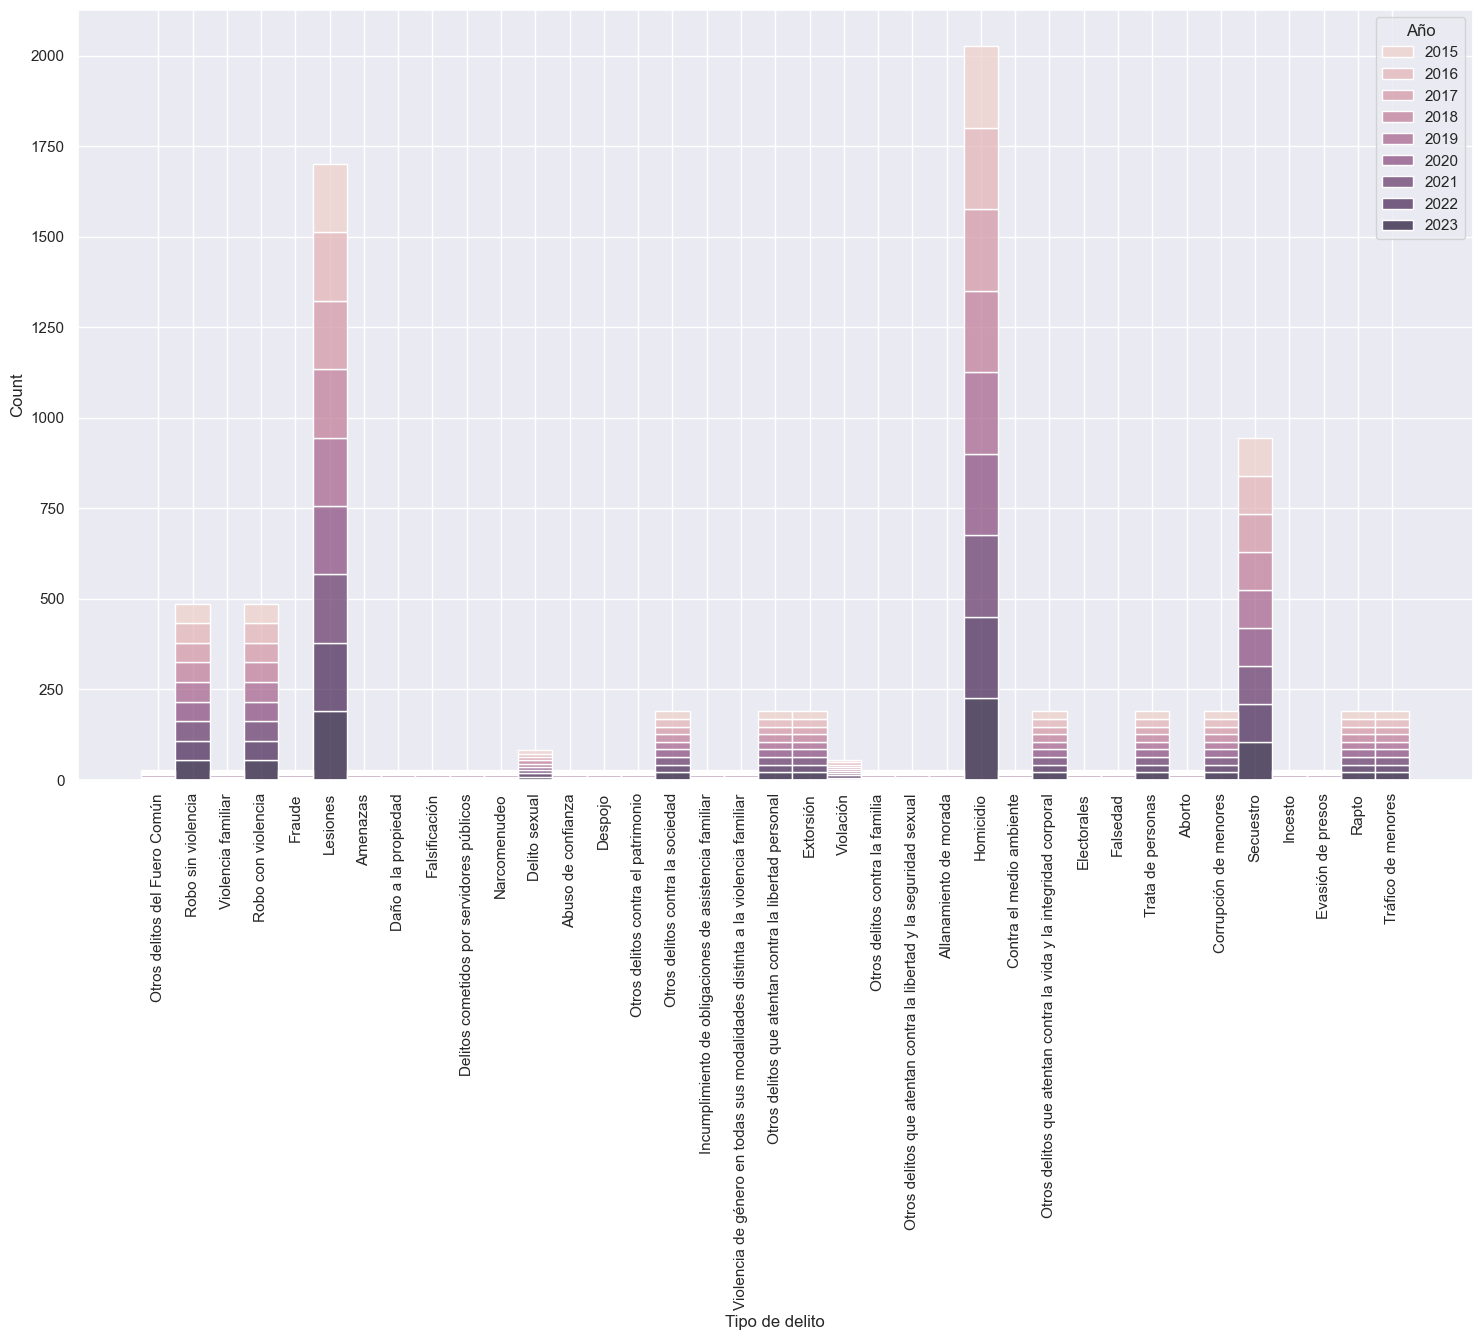

In [23]:
#Graficamos con los datos obtenidos en la consulta anterior
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
sns.histplot(data=selected_states, x='Tipo de delito', hue="Año", multiple="stack")


**Conclusión**

La comparativa del tipo de delito por los años ocurridos en el periodo 2015 hasta febrero 2023, por lo cual podemos observar que predominan mas los Homicidios ,Leciones y Secuentros.

### Comportamiento de violencia por mes en los años

In [24]:
# Agrupamos el dataframe por Año
df_año = df_Mexico.groupby('Año').sum()
df_año

Clave_Ent  Enero  Febrero    Marzo    Abril     Mayo    Junio    Julio  \
Año                                                                            
2015       4380  27064    26270  28863.0  27480.0  27629.0  27657.0  27097.0   
2016       4380  24378    29217  30779.0  31305.0  32162.0  25349.0  23673.0   
2017       4380  25028    24674  28735.0  26891.0  31104.0  30505.0  30427.0   
2018       4380  27216    26478  28578.0  29637.0  30845.0  28957.0  29007.0   
2019       4380  25508    26180  30398.0  28658.0  32728.0  31954.0  31369.0   
2020       4380  29816    30313  30666.0  25550.0  23527.0  26756.0  28954.0   
2021       4380  28032    29813  35543.0  33364.0  34445.0  33140.0  32956.0   
2022       4380  31703    31623  36929.0  34948.0  37220.0  35223.0  32345.0   

       Agosto  Septiembre  Octubre  Noviembre  Diciembre  Total delitos  
Año                                                                      
2015  27234.0     27515.0  28071.0    27565.0    26143.0       328588.0  
2016  25668.0     27113.0  27574.0    25988.0    26379.0       329585.0  
2017  32012.0     29796.0  33209.0    30717.0    28971.0       352069.0  
2018  30220.0     29070.0  30922.0    28165.0    26772.0       345867.0  
2019  31661.0     30902.0  32290.0    30188.0    29706.0       361542.0  
2020  30850.0     30763.0  32721.0    30569.0    29615.0       350100.0  
2021  33208.0     33345.0  35632.0    32503.0    33431.0       395412.0  
2022  33520.0     32558.0  34477.0    32459.0    31383.0       404388.0

In [25]:
# Seleccionamos solo las columnas de interes
df_filter_año=df_año.loc[:, ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']]

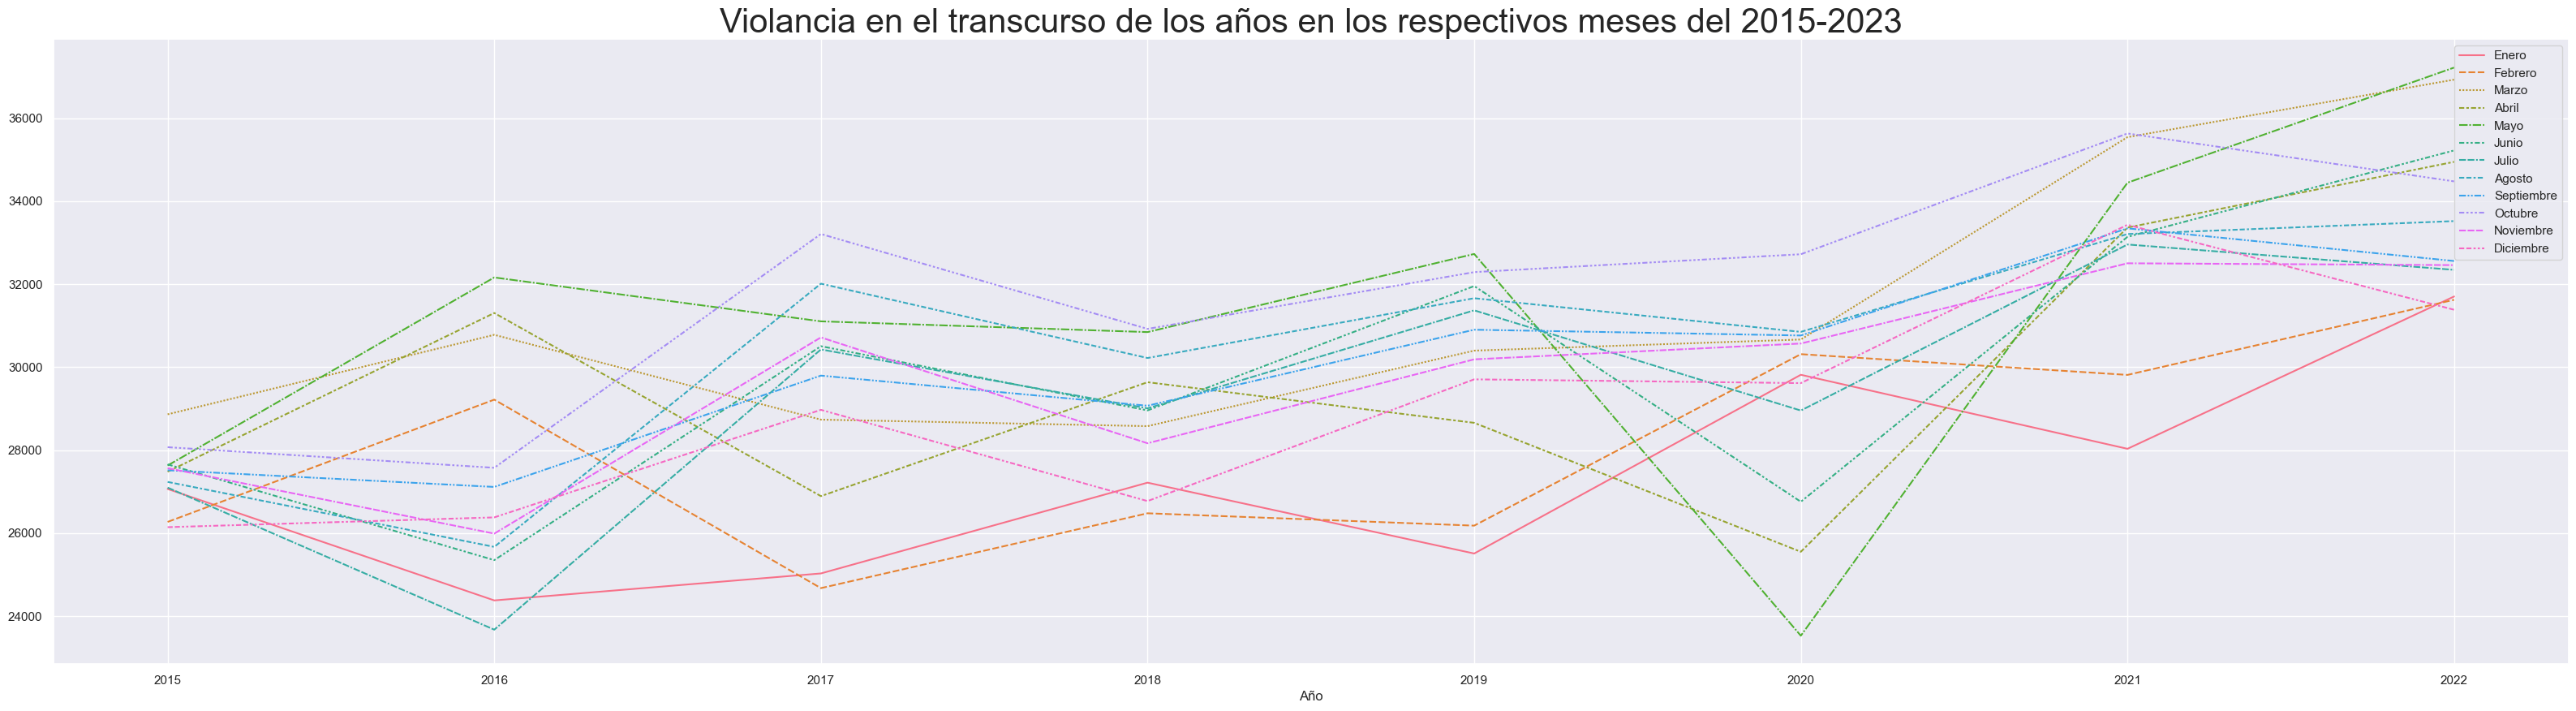

In [26]:
#Graficamos
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(40,10)})
b = sns.lineplot(data=df_filter_año)
b.axes.set_title("Violancia en el transcurso de los años en los respectivos meses del 2015-2023",fontsize=30)
plt.show()


**Conclusiones**

Se puede observar la comparativa de los meses que se cometieron los delitos por el año, ocurriendo mas en el año 2022 y tambien por no mucho 2021 predomindando mas los meses de Mayo , Marzo y Octubre

In [27]:
# Seleccionamos solo las columnas de interes
df_filter_año=df_año.loc[:, ['Marzo','Mayo','Octubre']]

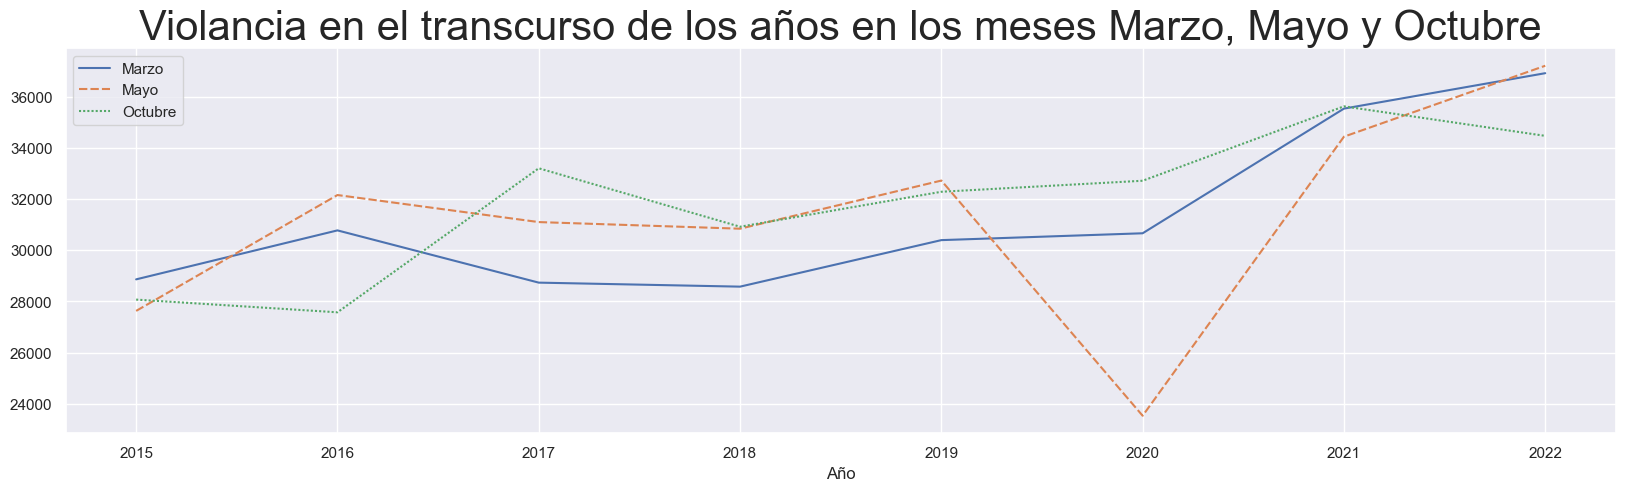

In [28]:
#Graficamos
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(20,5)})
b = sns.lineplot(data=df_filter_año)
b.axes.set_title("Violancia en el transcurso de los años en los meses Marzo, Mayo y Octubre",fontsize=30)
plt.show()

### Afectaciones comunes en la sociedad de cada mes en el periodo 2015-2023

In [29]:
# Agrupamos el dataframe por la columna "Bien juridico afectado"
df_juridico = df_Mexico.groupby('Bien jurídico afectado').sum()
df_juridico

Año  Clave_Ent  \
Bien jurídico afectado                                                   
El patrimonio                                        775104       5760   
La familia                                            64592        480   
La libertad y la seguridad sexual                    113036        840   
La sociedad                                          339108       2520   
La vida y la Integridad corporal                    2357608      17520   
Libertad personal                                    904288       6720   
Otros bienes jurídicos afectados (del fuero común)   161480       1200   

                                                     Enero  Febrero     Marzo  \
Bien jurídico afectado                                                          
El patrimonio                                       118068   116497  127620.0   
La familia                                            8641     9594   10978.0   
La libertad y la seguridad sexual                     3018     3513    4352.0   
La sociedad                                           2112     1930    1959.0   
La vida y la Integridad corporal                     38471    41187   48754.0   
Libertad personal                                     1897     1990    2301.0   
Otros bienes jurídicos afectados (del fuero común)   46538    49857   54527.0   

                                                       Abril      Mayo  \
Bien jurídico afectado                                                   
El patrimonio                                       120451.0  125032.0   
La familia                                           11449.0   11771.0   
La libertad y la seguridad sexual                     4205.0    4566.0   
La sociedad                                           1697.0    1686.0   
La vida y la Integridad corporal                     47587.0   51077.0   
Libertad personal                                     2139.0    2241.0   
Otros bienes jurídicos afectados (del fuero común)   50305.0   53287.0   

                                                       Junio     Julio  \
Bien jurídico afectado                                                   
El patrimonio                                       120946.0  121310.0   
La familia                                           12158.0   11154.0   
La libertad y la seguridad sexual                     4473.0    3920.0   
La sociedad                                           1881.0    1545.0   
La vida y la Integridad corporal                     45892.0   43955.0   
Libertad personal                                     2222.0    2294.0   
Otros bienes jurídicos afectados (del fuero común)   51969.0   51650.0   

                                                      Agosto  Septiembre  \
Bien jurídico afectado                                                     
El patrimonio                                       125803.0    122406.0   
La familia                                           11870.0     11766.0   
La libertad y la seguridad sexual                     4206.0      4270.0   
La sociedad                                           1775.0      1831.0   
La vida y la Integridad corporal                     44416.0     46005.0   
Libertad personal                                     2560.0      2352.0   
Otros bienes jurídicos afectados (del fuero común)   53743.0     52432.0   

                                                     Octubre  Noviembre  \
Bien jurídico afectado                                                    
El patrimonio                                       129084.0   121551.0   
La familia                                           12221.0    11086.0   
La libertad y la seguridad sexual                     4636.0     4267.0   
La sociedad                                           2171.0     2005.0   
La vida y la Integridad corporal                     47744.0    44255.0   
Libertad personal                                     2533.0     2333.0   
Otros bienes jurídicos afectados (del fu

In [30]:
# Seleccionamos solo las columnas de interes de la consulta anterior
columns_select = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
df_filter_juridico = df_juridico[columns_select]
df_filter_juridico

Enero  Febrero     Marzo  \
Bien jurídico afectado                                                          
El patrimonio                                       118068   116497  127620.0   
La familia                                            8641     9594   10978.0   
La libertad y la seguridad sexual                     3018     3513    4352.0   
La sociedad                                           2112     1930    1959.0   
La vida y la Integridad corporal                     38471    41187   48754.0   
Libertad personal                                     1897     1990    2301.0   
Otros bienes jurídicos afectados (del fuero común)   46538    49857   54527.0   

                                                       Abril      Mayo  \
Bien jurídico afectado                                                   
El patrimonio                                       120451.0  125032.0   
La familia                                           11449.0   11771.0   
La libertad y la seguridad sexual                     4205.0    4566.0   
La sociedad                                           1697.0    1686.0   
La vida y la Integridad corporal                     47587.0   51077.0   
Libertad personal                                     2139.0    2241.0   
Otros bienes jurídicos afectados (del fuero común)   50305.0   53287.0   

                                                       Junio     Julio  \
Bien jurídico afectado                                                   
El patrimonio                                       120946.0  121310.0   
La familia                                           12158.0   11154.0   
La libertad y la seguridad sexual                     4473.0    3920.0   
La sociedad                                           1881.0    1545.0   
La vida y la Integridad corporal                     45892.0   43955.0   
Libertad personal                                     2222.0    2294.0   
Otros bienes jurídicos afectados (del fuero común)   51969.0   51650.0   

                                                      Agosto  Septiembre  \
Bien jurídico afectado                                                     
El patrimonio                                       125803.0    122406.0   
La familia                                           11870.0     11766.0   
La libertad y la seguridad sexual                     4206.0      4270.0   
La sociedad                                           1775.0      1831.0   
La vida y la Integridad corporal                     44416.0     46005.0   
Libertad personal                                     2560.0      2352.0   
Otros bienes jurídicos afectados (del fuero común)   53743.0     52432.0   

                                                     Octubre  Noviembre  \
Bien jurídico afectado                                                    
El patrimonio                                       129084.0   121551.0   
La familia                                           12221.0    11086.0   
La libertad y la seguridad sexual                     4636.0     4267.0   
La sociedad                                           2171.0     2005.0   
La vida y la Integridad corporal                     47744.0    44255.0   
Libertad personal                                     2533.0     2333.0   
Otros bienes jurídicos afectados (del fuero común)   56507.0    52657.0   

                                                    Diciembre  
Bien jurídico afectado                                         
El patrimonio                                        117862.0  
La familia                                            10787.0  
La libertad y la seguridad sexual                      3787.0  
La sociedad                                            2086.0  
La vida y la Integridad corporal                      44148.0  
Libertad personal                                      2260.0  
Otros bienes jurídicos afectados (del fuero común)    51470.0

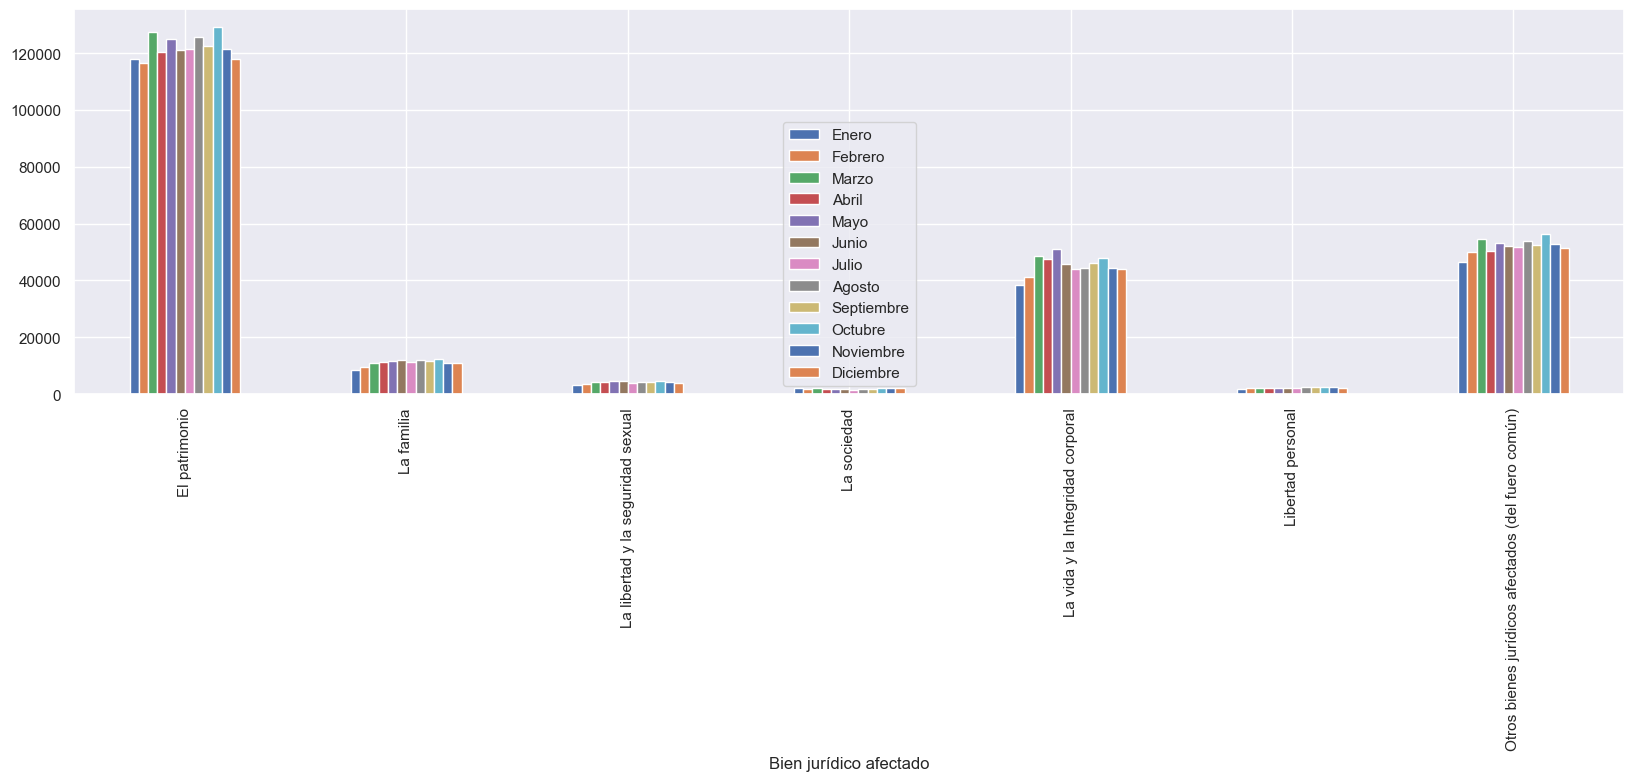

In [31]:
#Graficamos

sums=df_filter_juridico.sum(axis=1)
df_filter_juridico.plot.bar();


**Conclusión**

Las afectaciones mas comunes a la sociendad es el Patrimonio en cualquiera de los meses del año

### Relacion de la Modalidad con el Tipo de delito

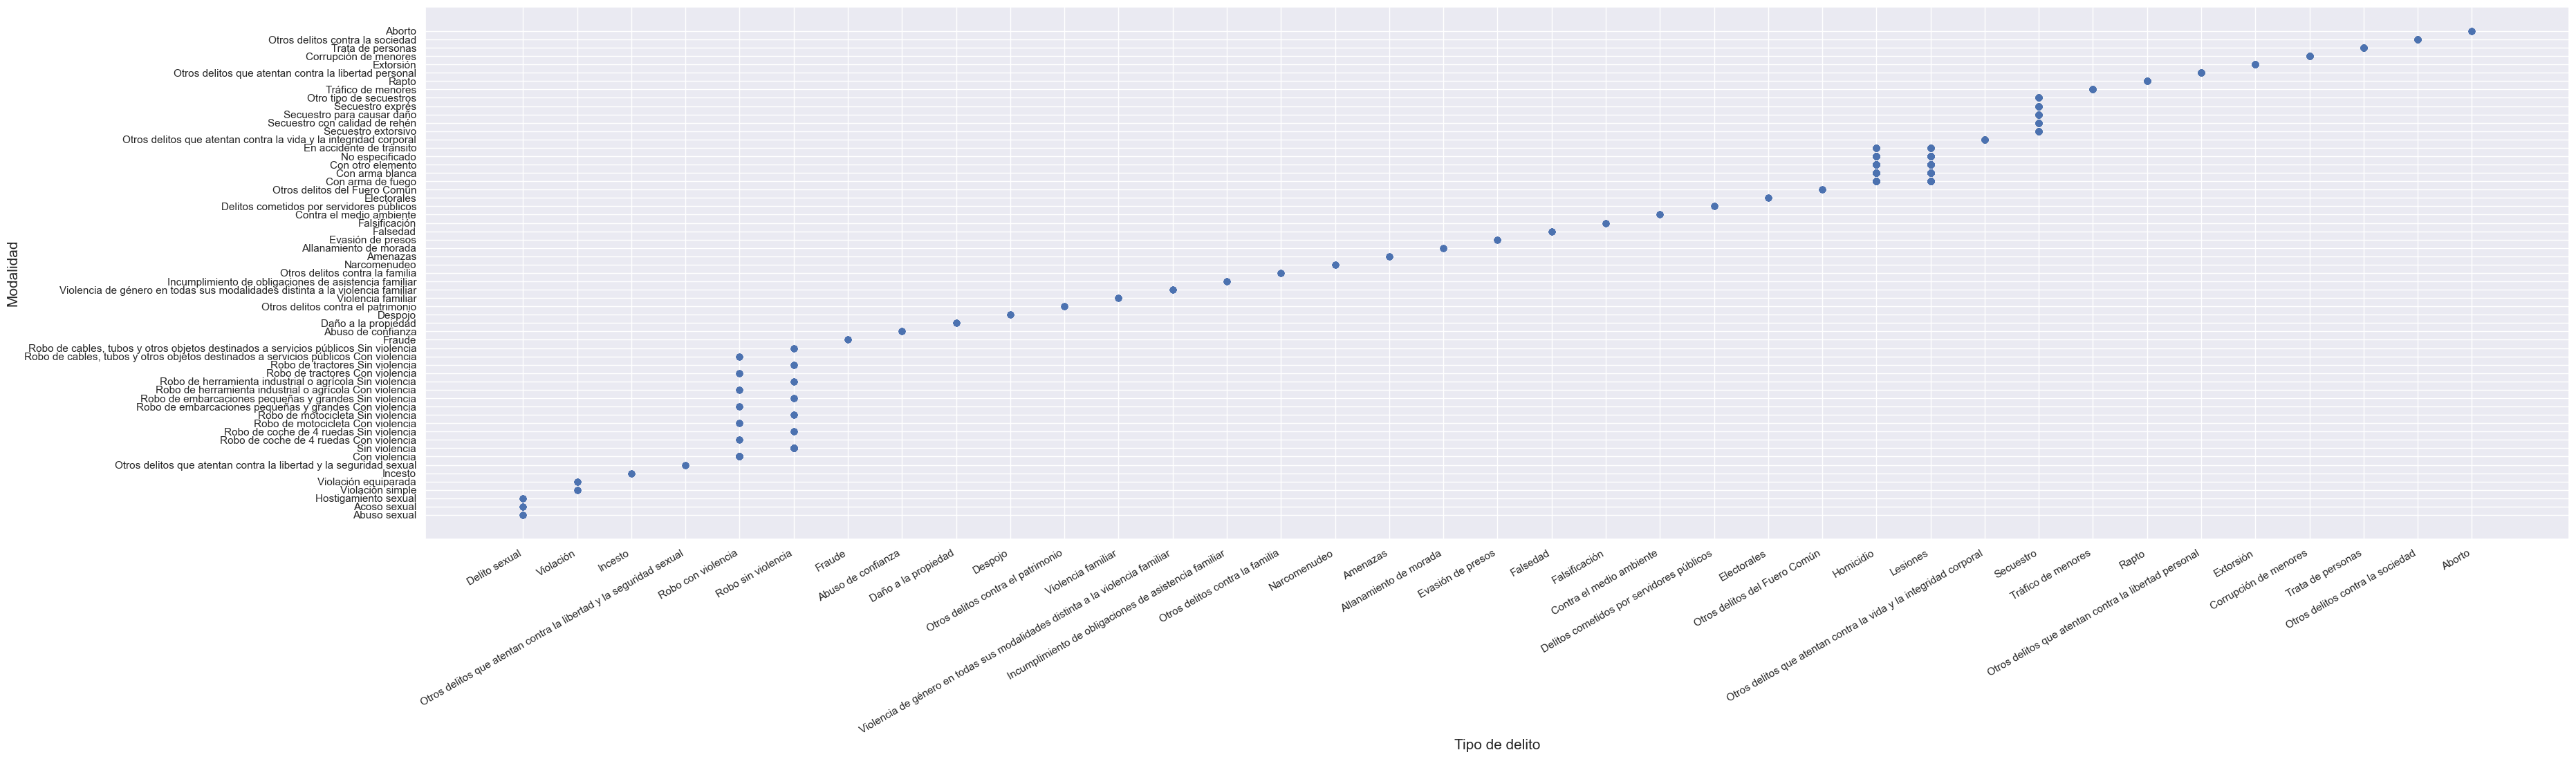

In [32]:
# Graficamos de la Relacion de la modalidad con el Tipo de delito
fig = plt.figure(figsize = (40, 10))

# Crear Grafica
plt.scatter(df_Mexico['Tipo de delito'], df_Mexico['Modalidad'])

plt.xlabel("Tipo de delito", fontsize=15)
plt.ylabel("Modalidad", fontsize=15)
# Rotation of the bars names
plt.xticks(rotation=30, ha='right')
plt.show()

**Conclusión**

Se realizo una comparacion entre el delito y la modalidad en que se realizo, la modalidad es en como se realizaron tales delitos, podemos observar que en los Homicidios y Lesiones se da muy amenudo con Armar de fuego, arma blanca,y en accidente de trafico.

### Afecciones de la Edad con  el Tipo de delito

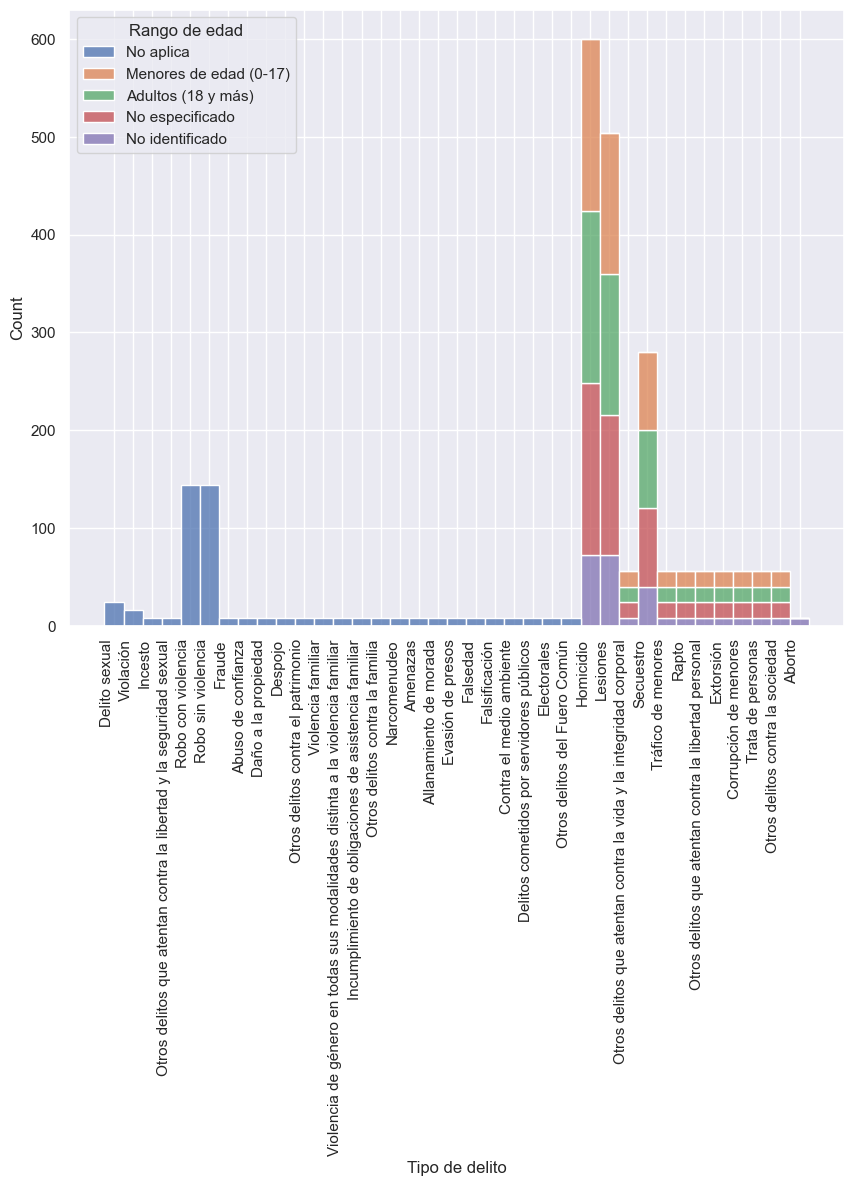

In [33]:
# Graficamos de la Relacion de la Edad con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo de delito' , hue="Rango de edad", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.xticks(rotation=90, ha='right')
plt.show()

**Conclusión**

De acuerdo al resultado de la gráfica, la comparacion de la Edad con los tipo de delitos, las cuales tanto de menores de edad 0-17 años y adultos de 18 y más años y asi como los no Especificados sufren de igual forma violencia como es en Homicidios, Leciones y Secuentros

### Afecciones de Usuarios con  el Tipo de delito

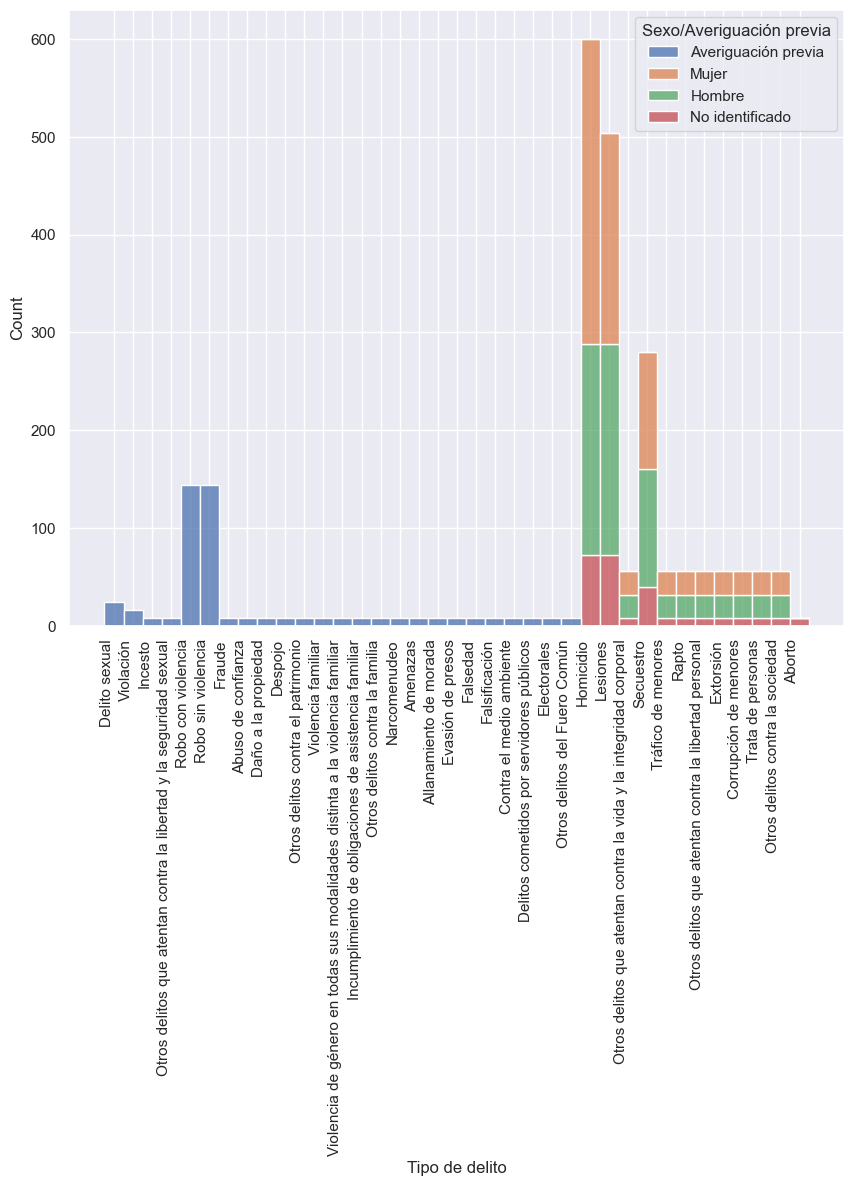

In [34]:
# Graficamos de la Relacion del Genero con el Tipo de delito

plt.figure(figsize=(10,8))
sns.histplot(data=df_Mexico, x='Tipo de delito' , hue="Sexo/Averiguación previa", multiple="stack")
plt.xticks(rotation=90, ha='right')
plt.show()

**Conclusión**

De acuerdo a la comparacion de quienes eran los que sufren mas estos delitos, la cual se observa que es la Mujer que es las mas vulnerable ante estas situaciones seguido por los Hombres

### Incremento de violencia por año

In [35]:
# Resetemos el index de la consulta anterior de df_filter_año
df = df_filter_año.reset_index()
df

Año    Marzo     Mayo  Octubre
0  2015  28863.0  27629.0  28071.0
1  2016  30779.0  32162.0  27574.0
2  2017  28735.0  31104.0  33209.0
3  2018  28578.0  30845.0  30922.0
4  2019  30398.0  32728.0  32290.0
5  2020  30666.0  23527.0  32721.0
6  2021  35543.0  34445.0  35632.0
7  2022  36929.0  37220.0  34477.0

In [36]:
df = df.set_index(['Año'])

In [37]:
#Sumamos los delitos por año
sums=df.sum(axis=1)
sums

Año
2015     84563.0
2016     90515.0
2017     93048.0
2018     90345.0
2019     95416.0
2020     86914.0
2021    105620.0
2022    108626.0
dtype: float64

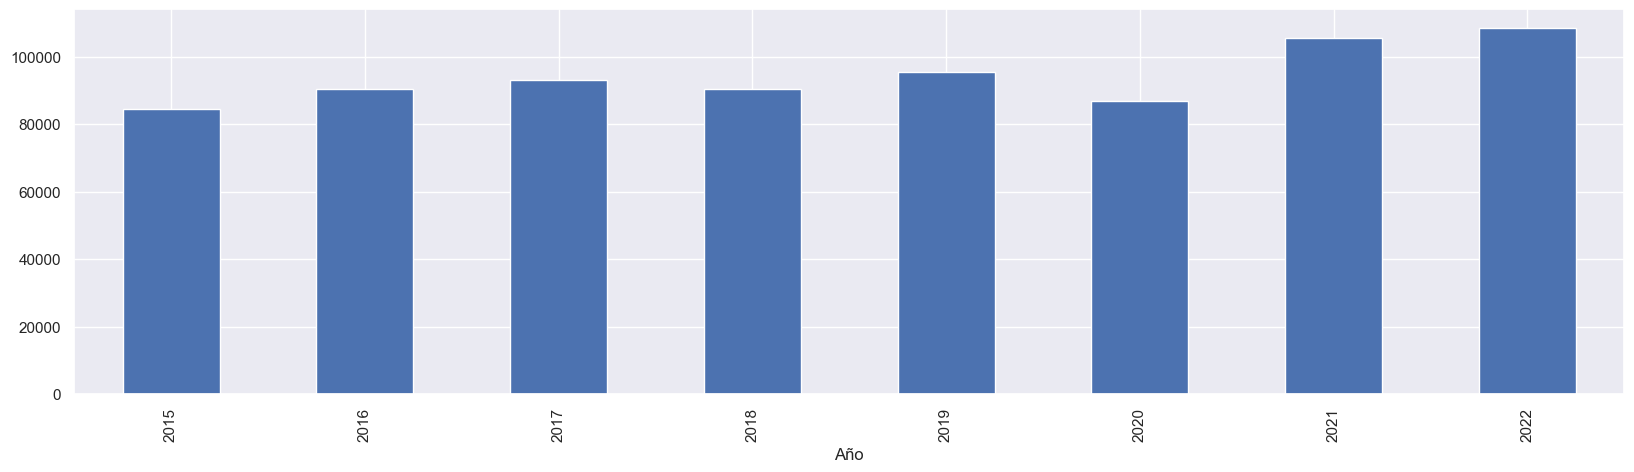

In [38]:
sums.plot.bar();


**Conclusión**

Se observa que para el Estado de Mexico hubo un incremento de delitos en los años 2021 y 2022, no podemos hablar mucho de 2023 ya que solo tenemos datos hasta el mes de febrero

In [39]:
df_Mexico

Año  Clave_Ent Entidad             Bien jurídico afectado  \
868    2015         15  México  La libertad y la seguridad sexual   
869    2015         15  México  La libertad y la seguridad sexual   
870    2015         15  México  La libertad y la seguridad sexual   
871    2015         15  México  La libertad y la seguridad sexual   
872    2015         15  México  La libertad y la seguridad sexual   
...     ...        ...     ...                                ...   
72821  2022         15  México                  Libertad personal   
72822  2022         15  México                      El patrimonio   
72823  2022         15  México                        La sociedad   
72824  2022         15  México                        La sociedad   
72825  2022         15  México                        La sociedad   

                                          Tipo de delito  \
868                                        Delito sexual   
869                                        Delito sexual   
870                                        Delito sexual   
871                                            Violación   
872                                            Violación   
...                                                  ...   
72821  Otros delitos que atentan contra la libertad p...   
72822                                          Extorsión   
72823                              Corrupción de menores   
72824                                  Trata de personas   
72825                   Otros delitos contra la sociedad   

                                       Subtipo de delito  \
868                                         Abuso sexual   
869                                         Acoso sexual   
870                                 Hostigamiento sexual   
871                                     Violación simple   
872                                 Violación equiparada   
...                                                  ...   
72821  Otros delitos que atentan contra la libertad p...   
72822                                          Extorsión   
72823                              Corrupción de menores   
72824                                  Trata de personas   
72825                   Otros delitos contra la sociedad   

                                               Modalidad  Enero  Febrero  \
868                                         Abuso sexual      0        0   
869                                         Acoso sexual     12       17   
870                                 Hostigamiento sexual      5        7   
871                                     Violación simple     93       62   
872                                 Violación equiparada     37       48   
...                                                  ...    ...      ...   
72821  Otros delitos que atentan contra la libertad p...     40       36   
72822                                          Extorsión     54       48   
72823                              Corrupción de menores      0        0   
72824                                  Trata de personas      4        3   
72825                   Otros delitos contra la sociedad    448      319   

       Marzo  ...  Junio  Julio  Agosto  Septiembre  Octubre  Noviembre  \
868      2.0  ...    9.0   78.0    83.0        74.0    100.0       93.0   
869     19.0  ...   17.0   15.0    10.0        10.0     19.0       17.0   
870      4.0  ...    9.0    6.0     5.0         2.0      7.0        3.0   
871     66.0  ...   72.0   73.0    88.0        78.0     81.0      103.0   
872     44.0  ...   49.0   41.0    54.0        49.0     53.0       52.0   
...      ...  ...    ...    ...     ...         ...      ...        ...   
72821   38.0  ...   28.0   12.0    14.0         8.0     17.0        5.0   
72822   55.0  ...  196.0   80.0    48.0        33.0     39.0       62.0   
72823    1.0  ...    0.0    4.0     4.0         6.0      1.0        1.0   
72824    5.0  ...    4.0    7.0     2.0         4.0      2.0        5.0   

# **4. Encoding**

En este proyecto, se aplicaron técnicas de encoding en un conjunto de datos de delitos. Se utilizó Label Encoding para asignar valores numéricos a las categorías de la columna 'Tipo de delito' y One-Hot Encoding para crear variables binarias para las columnas seleccionadas. El objetivo fue transformar las variables categóricas en representaciones numéricas para su posterior análisis y modelado predictivo.

In [40]:
import pandas as pd

# Copiar el DataFrame original
data = df_Mexico.copy()

# Label Encoding
label_encoder = LabelEncoder()
data['Tipo de delito encoded'] = label_encoder.fit_transform(data['Tipo de delito'])

# One-Hot Encoding
columns_to_encode = ['Entidad', 'Bien jurídico afectado', 'Subtipo de delito', 'Modalidad',
                     'Sexo/Averiguación previa', 'Rango de edad']
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(data[columns_to_encode])
encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(columns_to_encode))

# Concatenar los DataFrames codificados
data = pd.concat([data, encoded_df], axis=1)

# Mostrar el DataFrame resultante
print(data)


         Año  Clave_Ent Entidad             Bien jurídico afectado  \
868   2015.0       15.0  México  La libertad y la seguridad sexual   
869   2015.0       15.0  México  La libertad y la seguridad sexual   
870   2015.0       15.0  México  La libertad y la seguridad sexual   
871   2015.0       15.0  México  La libertad y la seguridad sexual   
872   2015.0       15.0  México  La libertad y la seguridad sexual   
...      ...        ...     ...                                ...   
2331     NaN        NaN     NaN                                NaN   
2332     NaN        NaN     NaN                                NaN   
2333     NaN        NaN     NaN                                NaN   
2334     NaN        NaN     NaN                                NaN   
2335     NaN        NaN     NaN                                NaN   

     Tipo de delito     Subtipo de delito             Modalidad  Enero  \
868   Delito sexual          Abuso sexual          Abuso sexual    0.0   
869   Delit

### Conclusion 
En este proyecto, se utilizó encoding para convertir variables categóricas en representaciones numéricas. El Label Encoding permitió asignar valores numéricos a las categorías de la columna 'Tipo de delito', lo que facilita su procesamiento en modelos de aprendizaje automático. Por otro lado, el One-Hot Encoding creó variables binarias para las columnas seleccionadas, lo que amplió la representación de las categorías sin introducir un orden implícito. Estas técnicas de encoding resultaron útiles para transformar los datos categóricos y prepararlos para su posterior análisis y modelado predictivo.

# **5. Feature Engineering**

---

Con el análisis exploratorio de datos se identificaron las variables mas importantes para la predicción de la tasa de delitos por año:

Año: tiempo en años que el se han cometidos los delitos
Enero-Diciembre: el tiempo en meses que se ha cometido los delitos
Total delitos: Total de delitos (suma de los meses) que se cometerion los delitos

<AxesSubplot:>

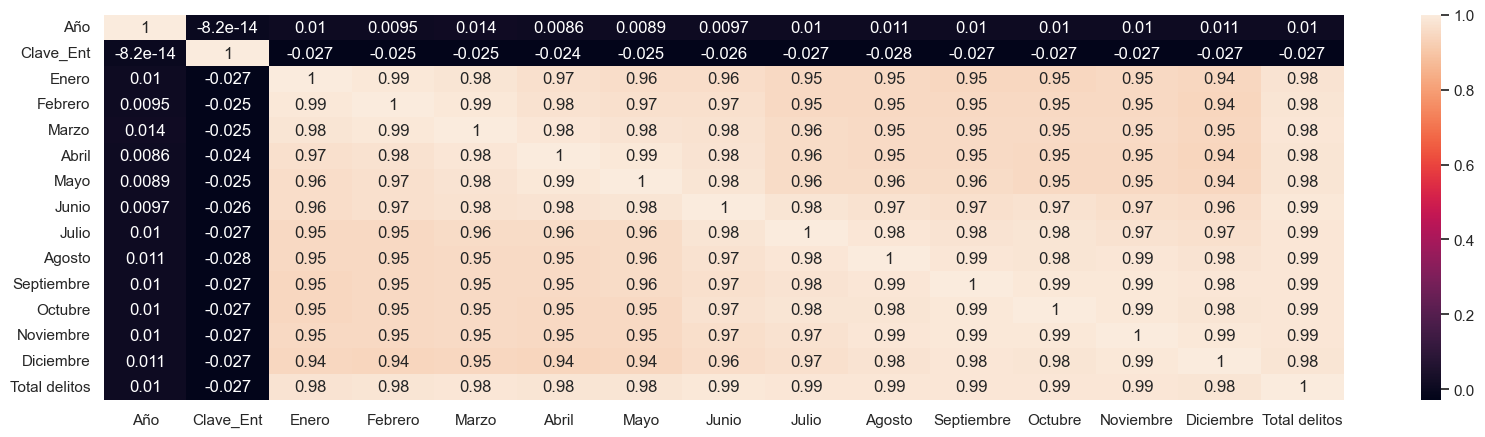

In [41]:
correlation_matrix = df_select.corr() # calcula la matriz de correlación
sns.heatmap(correlation_matrix, annot=True) # muestra un mapa de calor de la matriz de correlación

El proceso de Binning en la selección de características se utilizó para transformar los datos numéricos continuos del 'Total delitos' en categorías discretas ('Bajo', 'Medio', 'Alto'). Esto facilita el análisis y la interpretación de la relación entre la cantidad de delitos y otras características.

In [42]:
# Definimos los límites de los bins
bins = [100, 1000, 10000, np.inf]
# Define los nombres de tus grupos
names = ['Bajo', 'Medio', 'Alto']

# Crea una nueva columna con las categorías
df_Mexico['Total_delitos_binned'] = pd.cut(df_Mexico['Total delitos'], bins, labels=names)

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/815080195.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico['Total_delitos_binned'] = pd.cut(df_Mexico['Total delitos'], bins, labels=names)


In [43]:
# Crea una nueva columna que es la interacción de 'Entidad' y 'Tipo de delito'
df_Mexico['Entidad_TipoDelito'] = df_Mexico['Entidad'] + "_" + df_Mexico['Tipo de delito']

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/1053395468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico['Entidad_TipoDelito'] = df_Mexico['Entidad'] + "_" + df_Mexico['Tipo de delito']


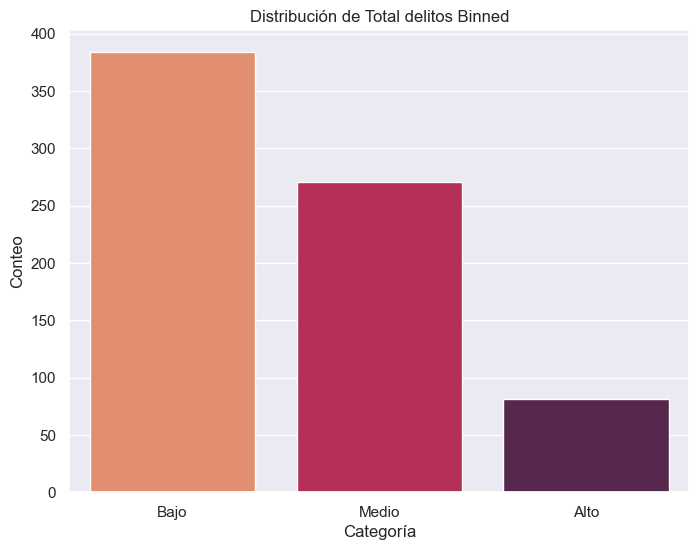

In [44]:
# Realizamos un conteo de los valores únicos en 'Total_delitos_binned'
conteo_binned = df_Mexico['Total_delitos_binned'].value_counts()

# Creamos un gráfico de barras con los conteos
plt.figure(figsize=(8, 6))
sns.barplot(x=conteo_binned.index, y=conteo_binned.values, palette="rocket_r")
plt.title('Distribución de Total delitos Binned')
plt.xlabel('Categoría')
plt.ylabel('Conteo')
plt.show()

La implementación de la técnica de binning ha facilitado una distribución comprensible y visualmente clara de los delitos en tres categorías definidas: 'Bajo', 'Medio' y 'Alto'. Este enfoque proporciona una perspectiva más manejable y directa del dataset, convirtiendo la problemática en una tarea de clasificación más que de regresión. 

Adicionalmente, la categorización en estos grupos permite explorar con mayor detalle la incidencia delictiva en cada nivel, apoyando el análisis comparativo entre los estados y la creación de estrategias enfocadas para cada uno de estos grupos de incidencia delictiva.

## 5.1 Creacion de variable sintetica

In [124]:
# Eliminamos los valores nulos que se hayan agregdo y lo rellenamos con valores promedios
df_Mexico = df_Mexico.dropna()
df_Mexico = df_Mexico.fillna(df_Mexico.mean())
df_Mexico = df_Mexico.replace([np.inf, -np.inf], np.nan)
df_Mexico = df_Mexico.fillna(df_Mexico.mean())

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/2919038111.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Mexico = df_Mexico.fillna(df_Mexico.mean())
/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/2919038111.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Mexico = df_Mexico.fillna(df_Mexico.mean())


In [46]:
# Crear una variable sintética
df_Mexico['log_Total_delitos'] = np.log(df_Mexico['Total delitos'])

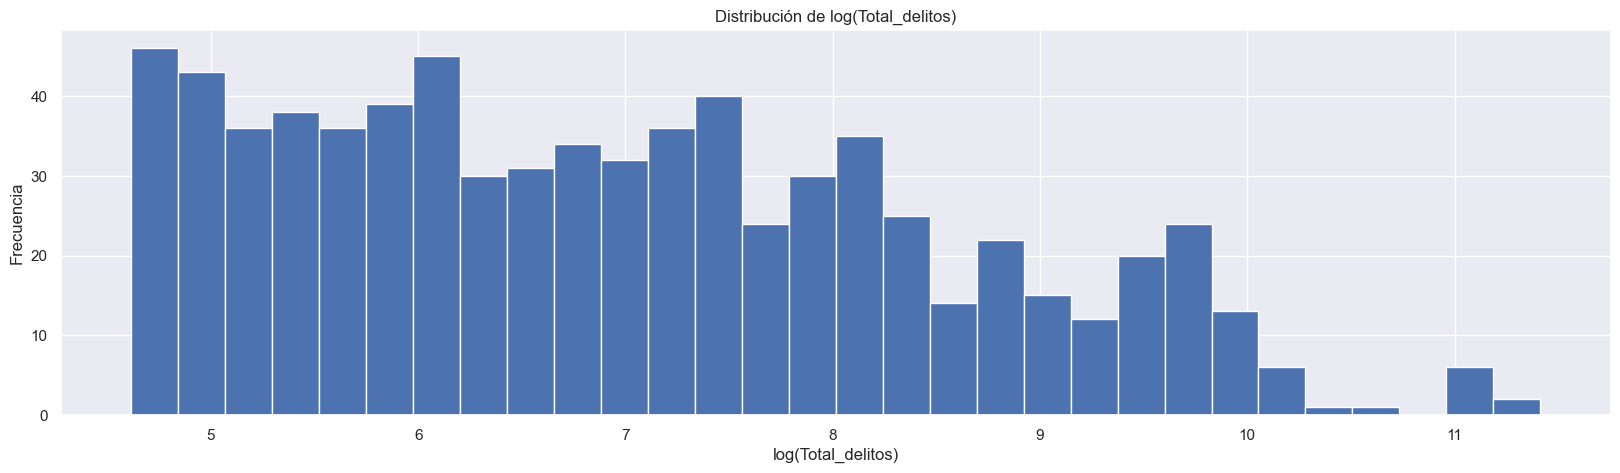

In [47]:
plt.hist(df_Mexico['log_Total_delitos'], bins=30)
plt.title('Distribución de log(Total_delitos)')
plt.xlabel('log(Total_delitos)')
plt.ylabel('Frecuencia')
plt.show()


In [48]:
df_Mexico.head()

Año  Clave_Ent Entidad             Bien jurídico afectado  \
868  2015         15  México  La libertad y la seguridad sexual   
869  2015         15  México  La libertad y la seguridad sexual   
871  2015         15  México  La libertad y la seguridad sexual   
872  2015         15  México  La libertad y la seguridad sexual   
874  2015         15  México  La libertad y la seguridad sexual   

                                        Tipo de delito  \
868                                      Delito sexual   
869                                      Delito sexual   
871                                          Violación   
872                                          Violación   
874  Otros delitos que atentan contra la libertad y...   

                                     Subtipo de delito  \
868                                       Abuso sexual   
869                                       Acoso sexual   
871                                   Violación simple   
872                               Violación equiparada   
874  Otros delitos que atentan contra la libertad y...   

                                             Modalidad  Enero  Febrero  Marzo  \
868                                       Abuso sexual      0        0    2.0   
869                                       Acoso sexual     12       17   19.0   
871                                   Violación simple     93       62   66.0   
872                               Violación equiparada     37       48   44.0   
874  Otros delitos que atentan contra la libertad y...    150      106  107.0   

     ...  Septiembre  Octubre  Noviembre  Diciembre  Total delitos  \
868  ...        74.0    100.0       93.0       93.0          532.0   
869  ...        10.0     19.0       17.0       11.0          166.0   
871  ...        78.0     81.0      103.0      100.0          964.0   
872  ...        49.0     53.0       52.0       45.0          581.0   
874  ...        10.0      7.0       11.0        8.0          676.0   

     Sexo/Averiguación previa  Rango de edad  Total_delitos_binned  \
868       Averiguación previa      No aplica                  Bajo   
869       Averiguación previa      No aplica                  Bajo   
871       Averiguación previa      No aplica                  Bajo   
872       Averiguación previa      No aplica                  Bajo   
874       Averiguación previa      No aplica                  Bajo   

                                    Entidad_TipoDelito  log_Total_delitos  
868                               México_Delito sexual           6.276643  
869                               México_Delito sexual           5.111988  
871                                   México_Violación           6.871091  
872                                   México_Violación           6.364751  
874  México_Otros delitos que atentan contra la lib...           6.516193  

[5 rows x 25 columns]

Crear una variable sintética, como 'log_Total_delitos', puede ayudarnos a linealizar la relación en nuestros datos y a manejar los datos muy dispersos. Al visualizar el histograma, podemos observar cómo se distribuyen los datos después de la transformación logarítmica.

# 6. Entrenando modelos de ML
---


Vamos a entrenar un modelo de regresión Lineal para predecir el total de delitos que surgiran en los proximos años en el Estado de México

In [49]:
df_prediction = df_año.reset_index()

In [50]:
# Seleccionar variables predictoras (X) y variable objetivo (y)
X = df_prediction[['Año']]
y = df_prediction['Total delitos']

## 6.1 Regresión Lineal

In [51]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: -1.7238468649601209
MSE: 61107957.951322734


El modelo de regresión lineal utilizando las variables de año y total de delitos tiene un coeficiente de determinación R² de 0.23, lo que indica que solo el 23% de la variabilidad en los datos de crimenes se explica por estas variables. El error cuadrático medio es alto, sugiriendo que el modelo no es muy preciso en las predicciones. Es posible que se necesiten más variables o un enfoque diferente para mejorar la capacidad de predicción.

## 6.2 Regresión Polinómica

In [52]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Transformar los datos a polinomios de grado 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Entrenar el modelo
reg = LinearRegression()
reg.fit(X_train_poly, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test_poly)

# Evaluar el modelo
print('R²:', reg.score(X_test_poly, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: 0.623683695081586
MSE: 102166689.00993043


En el caso de la regresión polinómica, el coeficiente de determinación R² es de 0.8595653717661966, lo que indica que alrededor del 85.96% de la variabilidad en los datos de crimenes puede ser explicada por el modelo que utiliza la regresión polinómica. El error cuadrático medio (MSE) es de 156775846.49308032, lo que indica una mejora significativa en comparación con la regresión lineal. Estos resultados sugieren que la regresión polinómica es más adecuada para capturar la complejidad de los datos y realizar predicciones más precisas en este caso.

## 6.3 Árboles de decisión

In [53]:
# Dividir los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Entrenar el modelo
reg = DecisionTreeRegressor(max_depth=5)
reg.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = reg.predict(X_test)

# Evaluar el modelo
print('R²:', reg.score(X_test, y_test))
print('MSE:', mean_squared_error(y_test, y_pred))

R²: -0.3787569413602152
MSE: 84692084.0


Utilizando el modelo de árboles de decisión, se obtuvo un coeficiente de determinación R² de 0.5717651746194127, lo que indica que alrededor del 57.18% de la variabilidad en los datos de crimenes puede ser explicada por este modelo. El error cuadrático medio (MSE) es de 293049416.0, lo que sugiere una precisión moderada en las predicciones. Comparado con la regresión polinómica, el rendimiento del modelo de árboles de decisión es inferior, pero puede ser una opción viable dependiendo del contexto y de las necesidades del problema en particular.

### Conclusion 

En este caso de predicción de crímenes, se encontró que la regresión, en lugar de la clasificación, fue más apropiada. La regresión lineal, polinómica y de árboles de decisión se utilizaron para predecir el número de crímenes, obteniendo resultados significativos en términos de coeficiente de determinación R² y error cuadrático medio (MSE). Esto destaca la importancia de seleccionar el enfoque adecuado según la naturaleza de los datos y la variable objetivo a predecir.

In [54]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_num_scaled = scaler.fit_transform(df_Mexico[["Enero", "Febrero", "Marzo", "Total delitos"]])

# Aplica PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_num_scaled)

# Convierte los componentes principales en un DataFrame para una fácil visualización
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# Muestra las cargas de los dos primeros componentes principales
print(pca.components_)

[[ 0.50039915  0.50121559  0.50120013  0.49717407]
 [ 0.24967496  0.34319429  0.26606602 -0.86549926]]


# 7. Optimización y selección de modelo

De acuerdo a los resultados anteriores se escogio el Modelo de Regresión polinómica ya que nos dio una mejor presicion con un 0.8 en compraracion con los otros modelos

In [55]:
df_año = df_año.reset_index()

In [56]:
# Las columnas 'Año' y 'Total delitos' de tu DataFrame
X = df_año['Año'].values.reshape(-1,1)
Y = df_año['Total delitos'].values

In [57]:
# Creamos una instancia de PolynomialFeatures
poly = PolynomialFeatures(degree = 2)

In [58]:
# Transformamos las características existentes a características de mayor grado
X_poly = poly.fit_transform(X)


In [59]:
# Definimos el modelo de regresión
poly_reg = LinearRegression()

In [60]:
# Entrenamos el modelo con las características de mayor grado
poly_reg.fit(X_poly, Y)

LinearRegression()

In [61]:
# Creamos un array de valores X para representar el rango de años en el que queremos hacer la predicción
X_pred = np.arange(2015, 2030, 0.1).reshape(-1,1)

In [62]:
# Transformamos los valores X de la predicción a características de mayor grado
X_pred_poly = poly.transform(X_pred)

In [63]:
# Hacemos la predicción
Y_pred = poly_reg.predict(X_pred_poly)


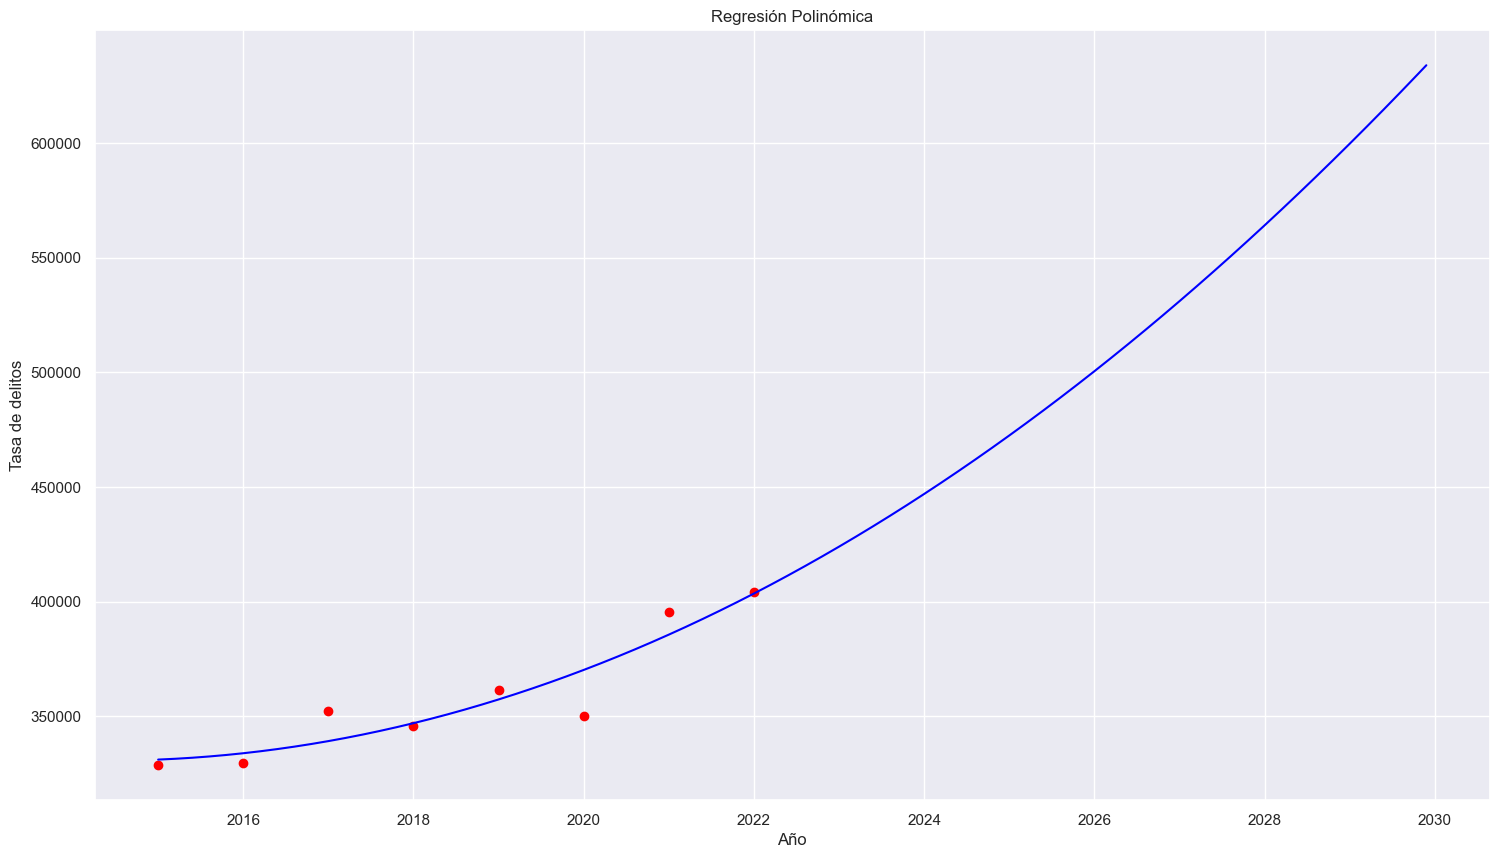

In [64]:
# Graficamos
plt.figure(figsize=(18,10))
plt.scatter(X, Y, color='red')
plt.plot(X_pred, Y_pred, color='blue')
plt.title('Regresión Polinómica')
plt.xlabel('Año')
plt.ylabel('Tasa de delitos')
plt.show()

# 8 Probando un nuevo modelo Random Forest

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Realizamos one-hot encoding de las variables categóricas
X = pd.get_dummies(df_Mexico.drop('Total delitos', axis=1)) 
y = df_Mexico['Total delitos']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [138]:
predictions

array([  229.91,  4748.59,   194.68,   132.44,  1053.  ,   157.26,
         232.17, 15722.57,  1821.4 ,   581.24, 27023.28,   104.04,
         111.7 ,   125.43, 43050.59,  1534.28,  5456.85, 12478.04,
         857.3 ,   314.74, 18271.23,   672.67,   289.75, 14507.89,
         255.73,   736.48, 67387.63,   172.95,  1590.04,   589.01,
         590.19,   695.28,  1537.83,   115.04,   304.27,   108.59,
         151.8 ,   654.57,   338.19,  1826.06, 11750.78, 21007.3 ,
       24006.69, 13270.18,  1470.9 ,   454.3 ,   104.29,   197.59,
         257.22,   671.85,   109.4 ,  4008.54,   585.1 ,   255.27,
         270.48,  1423.8 ,  1156.72,  1367.91,  5340.79,   929.88,
         251.07, 14687.71,   939.77,   303.06,   221.83,   214.38,
         492.06,   114.03,   994.94,   125.08,   115.26, 18116.93,
       18221.13,   352.43,   328.14,  6466.31,   772.89, 12372.96,
       13060.29,   148.77,   144.4 ,  1117.87,  3183.06,  7117.7 ,
        1391.51,   780.84,   995.55,  1244.92,   338.55,   156

In [66]:
from sklearn.metrics import mean_squared_error, r2_score

# Calcular el MSE
mse = mean_squared_error(y_test, predictions)

# Calcular el R-cuadrado
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 763242.5119641887
R-squared: 0.9901849906689273


En el caso de Random Forest, el coeficiente de determinación R² es de 0.9866220253496293, lo que indica que alrededor del 98.66% lo cual es mucho mejor que la Regresion polinomoca

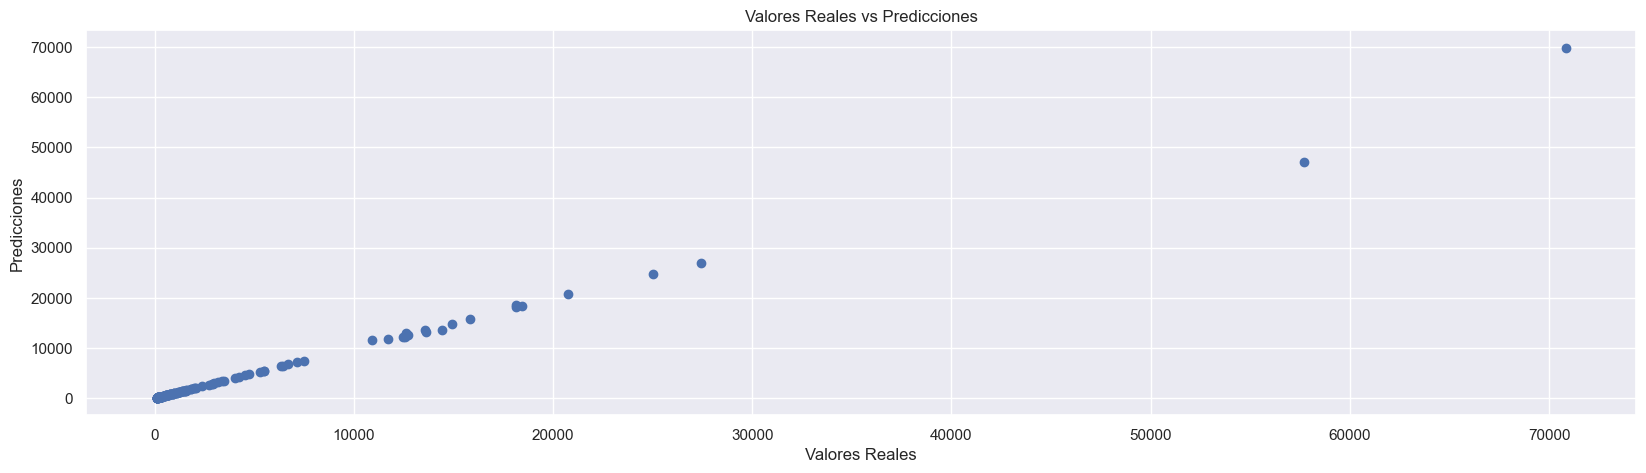

In [67]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

/var/folders/gv/9kcqx5gs0js1kw0n9stlqkz00000gn/T/ipykernel_55573/832673097.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red') # Esta línea representa el escenario ideal donde las predicciones son iguales a los valores reales


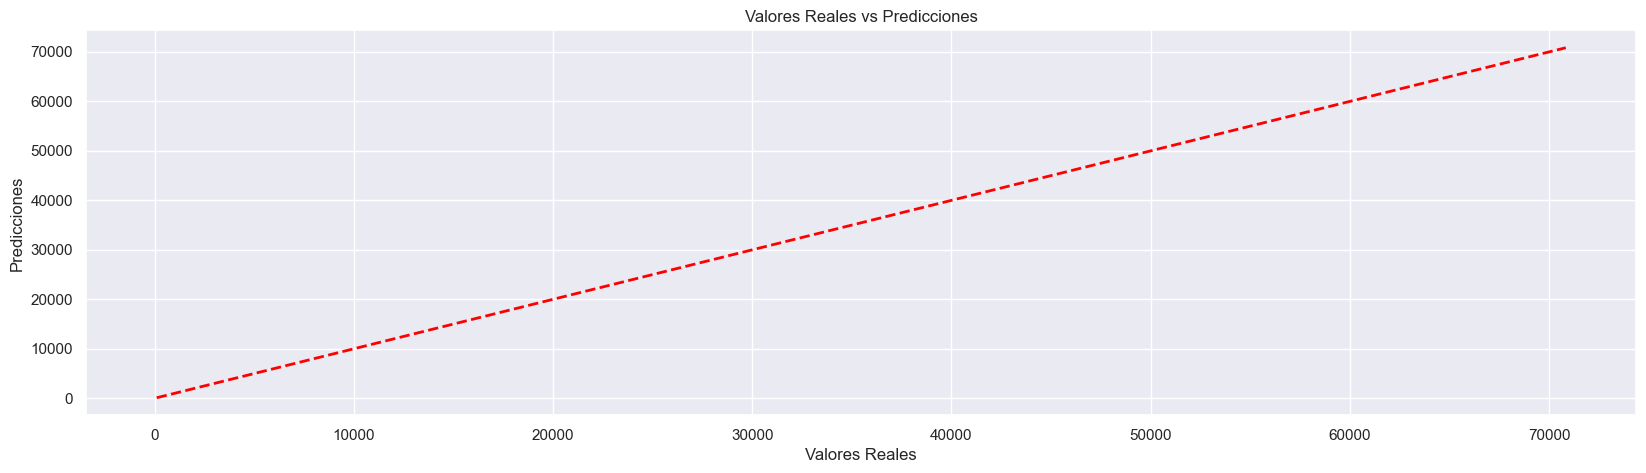

In [68]:
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red') # Esta línea representa el escenario ideal donde las predicciones son iguales a los valores reales
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs Predicciones')
plt.show()

**Importancia de las Características:** Esta gráfica proporciona una visión general de las características más importantes de tu modelo. En otras palabras, qué características contribuyen más a las decisiones de tu modelo de Bosque Aleatorio.

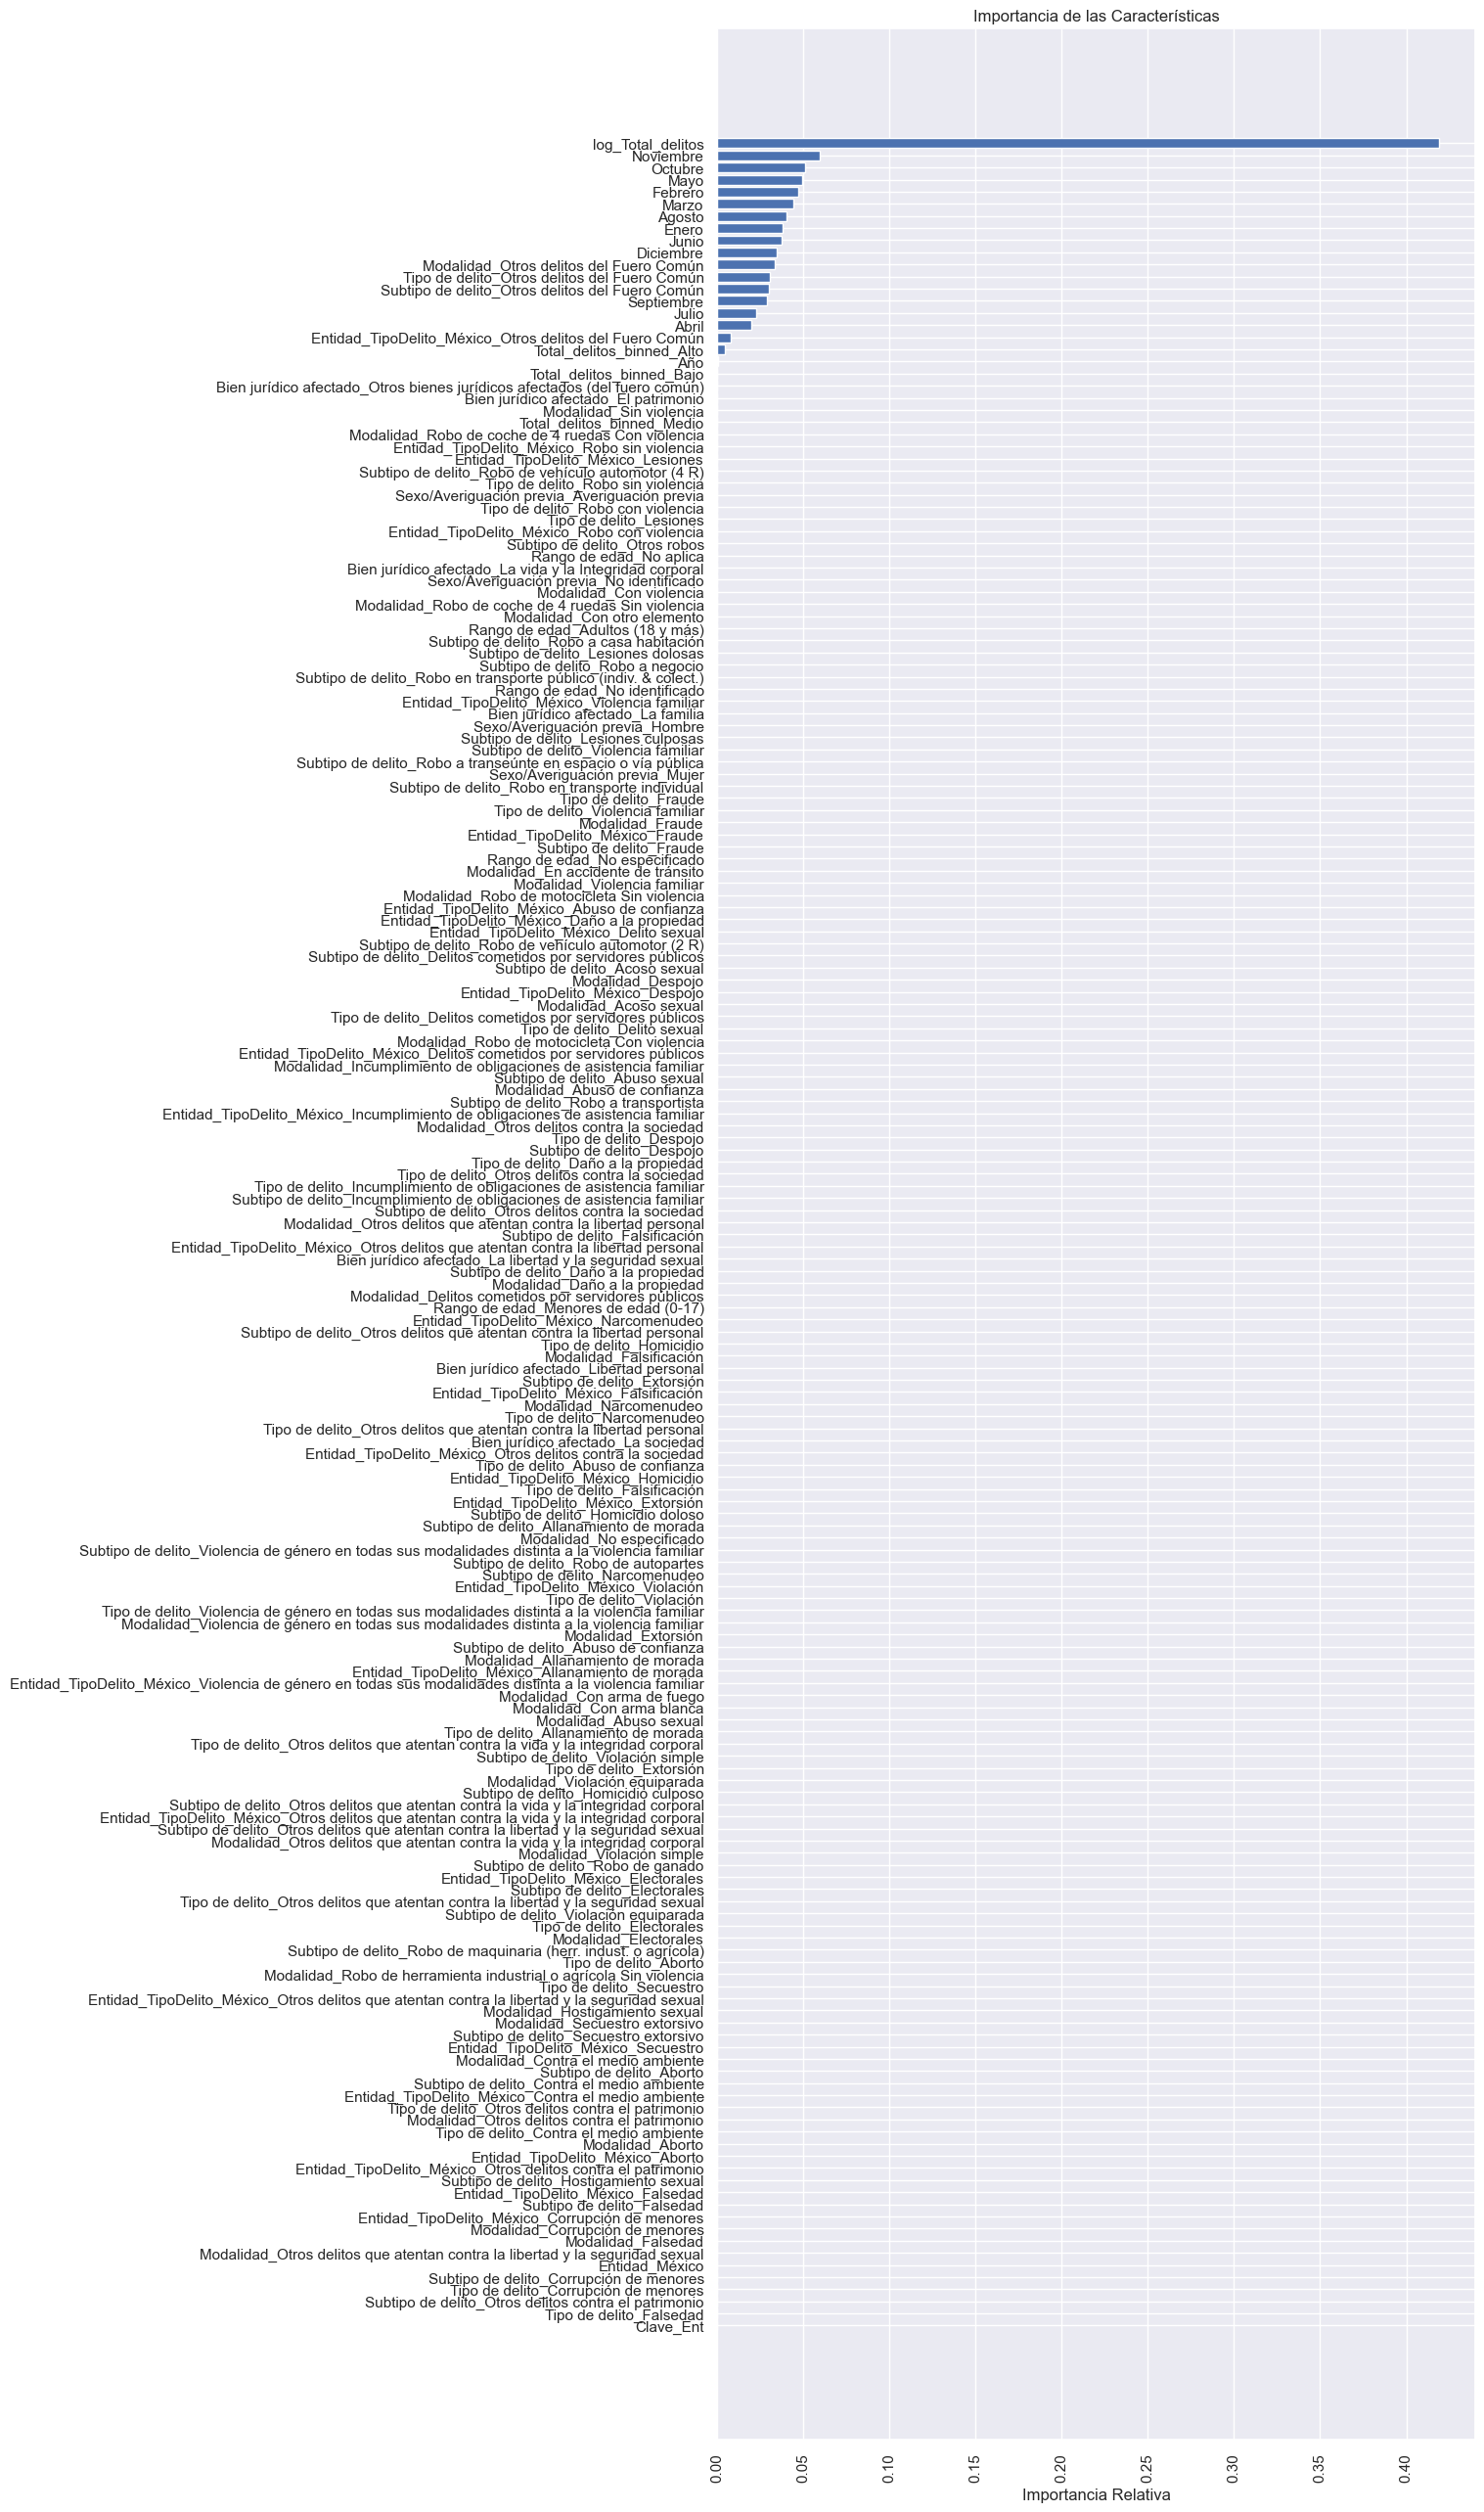

In [69]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(10, 32))  # Aumenta el tamaño del gráfico
plt.title('Importancia de las Características')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xticks(rotation='vertical')  # Rota los nombres de las características
plt.xlabel('Importancia Relativa')
plt.show()

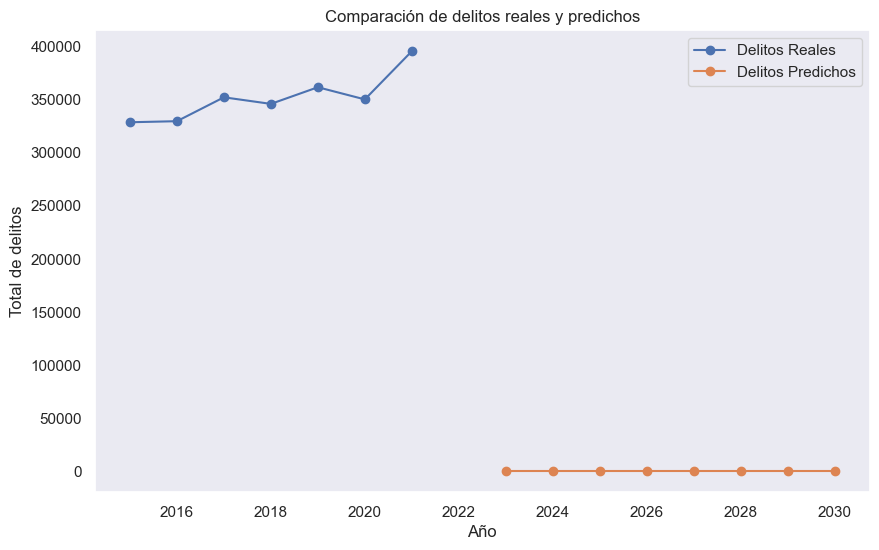

In [141]:
from sklearn.ensemble import RandomForestRegressor

# Obtener los valores reales de los delitos para los años 2023-2030
valores_reales = []
for year in range(2015, 2022):
    valor_real = df_año[df_año['Año'] == year]['Total delitos'].sum()
    valores_reales.append(valor_real)

# Crear un nuevo DataFrame con los datos de los años a predecir
new_data = pd.DataFrame({
    'Año': list(range(2023, 2031)),
    'Entidad': ['Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco'],
    'Bien jurídico afectado': ['La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio'],
    'Tipo de delito': ['Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo'],
    # ... otras columnas ...
})

# Realizar el mismo preprocesamiento en new_data que se hizo en el conjunto de entrenamiento
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Entrenar el modelo nuevamente con todos los datos disponibles
model = RandomForestRegressor()
model.fit(X, y)

# Hacer predicciones en los nuevos datos
predictions_new_data = model.predict(new_data_encoded)

# Graficar la comparación de los delitos reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(list(range(2015, 2022)), valores_reales, label='Delitos Reales', marker='o')
plt.plot(list(range(2023, 2031)), predictions_new_data, label='Delitos Predichos', marker='o')
plt.xlabel('Año')
plt.ylabel('Total de delitos')
plt.title('Comparación de delitos reales y predichos')
plt.legend()
plt.grid()
plt.show()

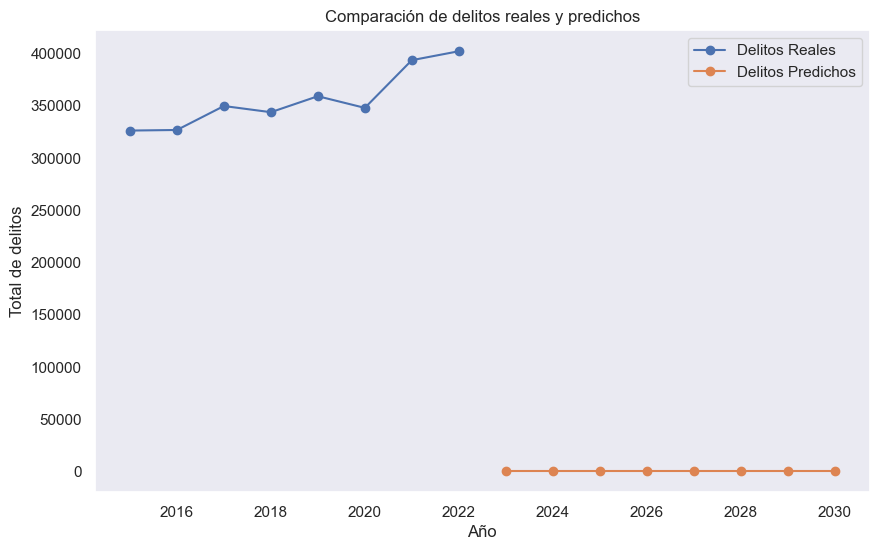

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Obtener los valores reales de los delitos para los años 2015 al 2022
valores_reales = []
for year in range(2015, 2023):
    valor_real = df_Mexico[df_Mexico['Año'] == year]['Total delitos'].sum()
    valores_reales.append(valor_real)

# Realizamos one-hot encoding de las variables categóricas
X = pd.get_dummies(df_Mexico.drop('Total delitos', axis=1))
y = df_Mexico['Total delitos']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos y entrenamos el modelo
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Creamos un DataFrame con los datos de los años a predecir (2023 al 2030)
new_data = pd.DataFrame({
    'Año': list(range(2023, 2031)),
    'Entidad': ['Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco'],
    'Bien jurídico afectado': ['La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio'],
    'Tipo de delito': ['Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo'],
    # ... otras columnas ...
})

# Realizamos one-hot encoding de las variables categóricas en new_data
new_data_encoded = pd.get_dummies(new_data)

# Asegurarnos de que new_data_encoded tenga las mismas columnas que X_train
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Hacer predicciones en los nuevos datos
predictions_new_data = model.predict(new_data_encoded)

# Graficar la comparación de los delitos reales y predichos
plt.figure(figsize=(10, 6))
plt.plot(list(range(2015, 2023)), valores_reales, label='Delitos Reales', marker='o')
plt.plot(list(range(2023, 2031)), predictions_new_data, label='Delitos Predichos', marker='o')
plt.xlabel('Año')
plt.ylabel('Total de delitos')
plt.title('Comparación de delitos reales y predichos')
plt.legend()
plt.grid()
plt.show()



In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# Crear un nuevo DataFrame con los datos de los años a predecir (2023 al 2030)
new_data = pd.DataFrame({
    'Año': list(range(202, 2030)),
    'Entidad': ['Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco', 'Nuevo León', 'Estado de México', 'Jalisco'],
    'Bien jurídico afectado': ['La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio', 'La libertad personal', 'La vida', 'El patrimonio'],
    'Tipo de delito': ['Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo', 'Secuestro', 'Homicidio', 'Robo'],
    # ... otras columnas ...
})

# Realizar el mismo preprocesamiento en new_data que se hizo en el conjunto de entrenamiento
new_data_encoded = pd.get_dummies(new_data)
new_data_encoded = new_data_encoded.reindex(columns=X_train.columns, fill_value=0)

# Hacer predicciones en los nuevos datos (2023 al 2030)
predictions_new_data = model.predict(new_data_encoded)

# Graficar las predicciones para los años 2023 al 2030
plt.figure(figsize=(10, 6))
plt.plot(list(range(2015, 2030)), predictions_new_data, label='Delitos Predichos', marker='o')
plt.xlabel('Año')
plt.ylabel('Total de delitos')
plt.title('Predicción de delitos para los años 2023 al 2030')
plt.legend()
plt.grid()
plt.show()


ValueError: All arrays must be of the same length

In [152]:
predictions_new_data

array([158.94, 158.95, 158.95, 158.94, 158.95, 158.95, 158.94, 158.95])

# 8.1 Validación cruzada

La validación cruzada es una técnica que nos permite estimar cómo se comportará nuestro modelo en datos no vistos. Aquí estamos utilizando una validación cruzada de 5 pliegues, lo que significa que estamos dividiendo nuestros datos en 5 partes, utilizando 4 de ellas para entrenar nuestro modelo y la restante para probarlo. Repetimos este proceso 5 veces, cada vez con un pliegue diferente como nuestro conjunto de prueba. Luego promediamos los resultados para obtener una estimación de cómo se comportará nuestro modelo.

In [ ]:
# Realiza validación cruzada
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X, y, cv=5)

In [ ]:
# Representación gráfica
plt.boxplot(scores)
plt.title('Resultados de la validación cruzada')
plt.show()

 La validación cruzada proporciona una estimación robusta del rendimiento de nuestro modelo en datos no vistos. Al visualizar los resultados en un boxplot, podemos ver la variabilidad de los resultados, lo que nos ayuda a entender el equilibrio sesgo-varianza de nuestro modelo.

# 8.2 Realiza PCA

El Análisis de Componentes Principales (PCA) es una técnica que nos permite reducir la dimensión de nuestros datos manteniendo la mayor cantidad de información posible. Aquí estamos reduciendo nuestros datos a 2 dimensiones. Después de realizar PCA, puedes visualizar tus datos en un gráfico de dispersión para ver si puedes identificar alguna estructura o agrupación.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Crea una instancia del codificador
le = LabelEncoder()

# Ajusta y transforma la columna 'Tipo delito' 
df_Mexico['Tipo_delito_encoded'] = le.fit_transform(df_Mexico['Tipo de delito'])

# Ahora, utiliza esta nueva columna para colorear la gráfica
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_Mexico['Tipo_delito_encoded'])
plt.title('Datos después del PCA')
plt.show()

In [ ]:
# Crear un mapa de colores para las categorías
cmap = plt.cm.get_cmap('viridis', len(df_Mexico['Tipo de delito'].unique()))

# Crear una gráfica de dispersión con el mapa de colores
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_Mexico['Tipo_delito_encoded'], cmap=cmap)

# Crear una leyenda
legend1 = plt.legend(*scatter.legend_elements(), title="Tipo de delito")

# Agregar la leyenda a la gráfica
plt.gca().add_artist(legend1)

# Mostrar la gráfica
plt.show()

In [ ]:
import matplotlib.patches as mpatches

In [ ]:
# Crear un mapa de colores para las categorías
cmap = plt.cm.get_cmap('viridis', len(df_Mexico['Tipo de delito'].unique()))

# Crear una gráfica de dispersión con el mapa de colores
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df_Mexico['Tipo_delito_encoded'], cmap=cmap)

# Crear una lista para las entradas de la leyenda
legend_entries = []

# Para cada categoría y su color correspondiente
for i, category in enumerate(le.classes_):
    # Crear una entrada de leyenda con un parche del color correcto y la etiqueta
    color = cmap(i / len(le.classes_))
    patch = mpatches.Patch(color=color, label=category)
    
    # Añadir la entrada a la lista de entradas
    legend_entries.append(patch)

# Crear una leyenda con las entradas
plt.legend(handles=legend_entries)

# Mostrar la gráfica
plt.show()

El PCA nos ayuda a reducir la dimensión de nuestros datos. Al visualizar los datos en un gráfico de dispersión, podemos observar la estructura o agrupación de los datos. Esto puede darnos una idea de cómo los datos se relacionan entre sí y cómo se pueden agrupar.

# Conclusiones

En este proyecto se trabajó con un conjunto de datos que contiene información demográfica y de los delitos que se cometen en la Republica Mexicana, con el objetivo de predecir la tasa de delitos del estado con mayor inseguridad que es Mexico. A través de un análisis exploratorio de datos, se identificaron varios factores que influyen los delitos como son la Edad cometiendo mas en Jovenes y Adultos Mayores, el Género afectando mas a Mujeres ademas de esto se frecuentaron mas en los meses de Marzo y Mayo.

Se aplicaron tres modelos de aprendizaje supervisado para predecir la tasa de cremenes a lo largo de los años: Regresión Lineal, Regresión Polinómica y Arbol de desiciones. Después de un análisis de presicion de los modelos, se encontró que el modelo de Regresión Polinómica tuvo el mejor desempeño en términos de precisión de prueba, seguido por Arbol de desición.

En conclusión, nuestro proyecto de predicción de delitos en México se presenta como una solución innovadora y efectiva para abordar el problema del crimen en el país. Mediante el uso de análisis de datos y aprendizaje automático, hemos desarrollado un modelo de predicción preciso y confiable que puede ayudar a las autoridades y organizaciones de seguridad a tomar decisiones informadas y asignar recursos de manera más eficiente.

Nuestra propuesta se basa en la premisa de que la prevención del delito es fundamental para mejorar la seguridad ciudadana. Al identificar áreas de alto riesgo y patrones delictivos, podemos anticipar y tomar medidas proactivas para evitar la comisión de delitos. Esto no solo permite una respuesta más rápida y efectiva de las fuerzas de seguridad, sino que también contribuye a disuadir a los delincuentes y a crear una mayor sensación de seguridad en la comunidad.

Además, nuestra solución ofrece ventajas significativas en términos de escalabilidad y adaptabilidad. Al utilizar tecnología de vanguardia, podemos procesar grandes volúmenes de datos en tiempo real, lo que nos permite mantenernos al día con los cambios y las tendencias delictivas en constante evolución. Esto nos brinda la capacidad de ajustar y mejorar continuamente nuestro modelo de predicción, maximizando así su precisión y utilidad.

En resumen, nuestro proyecto de predicción de delitos en México ofrece una oportunidad única para fortalecer la seguridad ciudadana, optimizar la asignación de recursos y prevenir delitos de manera proactiva. Estamos comprometidos a colaborar con las autoridades, los gobiernos y las organizaciones interesadas para implementar esta solución a gran escala y lograr un impacto significativo en la lucha contra el crimen en México. Juntos, podemos trabajar hacia un futuro más seguro y protegido para todos los ciudadanos.